# Microsoft Malware detection

<h1>1.Business/Real-world Problem</h1>

<h2>1.1. What is Malware? </h2>

<p>
The term malware is a contraction of malicious software. Put simply, malware is any piece of software that was written with the intent of doing harm to data, devices or to people. <br> 
Source: https://www.avg.com/en/signal/what-is-malware
<p>

<h2> 1.2. Problem Statement </h2>

<p>
    In the past few years, the malware industry has grown very rapidly that, the syndicates invest heavily in technologies to evade traditional protection, forcing the anti-malware groups/communities to build more robust softwares to detect and terminate these attacks. The major part of protecting a computer system from a malware attack is to <b>identify whether a given piece of file/software<b> is a malware. 
</p>


<h2>1.3 Source/Useful Links </h2>

<p>    Microsoft has been very active in building anti-malware products over the years  and it runs it’s anti-malware utilities over <b>150 million computers</b> around the world. This generates tens of millions of daily data points to be analyzed as potential malware. In order to be effective in analyzing and classifying such large amounts of data, we need to be able to group them into groups and identify their respective families. 
<br>
<br>
This dataset provided by Microsoft contains about 9 classes of malware.
,</p>
<p>
<b> Source: </b> https://www.kaggle.com/c/malware-classification
</p>

<h2>1.4. Real-world/Business objectives and constraints.</h2>


1. Minimize multi-class error.
2. Multi-class probability estimates.
3. Malware detection should not take hours and block the user's computer. It should fininsh in a few seconds or a minute.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

<li> Source : https://www.kaggle.com/c/malware-classification/data </li>
<li> For every malware, we have two files <ol> <li> .asm file (read more: https://www.reviversoft.com/file-extensions/asm) </li><li>.bytes file (the raw data contains the hexadecimal representation of the file's binary content, without the PE header)</li></ol></li> 
    
<li>Total train dataset consist of 200GB data out of which 50Gb of data is .bytes files and 150GB of data is .asm files:  </li>
<li><b>Lots of Data for a single-box/computer.</b> </li>

<li>There are total 10,868 .bytes files and 10,868 asm files total 21,736 files </li>

<li>There are 9 types of malwares (9 classes) in our give data</li>
<li> Types of Malware:
    <ol>
        <li> Ramnit </li>
        <li> Lollipop </li>
        <li> Kelihos_ver3 </li>
        <li> Vundo </li>
        <li> Simda </li>
        <li> Tracur </li>
        <li> Kelihos_ver1 </li>
        <li> Obfuscator.ACY </li>
        <li> Gatak </li>
    </ol>
</li>

<h3>2.1.2. Example Data Point</h3>

<p style = "font-size:18px"><b> .asm file</b></p>
<pre>
.text:00401000								       assume es:nothing, ss:nothing, ds:_data,	fs:nothing, gs:nothing
.text:00401000 56							       push    esi
.text:00401001 8D 44 24	08						       lea     eax, [esp+8]
.text:00401005 50							       push    eax
.text:00401006 8B F1							       mov     esi, ecx
.text:00401008 E8 1C 1B	00 00						       call    ??0exception@std@@QAE@ABQBD@Z ; std::exception::exception(char const * const &)
.text:0040100D C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401013 8B C6							       mov     eax, esi
.text:00401015 5E							       pop     esi
.text:00401016 C2 04 00							       retn    4
.text:00401016						       ; ---------------------------------------------------------------------------
.text:00401019 CC CC CC	CC CC CC CC					       align 10h
.text:00401020 C7 01 08	BB 42 00					       mov     dword ptr [ecx],	offset off_42BB08
.text:00401026 E9 26 1C	00 00						       jmp     sub_402C51
.text:00401026						       ; ---------------------------------------------------------------------------
.text:0040102B CC CC CC	CC CC						       align 10h
.text:00401030 56							       push    esi
.text:00401031 8B F1							       mov     esi, ecx
.text:00401033 C7 06 08	BB 42 00					       mov     dword ptr [esi],	offset off_42BB08
.text:00401039 E8 13 1C	00 00						       call    sub_402C51
.text:0040103E F6 44 24	08 01						       test    byte ptr	[esp+8], 1
.text:00401043 74 09							       jz      short loc_40104E
.text:00401045 56							       push    esi
.text:00401046 E8 6C 1E	00 00						       call    ??3@YAXPAX@Z    ; operator delete(void *)
.text:0040104B 83 C4 04							       add     esp, 4
.text:0040104E
.text:0040104E						       loc_40104E:			       ; CODE XREF: .text:00401043j
.text:0040104E 8B C6							       mov     eax, esi
.text:00401050 5E							       pop     esi
.text:00401051 C2 04 00							       retn    4
.text:00401051						       ; ---------------------------------------------------------------------------
</pre>
<p style = "font-size:18px"><b> .bytes file</b></p>
<pre>
00401000 00 00 80 40 40 28 00 1C 02 42 00 C4 00 20 04 20
00401010 00 00 20 09 2A 02 00 00 00 00 8E 10 41 0A 21 01
00401020 40 00 02 01 00 90 21 00 32 40 00 1C 01 40 C8 18
00401030 40 82 02 63 20 00 00 09 10 01 02 21 00 82 00 04
00401040 82 20 08 83 00 08 00 00 00 00 02 00 60 80 10 80
00401050 18 00 00 20 A9 00 00 00 00 04 04 78 01 02 70 90
00401060 00 02 00 08 20 12 00 00 00 40 10 00 80 00 40 19
00401070 00 00 00 00 11 20 80 04 80 10 00 20 00 00 25 00
00401080 00 00 01 00 00 04 00 10 02 C1 80 80 00 20 20 00
00401090 08 A0 01 01 44 28 00 00 08 10 20 00 02 08 00 00
004010A0 00 40 00 00 00 34 40 40 00 04 00 08 80 08 00 08
004010B0 10 00 40 00 68 02 40 04 E1 00 28 14 00 08 20 0A
004010C0 06 01 02 00 40 00 00 00 00 00 00 20 00 02 00 04
004010D0 80 18 90 00 00 10 A0 00 45 09 00 10 04 40 44 82
004010E0 90 00 26 10 00 00 04 00 82 00 00 00 20 40 00 00
004010F0 B4 00 00 40 00 02 20 25 08 00 00 00 00 00 00 00
00401100 08 00 00 50 00 08 40 50 00 02 06 22 08 85 30 00
00401110 00 80 00 80 60 00 09 00 04 20 00 00 00 00 00 00
00401120 00 82 40 02 00 11 46 01 4A 01 8C 01 E6 00 86 10
00401130 4C 01 22 00 64 00 AE 01 EA 01 2A 11 E8 10 26 11
00401140 4E 11 8E 11 C2 00 6C 00 0C 11 60 01 CA 00 62 10
00401150 6C 01 A0 11 CE 10 2C 11 4E 10 8C 00 CE 01 AE 01
00401160 6C 10 6C 11 A2 01 AE 00 46 11 EE 10 22 00 A8 00
00401170 EC 01 08 11 A2 01 AE 10 6C 00 6E 00 AC 11 8C 00
00401180 EC 01 2A 10 2A 01 AE 00 40 00 C8 10 48 01 4E 11
00401190 0E 00 EC 11 24 10 4A 10 04 01 C8 11 E6 01 C2 00

</pre>

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

<p>
    
            There are nine different classes of malware that we need to classify a given a data point => Multi class classification problem    
</p>

<h3>2.2.2. Performance Metric</h3>

Source: https://www.kaggle.com/c/malware-classification#evaluation

Metric(s): 
* Multi class log-loss 
* Confusion matrix 


<h3>2.2.3. Machine Learing Objectives and Constraints</h3>

<p> Objective: Predict the probability of each data-point belonging to each of the nine classes.
</p>
<p> Constraints:
</p>
* Class probabilities are needed.
* Penalize the errors in class probabilites => Metric is Log-loss.
* Some Latency constraints.

<h2>2.3. Train and Test Dataset </h2>

Split the dataset randomly into three parts train, cross validation and test with 64%,16%, 20% of data respectively

<h2>2.4. Useful blogs, videos and reference papers</h2>

<p>
http://blog.kaggle.com/2015/05/26/microsoft-malware-winners-interview-1st-place-no-to-overfitting/ <br>
https://arxiv.org/pdf/1511.04317.pdf <br>
First place solution in Kaggle competition: https://www.youtube.com/watch?v=VLQTRlLGz5Y <br>
https://github.com/dchad/malware-detection <br>
http://vizsec.org/files/2011/Nataraj.pdf <br>
https://www.dropbox.com/sh/gfqzv0ckgs4l1bf/AAB6EelnEjvvuQg2nu_pIB6ua?dl=0 <br>
" Cross validation is more trustworthy than domain knowledge." 
</p>

<h1>3. Exploratory Data Analysis</h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import shutil
import os
import pandas as pd
import matplotlib
matplotlib.use(u'nbAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn import preprocessing
import pandas as pd
from multiprocessing import Process# this is used for multithreading
import multiprocessing
import codecs# this is used for file operations 
import random as r
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm.auto import tqdm

### Downloading the Train.7z dataset in GCP Instance

In [54]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/92.0.4515.107 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628250002&Signature=nXqZuJ9Y8VwcLuyBHLX62Wp%2Fq1t6sITEEYs1nfMDc7ufp166RWTwjQlLA4icpuloSGzZ4LXcemTqmyXSBQdM6W%2BR0GjBZs4ImhuKzlzh5awtPHhc2aT7ej49GmABqaQ4bQXa3Xc%2FtNjgxoaMy77aYB0Tf%2BkSaBlheIgX1u2%2Bx%2Fcp52zqBCfW9kYXBsSqAZx5kbcV%2Fve0VatDSpxQ%2BLoidxHZKRbJeElwh2%2FoXkg6xjSe0pdoLn9EEUhBMCn7wdX79U7qnmSuE0wKrsnpVeDZzZuOPIBtGjgfUp2F4E6Cnfa5%2FmlFCmSR2Z%2BtTDeajYAE2JMi%2FncNEXTEZnaGR6cH6A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z" -c -O 'train.7z'

--2021-08-03 11:41:00--  https://storage.googleapis.com/kagglesdsdata/competitions/4117/46665/train.7z?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1628250002&Signature=nXqZuJ9Y8VwcLuyBHLX62Wp%2Fq1t6sITEEYs1nfMDc7ufp166RWTwjQlLA4icpuloSGzZ4LXcemTqmyXSBQdM6W%2BR0GjBZs4ImhuKzlzh5awtPHhc2aT7ej49GmABqaQ4bQXa3Xc%2FtNjgxoaMy77aYB0Tf%2BkSaBlheIgX1u2%2Bx%2Fcp52zqBCfW9kYXBsSqAZx5kbcV%2Fve0VatDSpxQ%2BLoidxHZKRbJeElwh2%2FoXkg6xjSe0pdoLn9EEUhBMCn7wdX79U7qnmSuE0wKrsnpVeDZzZuOPIBtGjgfUp2F4E6Cnfa5%2FmlFCmSR2Z%2BtTDeajYAE2JMi%2FncNEXTEZnaGR6cH6A%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.7z
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.202.128, 173.194.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18810691091 (18G) [application/x-7z-compressed]
Saving to: ‘train.7z’

train.7z            100%[===========

### Creating file folders and extracting byte files

NOTE: I have a low latency system and hence had to use GCP. I installed Google Cloud SDK on my local system. Then used forward port mechanism as per below.

__Steps:__
1. Open Google Cloud SDK from local
2. Type the below syntax and modify as per the firewall port, zone and instance name.
   
   <span style='color:blue'>gcloud compute  ssh --ssh-flag="-L 8888:localhost:8888"  --zone "us-central1-b" "example_instance_name"</span>
   
3. PuTTY alert box will appear. Click 'Yes'
4. Instance engine console will appear. You need to type the below syntax to open Jupyter Notebook.

   <span style='color:blue'>jupyter notebook --ip=0.0.0.0 --port=8888 --no-browser &</span>
   
5. Now open google chrome and type external_ip of instance followed by colon and port number to open the jupyter notebook.
  for e.g.
   
   http://35.237.127.235:8888/
   
<span style='color:red'>Using directly SSH console from Google Cloud instance will create unncessary temp files in google cloud instance storage as we will use lots of file operations such as open(), write() etc. Hence it is needed to use Google Cloud SDK to avoid memory exhaust issue.</span>

In [55]:
data =!7z l train.7z

In [56]:
byte_file_list=[]

asm_file_list=[]

for i in data:
    if (i.endswith("bytes")):
        byte_file_list.append(i)
    elif (i.endswith("asm")):
        asm_file_list.append(i)

In [57]:
byte_file_list[:5]

['2015-01-29 05:00:00 ....A      5256192               train/01azqd4InC7m9JpocGv5.bytes',
 '2015-01-29 05:00:00 ....A      6874624               train/01IsoiSMh5gxyDYTl4CB.bytes',
 '2015-01-29 05:00:00 ....A      4825600               train/01jsnpXSAlgw6aPeDxrU.bytes',
 '2015-01-29 05:00:00 ....A       712704               train/01kcPWA9K2BOxQeS5Rju.bytes',
 '2015-01-29 05:00:00 ....A       460288               train/01SuzwMJEIXsK7A8dQbl.bytes']

In [59]:
len(byte_file_list)

10868

In [58]:
asm_file_list[:5]

['2015-01-29 05:00:00 ....A     58961309    174379443  train/01azqd4InC7m9JpocGv5.asm',
 '2015-01-29 05:00:00 ....A     14679412               train/01IsoiSMh5gxyDYTl4CB.asm',
 '2015-01-29 05:00:00 ....A      8921059               train/01jsnpXSAlgw6aPeDxrU.asm',
 '2015-01-29 05:00:00 ....A        81988               train/01kcPWA9K2BOxQeS5Rju.asm',
 '2015-01-29 05:00:00 ....A      1045140               train/01SuzwMJEIXsK7A8dQbl.asm']

In [60]:
len(asm_file_list)

10868

In [61]:
#Removiing 'train/' from byte files in the list

byte_file_name=[]
for i in range(0,len(byte_file_list)):
    byte_file_name.append(byte_file_list[i].split()[-1].replace('train/', ''))

In [62]:
byte_file_name[:5]

['01azqd4InC7m9JpocGv5.bytes',
 '01IsoiSMh5gxyDYTl4CB.bytes',
 '01jsnpXSAlgw6aPeDxrU.bytes',
 '01kcPWA9K2BOxQeS5Rju.bytes',
 '01SuzwMJEIXsK7A8dQbl.bytes']

In [63]:
#Removiing 'train/' from asm files in the list

asm_file_name=[]
for i in range(0,len(asm_file_list)):
    asm_file_name.append(asm_file_list[i].split()[-1].replace('train/', ''))

In [64]:
asm_file_name[:5]

['01azqd4InC7m9JpocGv5.asm',
 '01IsoiSMh5gxyDYTl4CB.asm',
 '01jsnpXSAlgw6aPeDxrU.asm',
 '01kcPWA9K2BOxQeS5Rju.asm',
 '01SuzwMJEIXsK7A8dQbl.asm']

In [18]:
import os
# Getting the current working directory
os.getcwd()

'/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection'

In [19]:
os.listdir()

['MicrosoftMalwareDetection-Verma-Sir.ipynb',
 'asm_with_size.csv',
 'asmoutputfile.csv',
 'result.csv',
 'result_with_size.csv',
 'trainLabels.csv',
 'MicrosoftMalwareDetection-Sibani-v1.0.ipynb',
 'train.7z',
 '.ipynb_checkpoints',
 'bigram_keys.pkl']

In [65]:
!mkdir byteFiles #Creating byteFiles directory to store the extracted byte file into it.

In [ ]:
------------------------------------------------------------------------------------------------------------------------------

In [2]:
#separating byte files and asm files 

source = 'train'
destination_1 = 'byteFiles'
destination_2 = 'asmFiles'

# we will check if the folder 'byteFiles' exists if it not there we will create a folder with the same name
if not os.path.isdir(destination_1):
    os.makedirs(destination_1)
if not os.path.isdir(destination_2):
    os.makedirs(destination_2)

# if we have folder called 'train' (train folder contains both .asm files and .bytes files) we will rename it 'asmFiles'
# for every file that we have in our 'asmFiles' directory we check if it is ending with .bytes, if yes we will move it to
# 'byteFiles' folder

# so by the end of this snippet we will separate all the .byte files and .asm files
if os.path.isdir(source):
    data_files = os.listdir(source)
    for file in data_files:
        print(file)
        if (file.endswith("bytes")):
            shutil.move(source+'\\'+file,destination_1)
        if (file.endswith("asm")):
            shutil.move(source+'\\'+file,destination_2)

<h2>3.1. Distribution of malware classes in whole data set </h2>

<IPython.core.display.Javascript object>


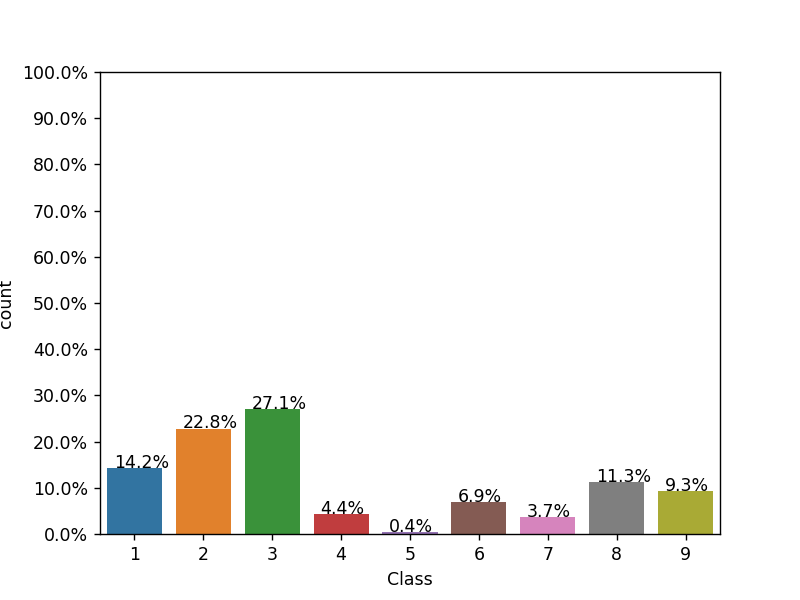

In [2]:
Y=pd.read_csv("trainLabels.csv")
total = len(Y)*1.
ax=sns.countplot(x="Class", data=Y)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100*p.get_height()/total), (p.get_x()+0.1, p.get_height()+5))

#put 11 ticks (therefore 10 steps), from 0 to the total number of rows in the dataframe
ax.yaxis.set_ticks(np.linspace(0, total, 11))

#adjust the ticklabel to the desired format, without changing the position of the ticks. 
ax.set_yticklabels(map('{:.1f}%'.format, 100*ax.yaxis.get_majorticklocs()/total))
plt.show()

<h2>3.2. Feature extraction </h2>

<h3> 3.2.1 File size  of byte files as a feature </h3>

In [ ]:
#file sizes of byte files

files=os.listdir('byteFiles')
filenames=Y['Id'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('byteFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
data_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (data_size_byte.head())

                     ID      size  Class
0  01azqd4InC7m9JpocGv5  4.234863      9
1  01IsoiSMh5gxyDYTl4CB  5.538818      2
2  01jsnpXSAlgw6aPeDxrU  3.887939      9
3  01kcPWA9K2BOxQeS5Rju  0.574219      1
4  01SuzwMJEIXsK7A8dQbl  0.370850      8


<h3> 3.2.2 box plots of file size (.byte files) feature </h3>

<IPython.core.display.Javascript object>


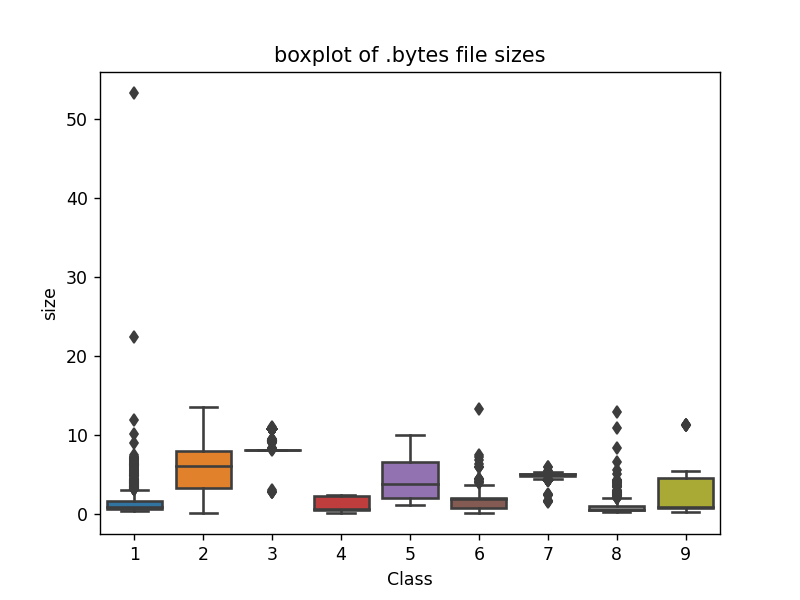

In [6]:
#boxplot of byte files
ax = sns.boxplot(x="Class", y="size", data=data_size_byte)
plt.title("boxplot of .bytes file sizes")
plt.show()

<h3>3.2.3 feature extraction from byte files </h3>

In [ ]:
#removal of addres from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000

files = os.listdir('byteFiles')
filenames=[]
array=[]
for file in files:
    if(file.endswith("bytes")):
        file=file.split('.')[0]
        text_file = open('byteFiles/'+file+".txt", 'w+')
        with open('byteFiles/'+file+".bytes","r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove('byteFiles/'+file+".bytes")
        text_file.close()

files = os.listdir('byteFiles')
filenames2=[]
feature_matrix = np.zeros((len(files),257),dtype=int)
k=0


#program to convert into bag of words of bytefiles
#this is custom-built bag of words this is unigram bag of words
byte_feature_file=open('result.csv','w+')
byte_feature_file.write("ID,0,1,2,3,4,5,6,7,8,9,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,\
21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,46,47,\
48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,6c,6d,6e,\
6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,93,94,95,96,\
97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,bb,bc,bd,be,\
bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,e3,e4,e5,\
e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??")
byte_feature_file.write("\n")
for file in files:
    filenames2.append(file)
    byte_feature_file.write(file+",")
    if(file.endswith("txt")):
        with open('byteFiles/'+file,"r") as byte_flie:
            for lines in byte_flie:
                line=lines.rstrip().split(" ")
                for hex_code in line:
                    if hex_code=='??':
                        feature_matrix[k][256]+=1
                    else:
                        feature_matrix[k][int(hex_code,16)]+=1
        byte_flie.close()
    for i, row in enumerate(feature_matrix[k]):
        if i!=len(feature_matrix[k])-1:
            byte_feature_file.write(str(row)+",")
        else:
            byte_feature_file.write(str(row))
    byte_feature_file.write("\n")
    
    k += 1

byte_feature_file.close()

In [8]:
byte_features=pd.read_csv("result.csv")
byte_features['ID']  = byte_features['ID'].str.split('.').str[0]
byte_features.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f7    f8    f9    fa    fb    fc    fd     fe     ff    ??  
0  2965  ...  2804  3687  3101  3211  3097  2758  3099   2759   5753  1824  
1  9291  ...   451  6536   439   281   302  7639   518  17001  54902  8588  

[2 rows x 258 columns]

In [9]:
data_size_byte.head(2)

ID      size  Class
0  blv3hf75R6kcUoQtIC1Y  7.547363      2
1  DcIoXf51F3Jk7TNsjbqz  8.099609      3

In [10]:
byte_features_with_size = byte_features.merge(data_size_byte, on='ID')
byte_features_with_size.to_csv("result_with_size.csv")
byte_features_with_size.head(2)

ID       0     1     2     3     4     5     6     7  \
0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   

      8  ...    f9    fa    fb    fc    fd     fe     ff    ??      size  \
0  2965  ...  3101  3211  3097  2758  3099   2759   5753  1824  5.012695   
1  9291  ...   439   281   302  7639   518  17001  54902  8588  6.556152   

   Class  
0      9  
1      2  

[2 rows x 260 columns]

In [11]:
# https://stackoverflow.com/a/29651514
def normalize(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize(byte_features_with_size)

In [12]:
result.head(2)

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   

          5         6         7         8  ...       f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.01356  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.00192  0.001147  0.001329   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  

[2 rows x 260 columns]

In [13]:
data_y = result['Class']
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

<h3>3.2.4 Multivariate Analysis </h3>

<IPython.core.display.Javascript object>


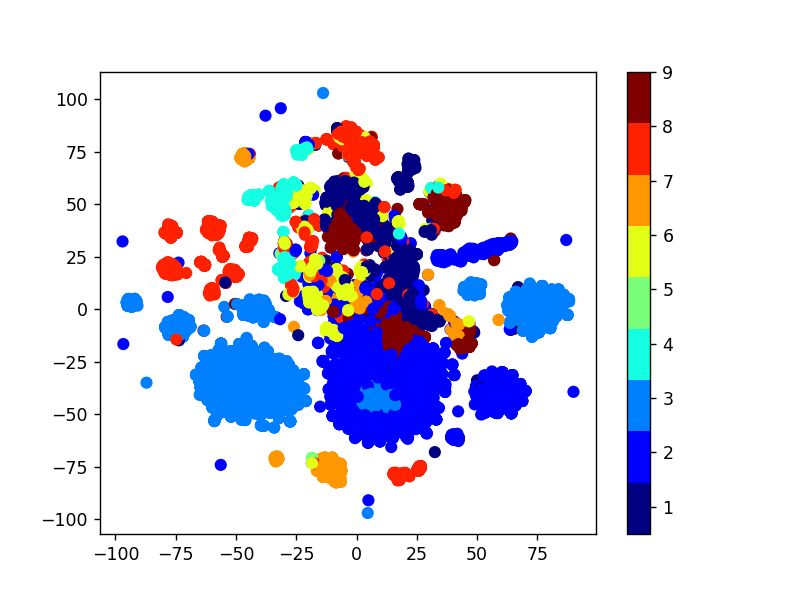

In [14]:
#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


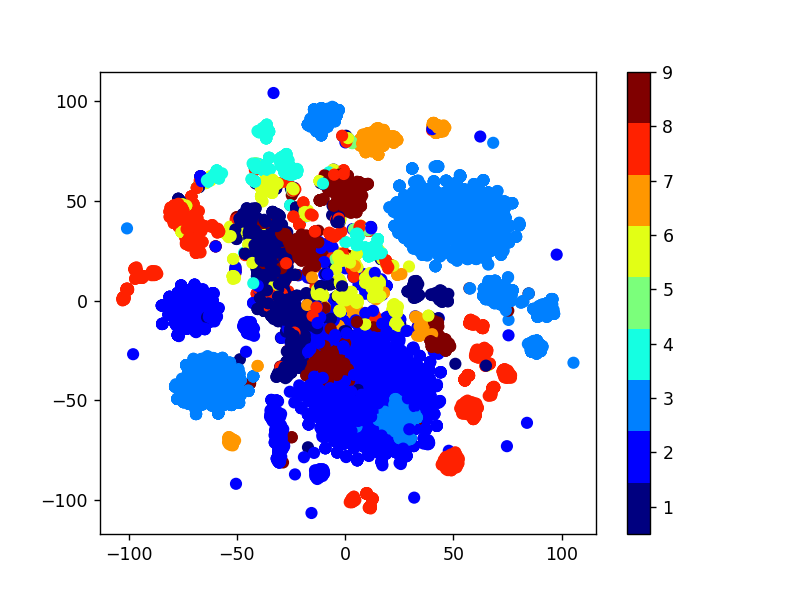

In [15]:
#this is with perplexity 30
xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result.drop(['ID','Class'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

# Train Test split

In [42]:
data_y = result['Class']
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(result.drop(['ID','Class'], axis=1), data_y,stratify=data_y,test_size=0.20)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [17]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6955
Number of data points in test data: 2174
Number of data points in cross validation data: 1739


<IPython.core.display.Javascript object>


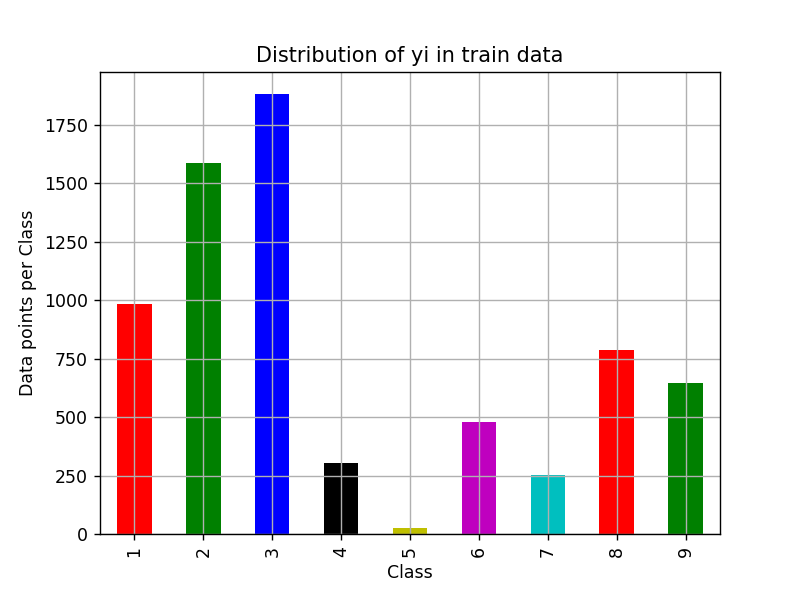

Number of data points in class 3 : 1883 ( 27.074 %)
Number of data points in class 2 : 1586 ( 22.804 %)
Number of data points in class 1 : 986 ( 14.177 %)
Number of data points in class 8 : 786 ( 11.301 %)
Number of data points in class 9 : 648 ( 9.317 %)
Number of data points in class 6 : 481 ( 6.916 %)
Number of data points in class 4 : 304 ( 4.371 %)
Number of data points in class 7 : 254 ( 3.652 %)
Number of data points in class 5 : 27 ( 0.388 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


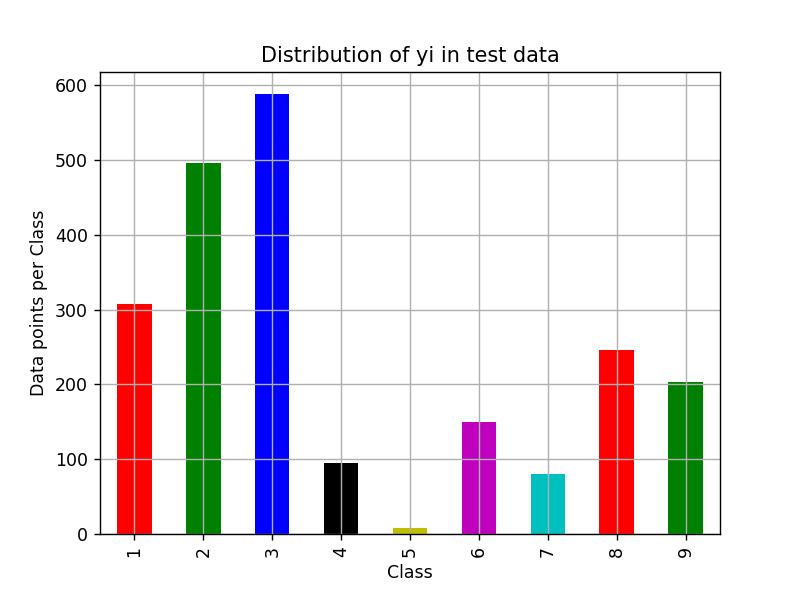

Number of data points in class 3 : 588 ( 27.047 %)
Number of data points in class 2 : 496 ( 22.815 %)
Number of data points in class 1 : 308 ( 14.167 %)
Number of data points in class 8 : 246 ( 11.316 %)
Number of data points in class 9 : 203 ( 9.338 %)
Number of data points in class 6 : 150 ( 6.9 %)
Number of data points in class 4 : 95 ( 4.37 %)
Number of data points in class 7 : 80 ( 3.68 %)
Number of data points in class 5 : 8 ( 0.368 %)
--------------------------------------------------------------------------------


<IPython.core.display.Javascript object>


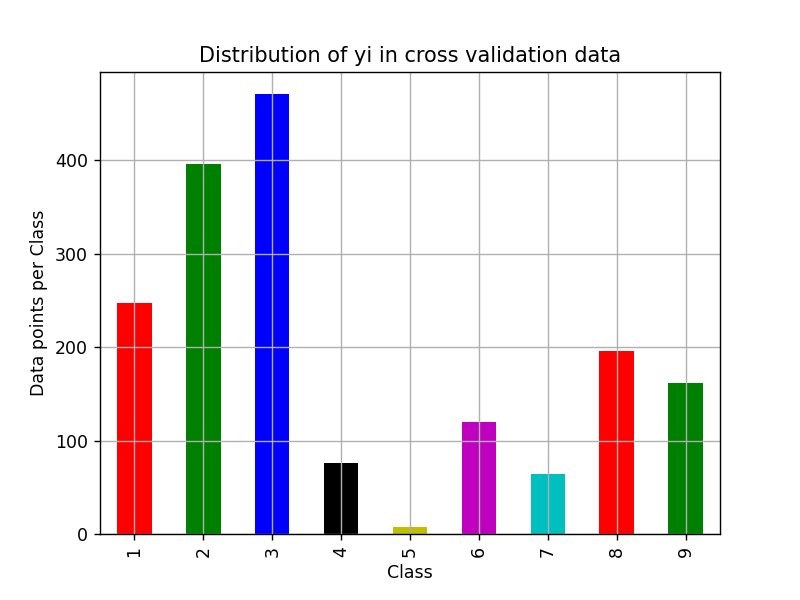

Number of data points in class 3 : 471 ( 27.085 %)
Number of data points in class 2 : 396 ( 22.772 %)
Number of data points in class 1 : 247 ( 14.204 %)
Number of data points in class 8 : 196 ( 11.271 %)
Number of data points in class 9 : 162 ( 9.316 %)
Number of data points in class 6 : 120 ( 6.901 %)
Number of data points in class 4 : 76 ( 4.37 %)
Number of data points in class 7 : 64 ( 3.68 %)
Number of data points in class 5 : 7 ( 0.403 %)


In [20]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sort_index()
test_class_distribution = y_test.value_counts().sort_index()
cv_class_distribution = y_cv.value_counts().sort_index()

my_colors = ['r','g','b','k','y','m', 'c']
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/y_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['r','g','b','k','y','m', 'c']
test_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/y_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['r','g','b','k','y','m', 'c']
cv_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/y_cv.shape[0]*100), 3), '%)')


In [2]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [1,2,3,4,5,6,7,8,9]
    cmap=sns.light_palette("green")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix"    , "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

<h1>4. Machine Learning Models</h1>

<h2>4.1. Machine Leaning Models on bytes files - (Unigram of ByteFiles)</h2>

<h3>4.1.1. Random Model - (Unigram of ByteFiles)</h3>

Log loss on Cross Validation Data using Random Model 2.5111215773410285
Log loss on Test Data using Random Model 2.468402761913263
Number of misclassified points  89.0524379024839
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


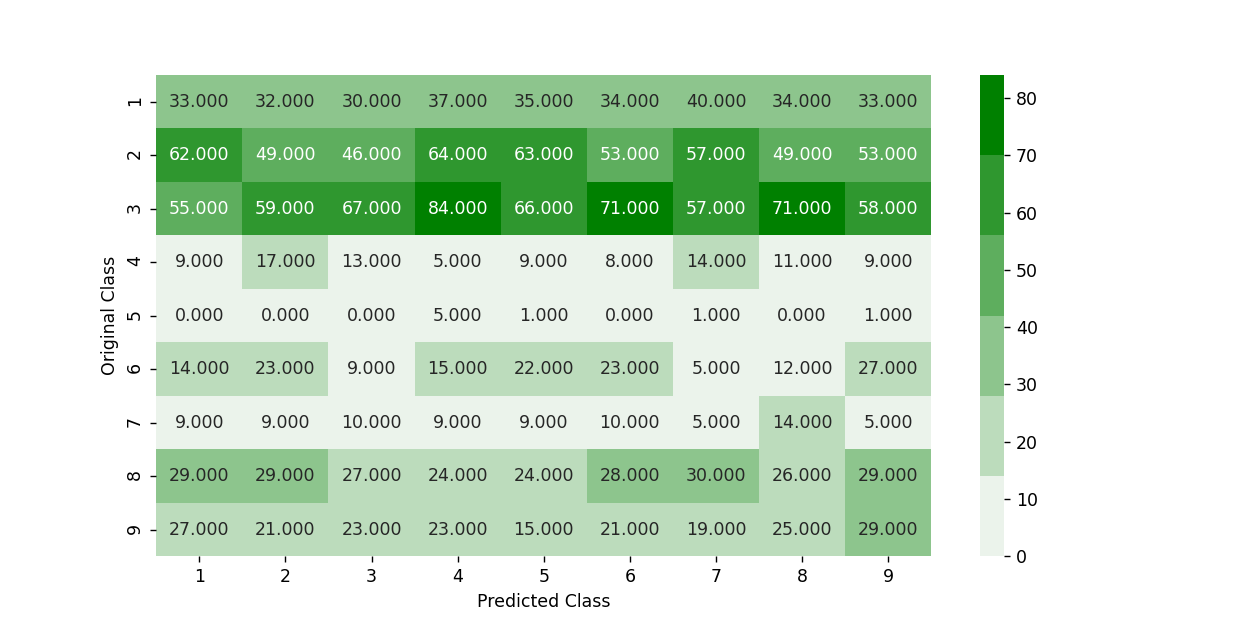

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


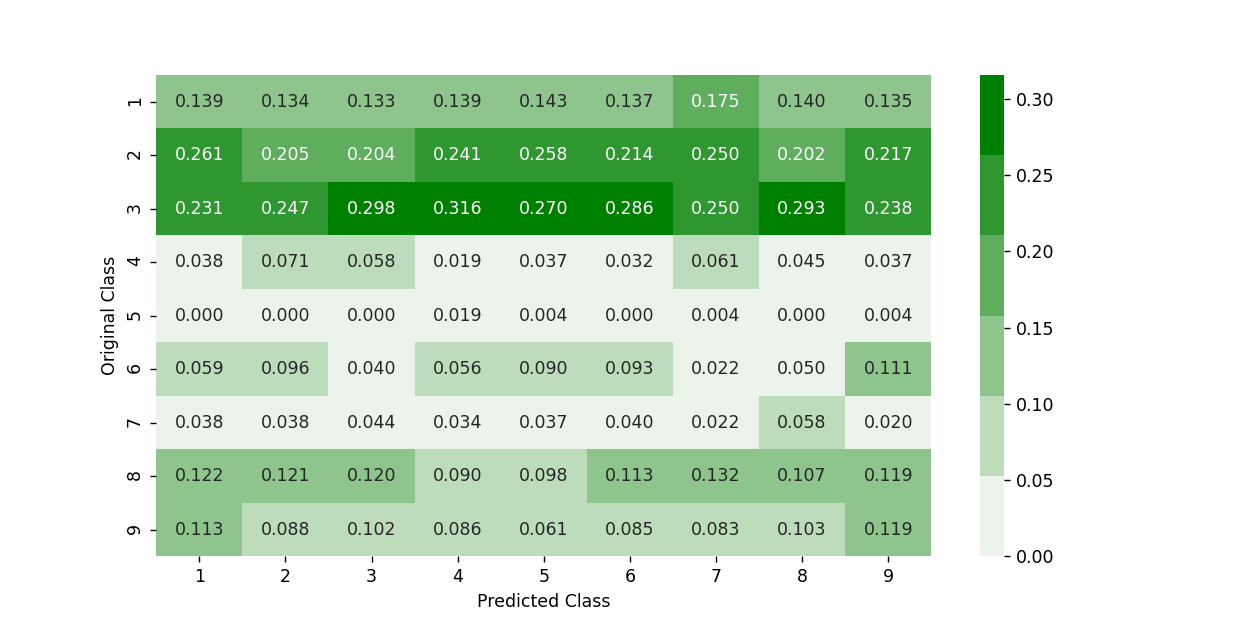

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


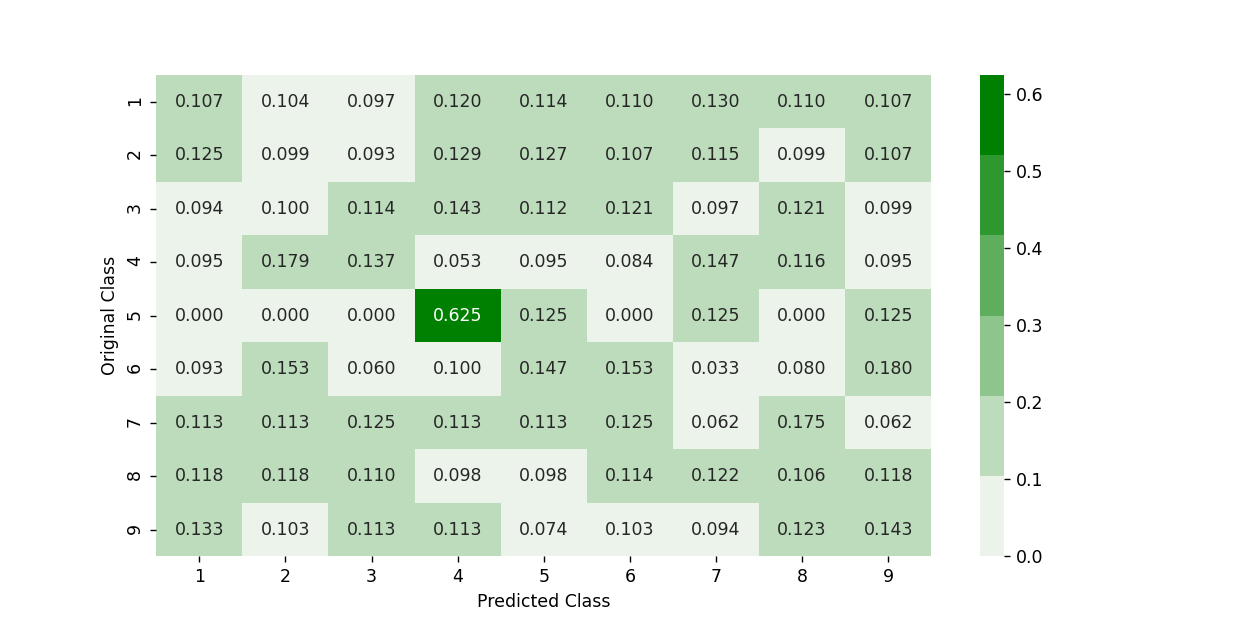

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,9))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,9)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,9))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,9)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y+1)

<h3>4.1.2. K Nearest Neighbour Classification - (Unigram of ByteFiles)</h3>

log_loss for k =  1 is 0.2159643237690745
log_loss for k =  3 is 0.2099775545877829
log_loss for k =  5 is 0.23043659201206904
log_loss for k =  7 is 0.24811798059122592
log_loss for k =  9 is 0.26196078353353475
log_loss for k =  11 is 0.2736006256584888
log_loss for k =  13 is 0.28602152274000037


<IPython.core.display.Javascript object>


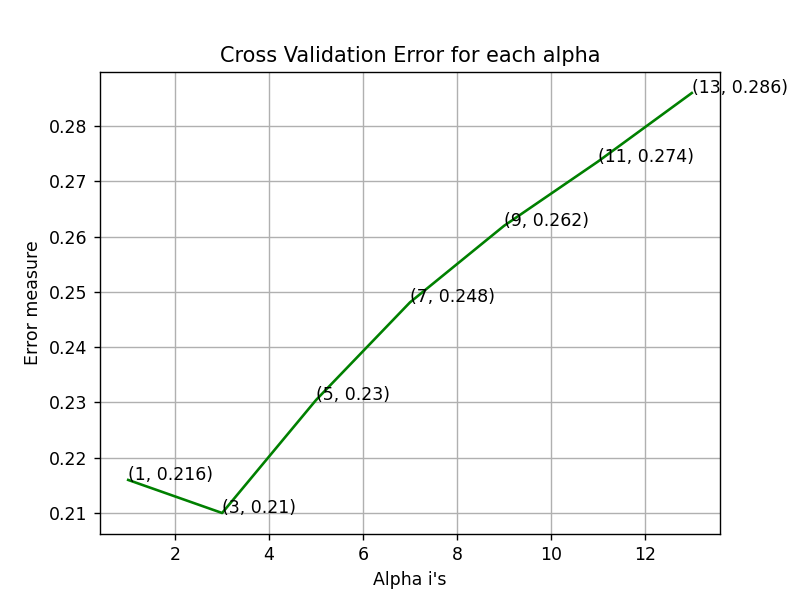

For values of best alpha =  3 The train log loss is: 0.11080858402529926
For values of best alpha =  3 The cross validation log loss is: 0.2099775545877829
For values of best alpha =  3 The test log loss is: 0.2297609207358242
Number of misclassified points  5.611775528978841
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


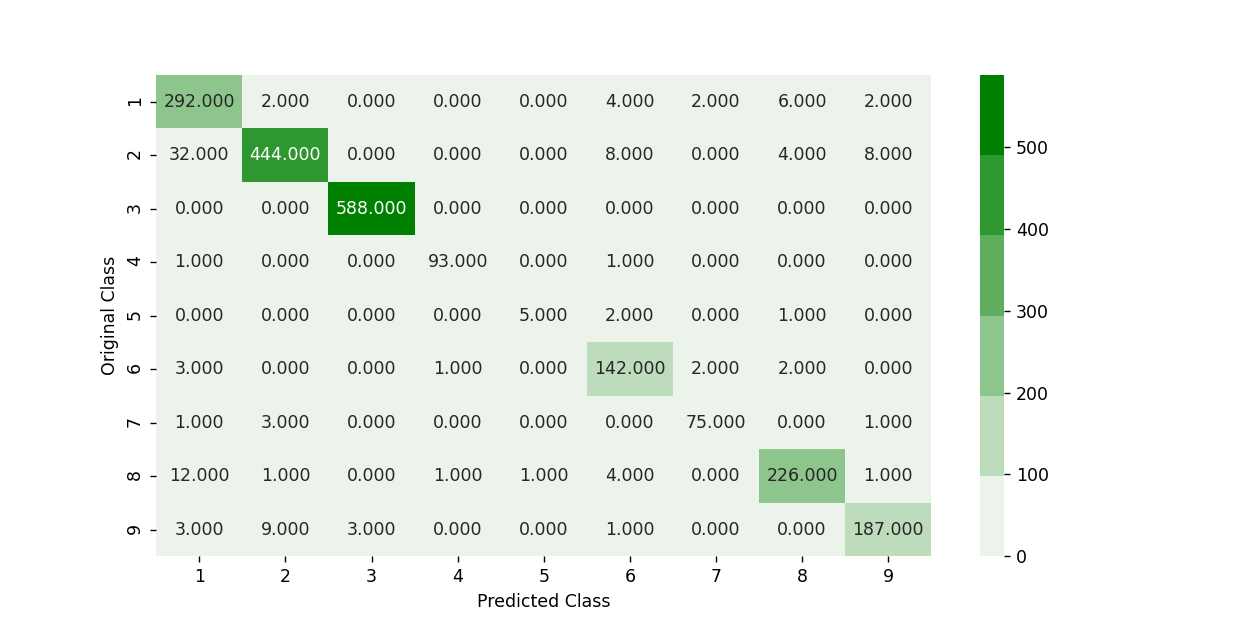

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


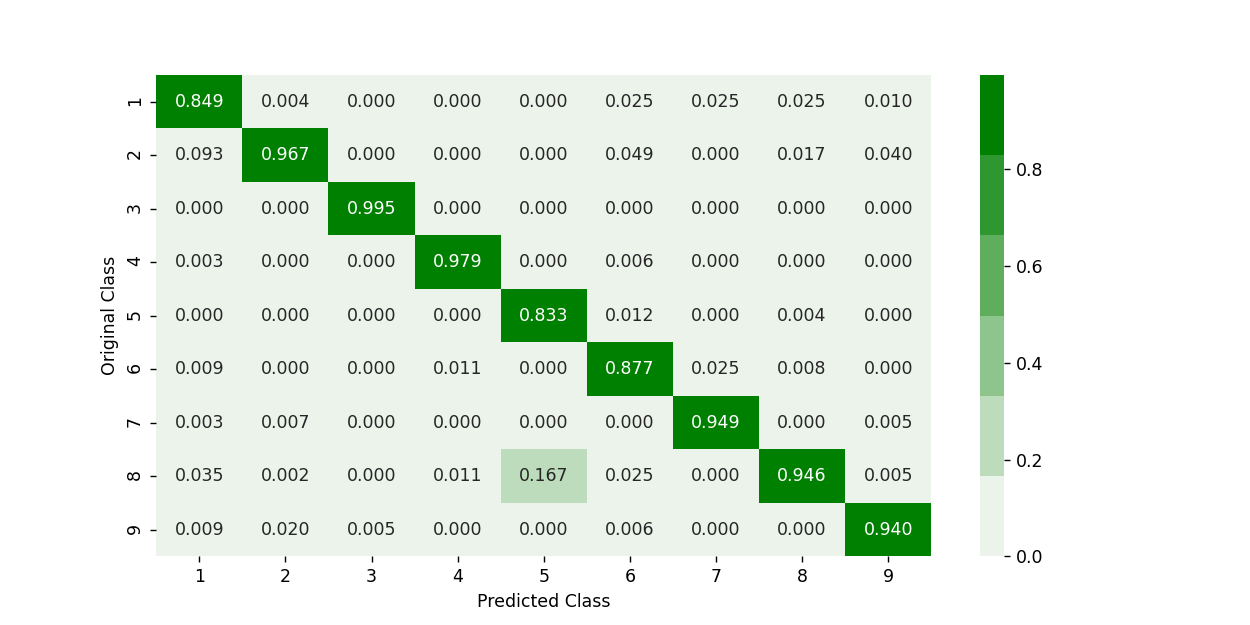

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


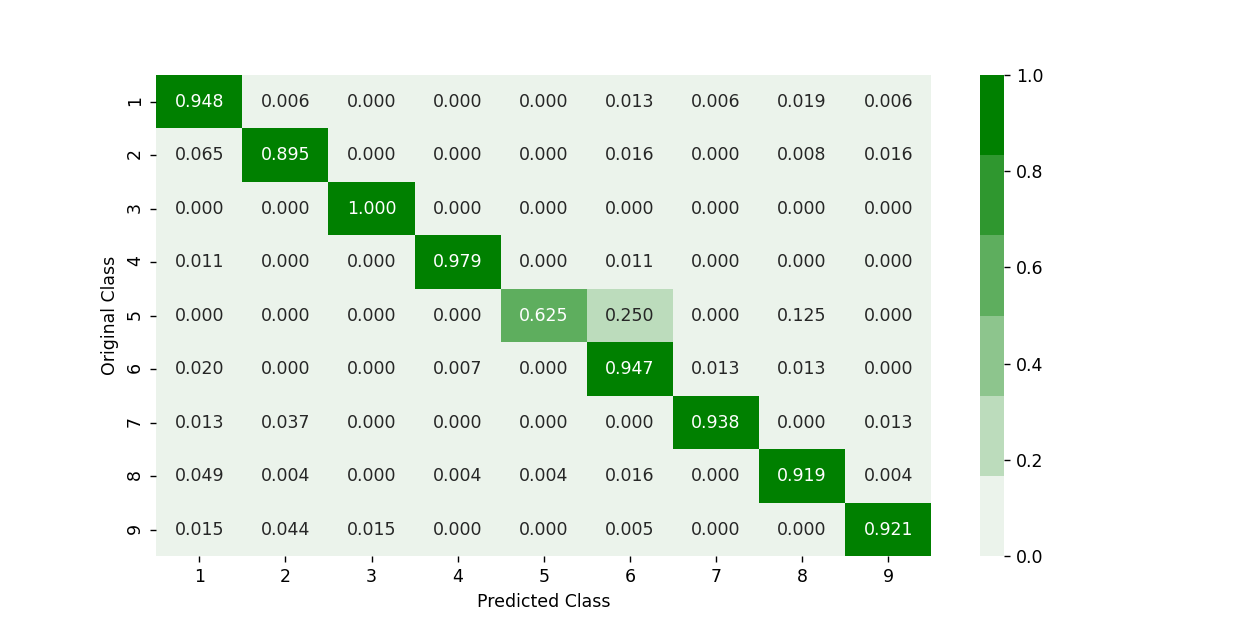

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.3. Logistic Regression - (Unigram of ByteFiles)</h3>

log_loss for c =  1e-05 is 1.156672740125159
log_loss for c =  0.0001 is 1.1566463343300175
log_loss for c =  0.001 is 1.1533786459166853
log_loss for c =  0.01 is 1.1265270835681072
log_loss for c =  0.1 is 1.025149942301585
log_loss for c =  1 is 0.9552984510191922
log_loss for c =  10 is 0.8841231536111688
log_loss for c =  100 is 0.869405525923715
log_loss for c =  1000 is 0.9034455864514298


<IPython.core.display.Javascript object>


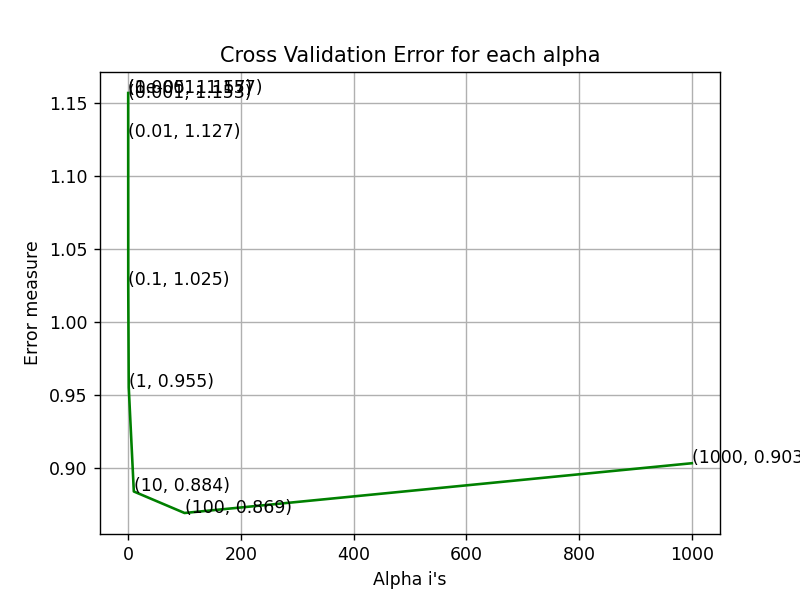

log loss for train data 0.8572645080265325
log loss for cv data 0.869405525923715
log loss for test data 0.8745860517817785
Number of misclassified points  30.49678012879485
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


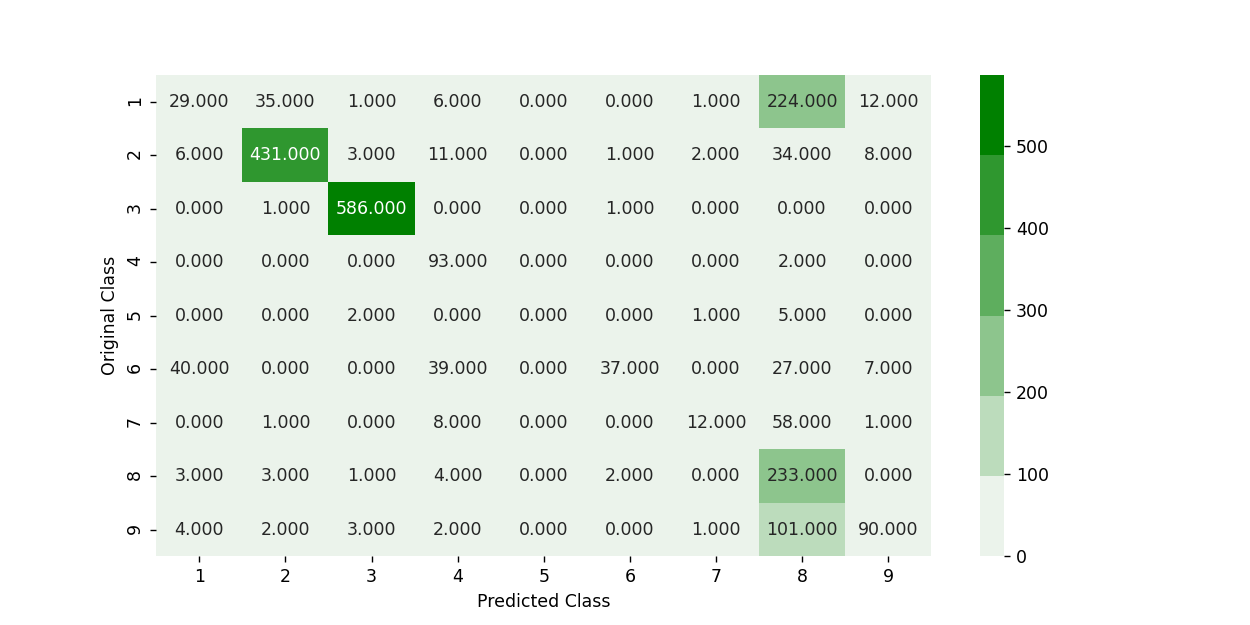

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


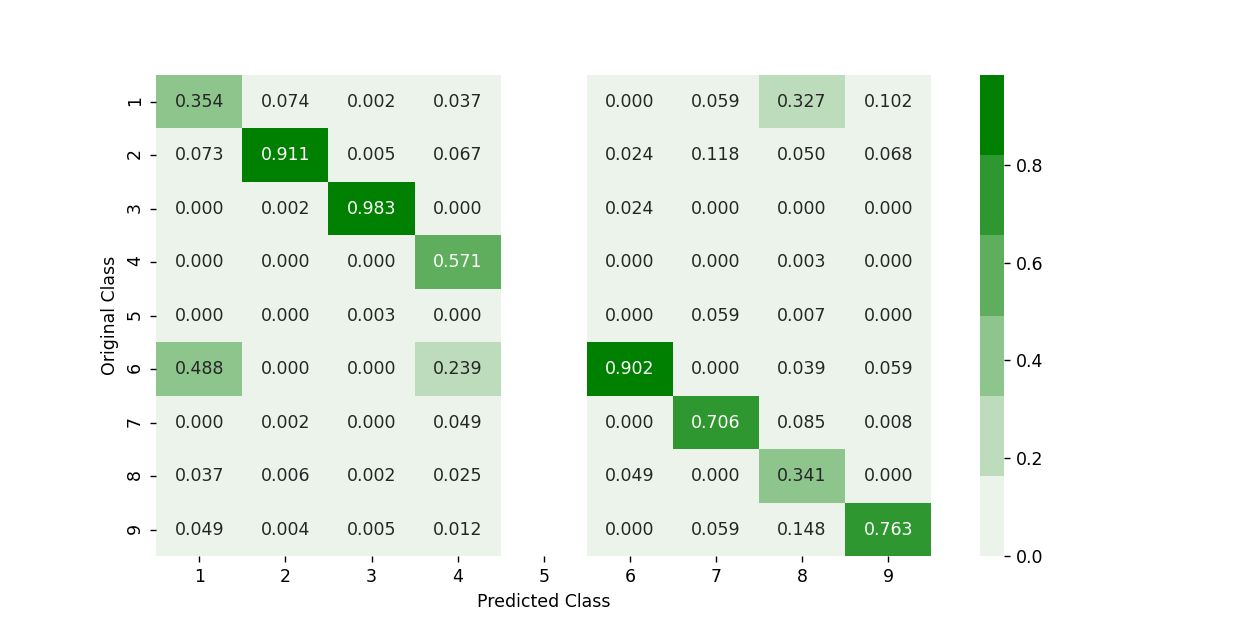

Sum of columns in precision matrix [ 1.  1.  1.  1. nan  1.  1.  1.  1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


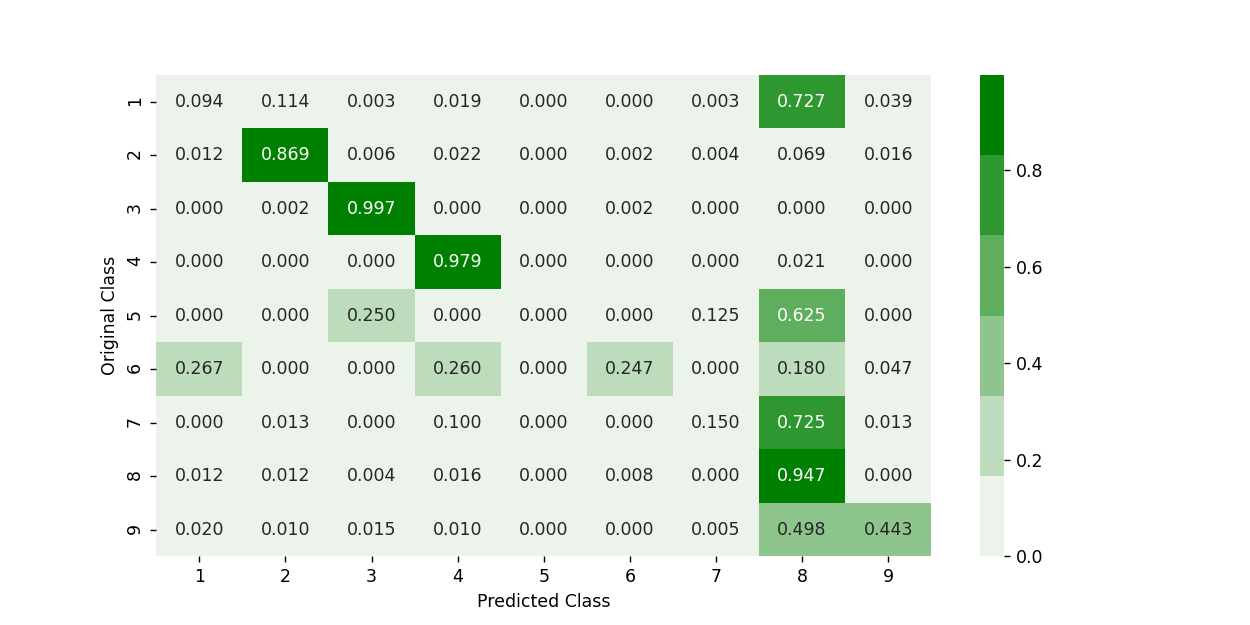

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [24]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train, y_train)
pred_y=sig_clf.predict(X_test)

predict_y = sig_clf.predict_proba(X_train)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3> 4.1.4. Random Forest Classifier - (Unigram of ByteFiles) </h3>

log_loss for c =  10 is 0.10284667550746793
log_loss for c =  50 is 0.08997145508865485
log_loss for c =  100 is 0.08948865726101891
log_loss for c =  500 is 0.08806939122497807
log_loss for c =  1000 is 0.08739236555300653
log_loss for c =  2000 is 0.08754636238700686
log_loss for c =  3000 is 0.0875632146064416


<IPython.core.display.Javascript object>


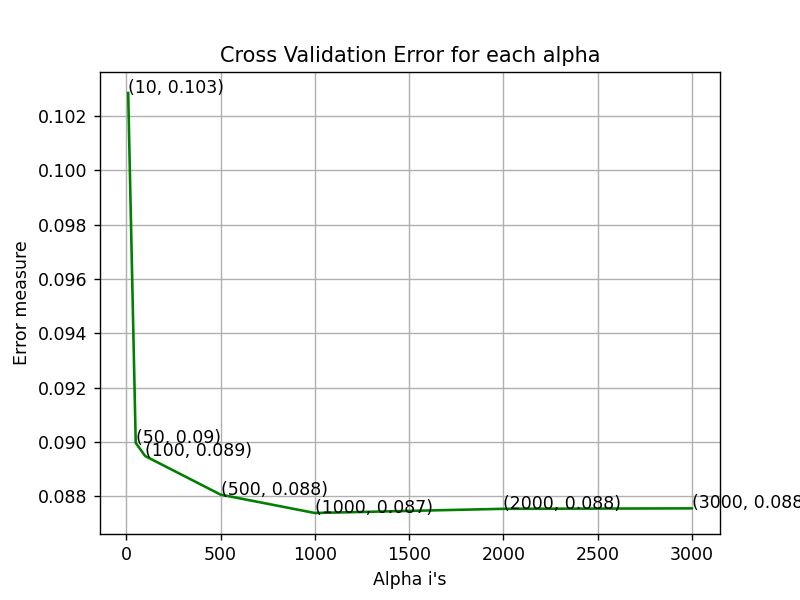

For values of best alpha =  1000 The train log loss is: 0.024743562025945527
For values of best alpha =  1000 The cross validation log loss is: 0.08739236555300653
For values of best alpha =  1000 The test log loss is: 0.08246242187610874
Number of misclassified points  2.1619135234590616
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


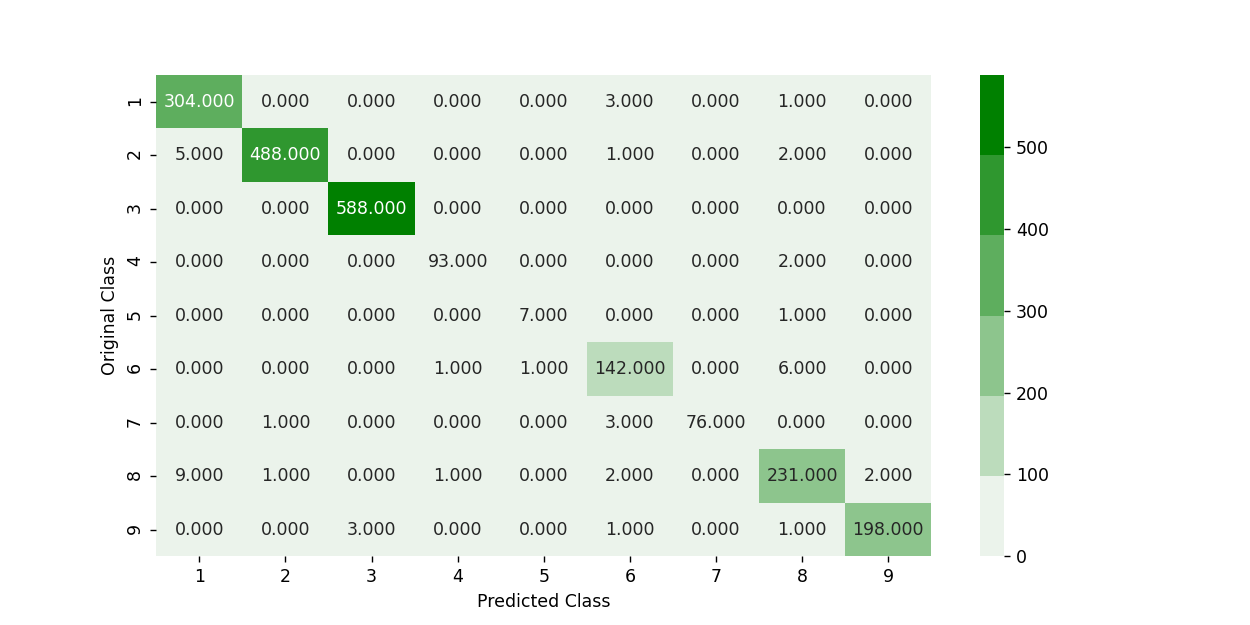

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


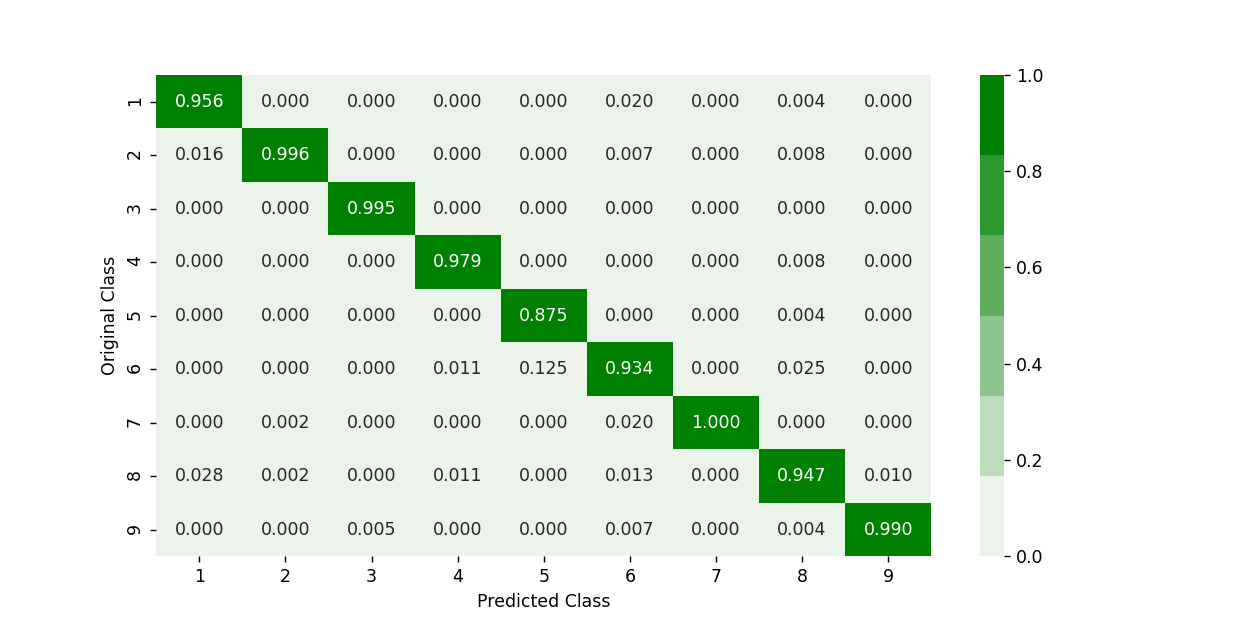

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


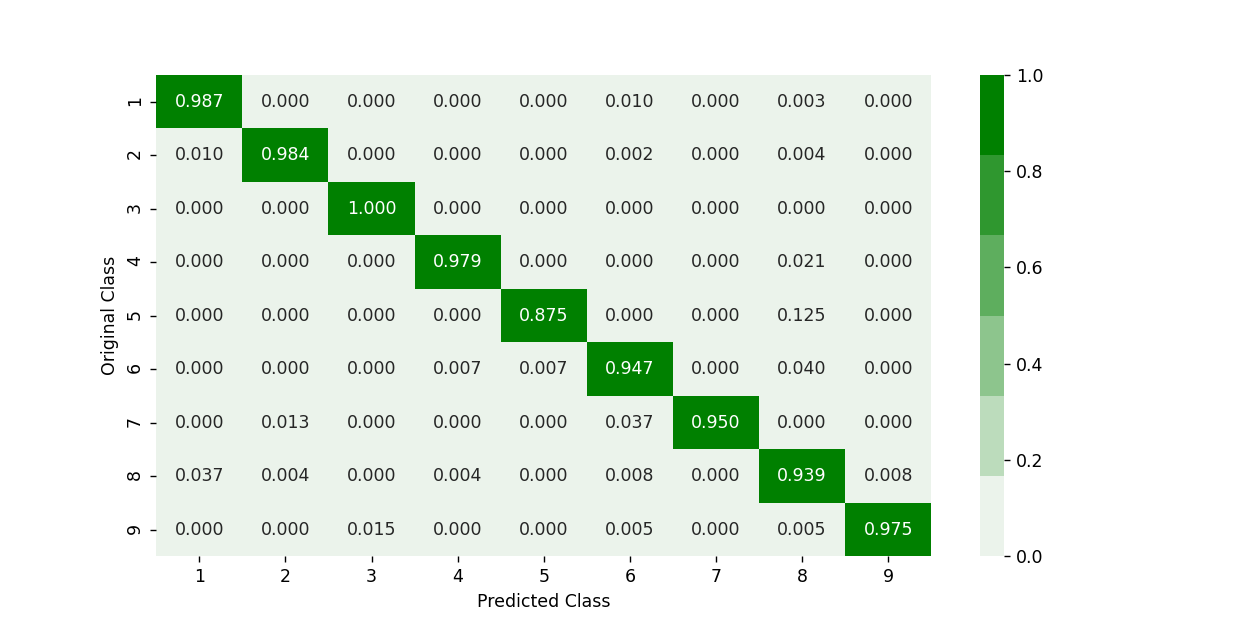

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. LightGBM Classification - (Unigram of ByteFiles)</h3>

log_loss for c =  10 is 0.09486134804826032
log_loss for c =  50 is 0.07171402249179969
log_loss for c =  100 is 0.07107300375954895
log_loss for c =  500 is 0.0710039710882125
log_loss for c =  1000 is 0.07114822119203582
log_loss for c =  2000 is 0.07138611823330059


<IPython.core.display.Javascript object>


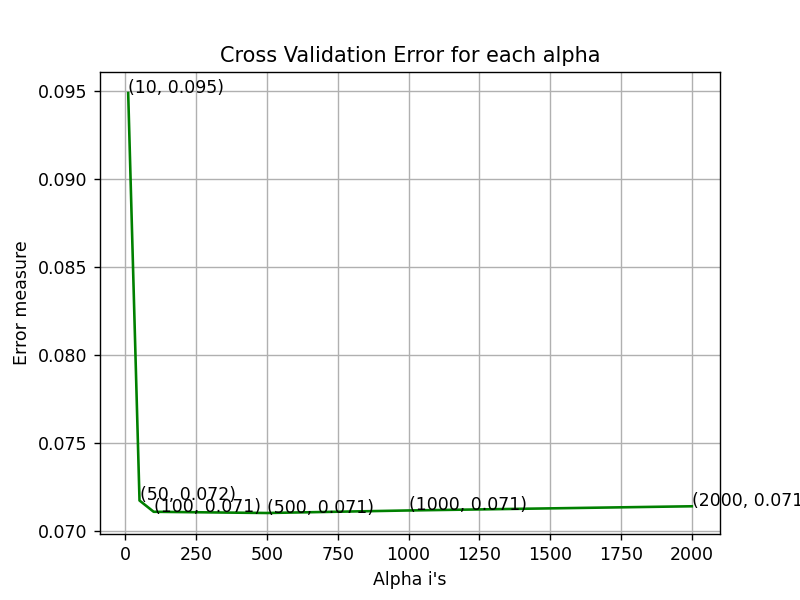

For values of best alpha =  500 The train log loss is: 0.02169965739382606
For values of best alpha =  500 The cross validation log loss is: 0.0710039710882125
For values of best alpha =  500 The test log loss is: 0.081075902301775
Number of misclassified points  1.4259429622815087
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


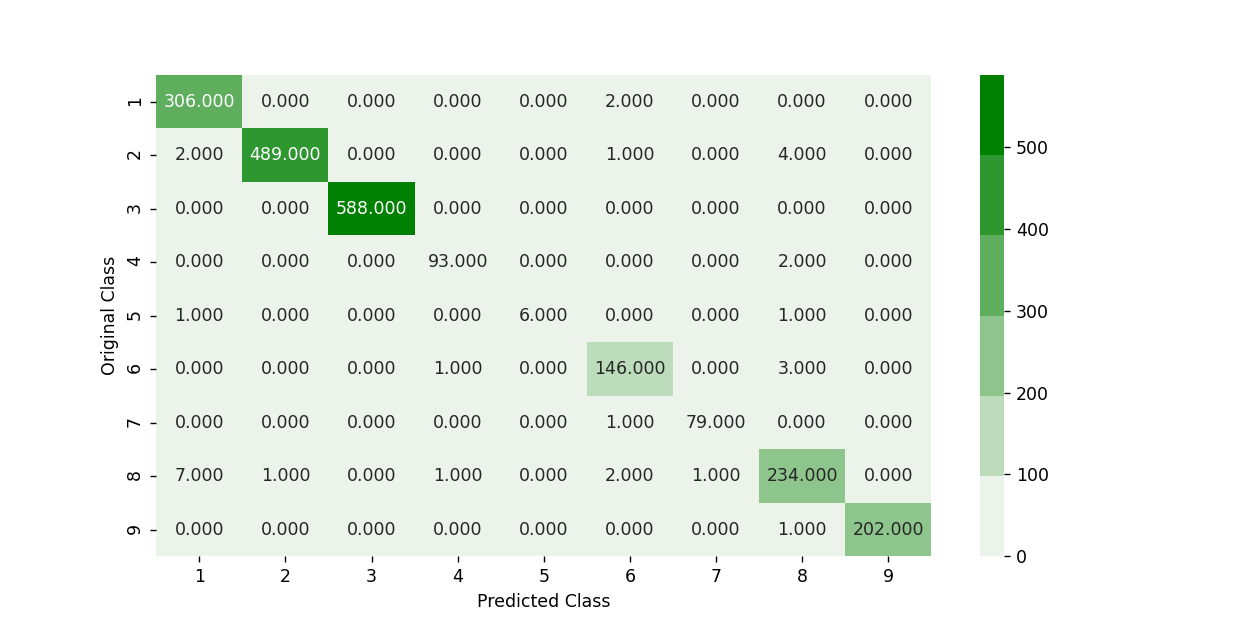

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


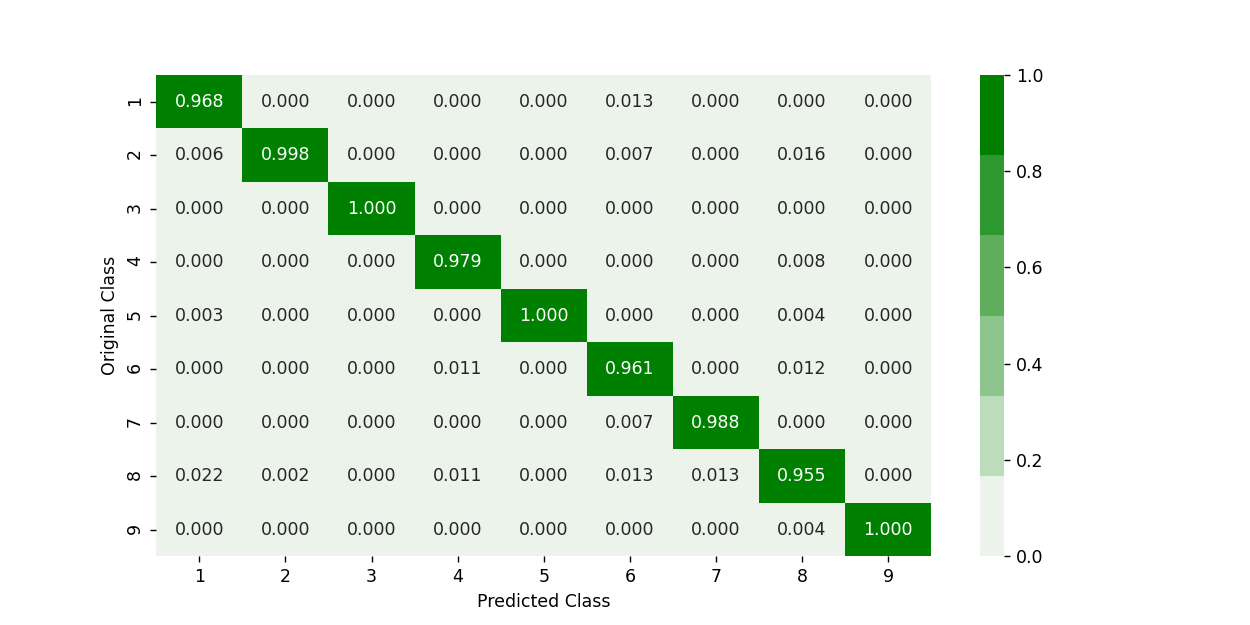

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


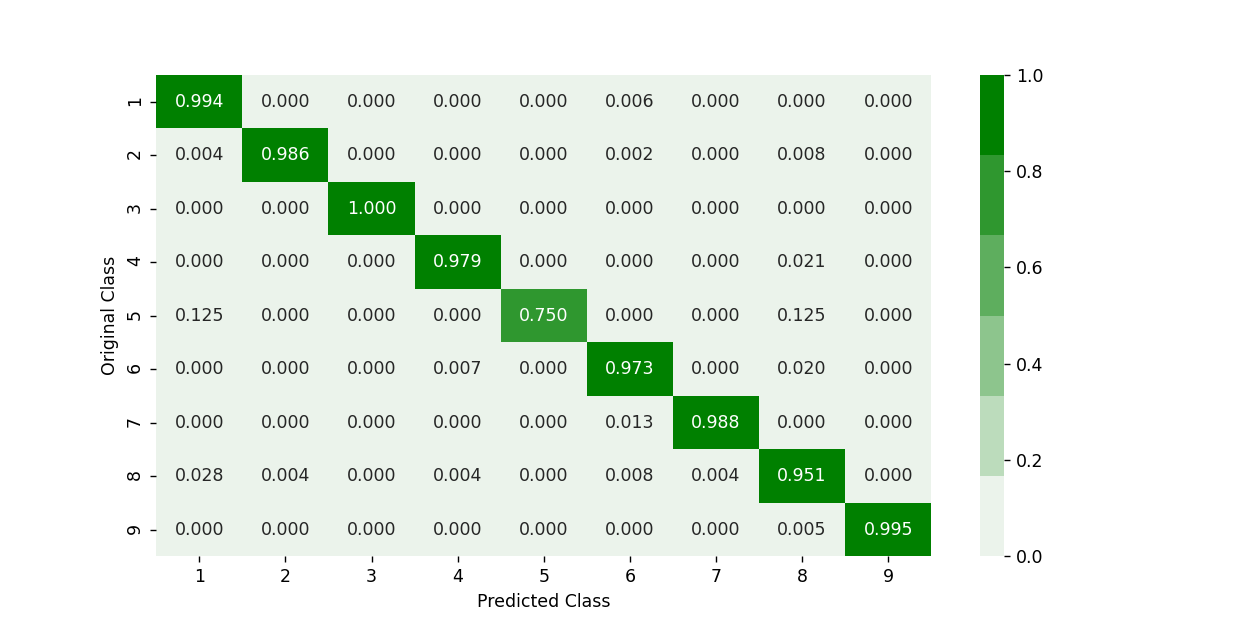

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [29]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------


'''
As XGBoost is taking too much time to complete the execution. I am using LightGBM Classifier instead.
'''

import warnings
warnings.filterwarnings('ignore')

from lightgbm import LGBMClassifier

alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=LGBMClassifier(n_estimators=i, n_jobs=-1)
    x_cfl.fit(X_train,y_train, eval_metric = 'logloss')
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=LGBMClassifier(n_estimators=alpha[best_alpha], n_jobs=-1)
x_cfl.fit(X_train, y_train, eval_metric = 'logloss')
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train, y_train)
    
predict_y = sig_clf.predict_proba(X_train)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(X_test))

<h3>4.1.5. LightGBM Classification with best hyper parameters using RandomSearch - (Unigram of ByteFiles) </h3>

In [45]:

import warnings
warnings.filterwarnings('ignore')

x_cfl=LGBMClassifier()

params={
     'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl, param_distributions = params, n_iter = 6, verbose=10, n_jobs=1, random_state = 42 )
random_cfl1.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 1/5; 1/6] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.972 total time=  13.6s
[CV 2/5; 1/6] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 2/5; 1/6] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.979 total time=  13.6s
[CV 3/5; 1/6] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 3/5; 1/6] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;, score=0.984 total time=  14.7s
[CV 4/5; 1/6] START colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5
[CV 4/5; 1/6] END colsample_bytree=1, learning_rate=0.01, max_depth=10, n_estimators=200, subsample=0.5;,

RandomizedSearchCV(estimator=LGBMClassifier(), n_iter=6, n_jobs=1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 1],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.15, 0.2],
                                        'max_depth': [3, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000,
                                                         2000],
                                        'subsample': [0.1, 0.3, 0.5, 1]},
                   random_state=42, verbose=10)

In [46]:
print (random_cfl1.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [48]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

'''
Using LGBMClassifer with best parameters selected from the above cell.
'''

x_cfl=LGBMClassifier(n_estimators=1000, learning_rate=0.1, colsample_bytree=1, max_depth=5)
x_cfl.fit(X_train,y_train, eval_metric = 'logloss')
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train,y_train)

predict_y = c_cfl.predict_proba(X_train)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(X_test)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.022868518195569378
cv loss 0.06276835331350905
test loss 0.07804270277574248


## 4.2 Bigram of byte files

In [2]:
_byte = "00,01,02,03,04,05,06,07,08,09,0a,0b,0c,0d,0e,0f,10,11,12,13,14,15,16,17,18,19,1a,1b,1c,1d,1e,1f,20,\
21,22,23,24,25,26,27,28,29,2a,2b,2c,2d,2e,2f,30,31,32,33,34,35,36,37,38,39,3a,3b,3c,3d,3e,3f,40,41,42,43,44,45,\
46,47,48,49,4a,4b,4c,4d,4e,4f,50,51,52,53,54,55,56,57,58,59,5a,5b,5c,5d,5e,5f,60,61,62,63,64,65,66,67,68,69,6a,6b,\
6c,6d,6e,6f,70,71,72,73,74,75,76,77,78,79,7a,7b,7c,7d,7e,7f,80,81,82,83,84,85,86,87,88,89,8a,8b,8c,8d,8e,8f,90,91,92,\
93,94,95,96,97,98,99,9a,9b,9c,9d,9e,9f,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,aa,ab,ac,ad,ae,af,b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,ba,\
bb,bc,bd,be,bf,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,ca,cb,cc,cd,ce,cf,d0,d1,d2,d3,d4,d5,d6,d7,d8,d9,da,db,dc,dd,de,df,e0,e1,e2,\
e3,e4,e5,e6,e7,e8,e9,ea,eb,ec,ed,ee,ef,f0,f1,f2,f3,f4,f5,bf6,f7,f8,f9,fa,fb,fc,fd,fe,ff,??"

In [48]:
os.getcwd()

'/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection'

In [70]:
#removal of address from byte files
# contents of .byte files
# ----------------
#00401000 56 8D 44 24 08 50 8B F1 E8 1C 1B 00 00 C7 06 08 
#-------------------
#we remove the starting address 00401000



directory = '/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/'
files = os.listdir(os.path.join(directory, 'byteFiles'))

for file in tqdm(files):
    
    if (file.endswith("bytes")):
        
        file=file.split('.')[0]
        text_file = open(os.path.join(directory,'byteFiles', file+".txt"), 'w+')
        
        with open(os.path.join(directory,'byteFiles',file+".bytes"),"r") as fp:
            lines=""
            for line in fp:
                a=line.rstrip().split(" ")[1:]
                b=' '.join(a)
                b=b+"\n"
                text_file.write(b)
            fp.close()
            os.remove(os.path.join(directory,'byteFiles', file+".bytes"))
        text_file.close()

  0%|          | 0/10868 [00:00<?, ?it/s]

In [127]:
directory = '/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/'

files = os.listdir(os.path.join(directory, 'byteFiles'))
filenames=[]

if os.path.exists(os.path.join(directory, 'final_bytes.csv')):
    os.remove(os.path.join(directory, 'final_bytes.csv'))

#program to convert into bag of words of bytefiles

byte_features = open(os.path.join(directory, 'final_bytes.csv'),'w+')

byte_features.write("ID,"+','.join(features))
byte_features.write("\n")

for file in tqdm(files):
    
    filenames.append(file)
    
    if(file.endswith("txt")):
        
        with open(os.path.join(directory, 'byteFiles', file),"r") as byte_flie:
            
            byte_features.write(file.split(".")[0]+",")
            
            temp1 = _dict.copy()
            all_records = []
            for records in byte_flie:
                record = records.rstrip().split(" ")
                all_records.extend(record)
            
            for code in all_records:
                temp1[code.lower()] += 1
            
            bi_grams = [' '.join(x) for x in list(ngrams(all_records, 2))]
            
            for code in bi_grams:
                temp1[code.lower()] += 1
           
            feat = [str(temp1[x]) for x in features]
            byte_features.write(','.join(feat))
            byte_features.write("\n")
            
            del temp1

byte_features.close()

  0%|          | 0/10868 [00:00<?, ?it/s]

In [71]:
directory = '/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/'

files = os.listdir(os.path.join(directory, 'byteFiles'))

features = []

def compute_bigrams(file):
    
    temp = []
    with open(os.path.join(directory, 'byteFiles', file),"r") as byte_flie:
        
        all_records = []
       
        for records in byte_flie:
            record = records.rstrip().split(" ")
            all_records.extend(record)
           
             # computing unigrams
            for code in record:
                temp.append(code.lower())
                
        temp = list(set(temp))
        
        # computing bigrams
        bigrams = [' '.join(x) for x in list(ngrams(all_records, 2))]
        
        for code in bigrams:
            temp.append(code.lower())
        temp = list(set(temp))

    return temp

In [61]:
from nltk.util import ngrams

for file in tqdm(files):
    features.extend(compute_bigrams(file))
    features = list(set(features))

In [114]:
len(features)

66306

In [121]:
print(features[:20])

['58 cb', 'ce 4f', '8f b0', '27 50', 'cb d6', '82 65', '05 fc', '2e 8b', 'af df', 'fa 0c', 'f7 c0', 'e9 4f', '48 87', '4c 49', '59 d0', '23 cd', '3c 8e', '65 a1', '88 23', 'ab 3d']


In [116]:

with open(os.path.join(directory, 'bigram_keys.pkl'), 'wb') as big:
    pickle.dump(features, big)

In [3]:
directory = '/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/'

In [4]:
with open(os.path.join(directory, 'bigram_keys.pkl'), 'rb') as big:
    features = pickle.load(big)

In [5]:
_byte = _byte.replace(","," ")
_byte_unigrams = _byte.split(" ")
features.extend(_byte_unigrams)

In [6]:
len(features)

66563

In [7]:
features.insert(0,'ID')

In [8]:
len(list(set(features)))

66308

In [9]:
features = list(set(features))

### 4.2.1 Creating dictionary for class labels of byte files

In [17]:
bytefiles_ids = pd.read_csv('trainLabels.csv')

In [18]:
bytefiles_ids.values

array([['01kcPWA9K2BOxQeS5Rju', 1],
       ['04EjIdbPV5e1XroFOpiN', 1],
       ['05EeG39MTRrI6VY21DPd', 1],
       ...,
       ['kG29BLiFYPgWtpb350sO', 9],
       ['kGITL4OJxYMWEQ1bKBiP', 9],
       ['KGorN9J6XAC4bOEkmyup', 9]], dtype=object)

In [19]:
dict_files = dict(bytefiles_ids.values)

In [20]:
print('class of "hvnbNWILJC0gj57wy8KM" file : ',dict_files['hvnbNWILJC0gj57wy8KM'])

class of "hvnbNWILJC0gj57wy8KM" file :  8


In [21]:
len(dict_files)

10868

In [149]:
# files = os.listdir('byteFiles')
# h = 'hvnbNWILJC0gj57wy8KM'
# fc = {}
# for file in files:
#     for key, value in dict_files.items():
#         if key == file.split('.')[0]:
#             fc[key] = value
# print(fc)

### 4.2.2 Generating Sparse Matrices along with the class labels for the corresponsing files

In [25]:
import scipy
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
from tqdm import tqdm
import os
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from datetime import datetime

def generate_sparse_matrices(files):
      
    '''
    Using multiprocessing to compute 4 sparse matrices and its files. As the column counts is huge, the jupyter kernel keep dying 
    when used pandas dataframe.
    '''
    process_id = os.getpid()
    
    vectorizer = CountVectorizer(lowercase = False, ngram_range = (2,2), vocabulary = features)
    sparse_bigram = csr_matrix((len(files), len(features)))
    
    count = 0
    
    print(' ', end='', flush=True)
    text = "Processing Sparse file (Process ID #{})".format(process_id)
    
    file_classes = {}
    
    for file in files:
        
        for key, value in dict_files.items():
            if key == file.split('.')[0]:
                file_classes[key] = value
                
    class_filename = 'dict_fileclasses_'+str(process_id)+'.npy'
    np.save(class_filename, file_classes)
                
    for i, file in tqdm(enumerate(files), desc = text):          
        count += 1
        f = open('byteFiles/' + file)
        sparse_bigram[i, :] += csr_matrix(vectorizer.fit_transform([f.read().replace('\n', ' ').lower()]))
        f.close()
        
    
    sparse_filename = 'sparse_bytebigram_'+str(process_id)+'.npz'
    scipy.sparse.save_npz(sparse_filename, sparse_bigram)
    
    print(f'Processed Files Count: {count} | Sparse File {sparse_filename} | Corresponding class label file is {class_filename}\n')


In [26]:
#Ref: https://docs.python.org/3/library/multiprocessing.html#module-multiprocessing

from multiprocessing import Pool


files = os.listdir('byteFiles')
parts = int(len(files)/4)
byte_files_part_1 = files[:parts]
byte_files_part_2 = files[parts:(2*parts)]
byte_files_part_3 = files[(2*parts):(3*parts)]
byte_files_part_4 = files[(3*parts):]

all_byte_files = [byte_files_part_1, byte_files_part_2, byte_files_part_3, byte_files_part_4]

print("Multiprocessing is commenced...\n")
p = Pool(4)


p.map(generate_sparse_matrices, all_byte_files)

print("\nMultiprocessing is completed and resides in \n\n", os.getcwd())

Multiprocessing is commenced...

    

Processing Sparse file (Process ID #1943): 2717it [1:43:56,  2.30s/it]
Processing Sparse file (Process ID #1944): 2717it [1:45:00,  2.32s/it]
Processing Sparse file (Process ID #1945): 2717it [1:45:32,  2.33s/it]
Processing Sparse file (Process ID #1946): 2707it [1:45:37,  3.62s/it]

Processed Files Count: 2717 | Sparse File sparse_bytebigram_1943.npz | Corresponding class label file is dict_fileclasses_1943.npy



Processing Sparse file (Process ID #1946): 2717it [1:46:13,  2.35s/it]


Processed Files Count: 2717 | Sparse File sparse_bytebigram_1944.npz | Corresponding class label file is dict_fileclasses_1944.npy

Processed Files Count: 2717 | Sparse File sparse_bytebigram_1945.npz | Corresponding class label file is dict_fileclasses_1945.npy

Processed Files Count: 2717 | Sparse File sparse_bytebigram_1946.npz | Corresponding class label file is dict_fileclasses_1946.npy


Multiprocessing is completed and resides in 

 /home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection


Process ForkPoolWorker-11:
Process ForkPoolWorker-10:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/opt/conda/lib/python3.7/multiprocessing/pool.py", line 110, in worker

### Merging the Sparse Matrix files and also the same for class labels (y)

In [27]:
from scipy import sparse

sparse_file_1 = sparse.load_npz('sparse_bytebigram_1943.npz')
sparse_file_2 = sparse.load_npz('sparse_bytebigram_1944.npz')
sparse_file_3 = sparse.load_npz('sparse_bytebigram_1945.npz')
sparse_file_4 = sparse.load_npz('sparse_bytebigram_1946.npz')


In [28]:
from scipy.sparse import vstack

sparse_bytefile_bigrams = vstack((sparse_file_1,sparse_file_2,sparse_file_3,sparse_file_4))

In [29]:
sparse_bytefile_bigrams

<10868x66308 sparse matrix of type '<class 'numpy.float64'>'
	with 495857441 stored elements in Compressed Sparse Row format>

In [67]:
sparse.save_npz('sparse_bytefile_bigrams.npz', sparse_bytefile_bigrams)

In [79]:
byteclass_file_1 = np.load('dict_fileclasses_1943.npy', allow_pickle = True) 
dict_file_1 = dict(byteclass_file_1.item())
array_file_1 = np.array(list(dict_file_1.items()))

byteclass_file_2 = np.load('dict_fileclasses_1944.npy', allow_pickle = True)
dict_file_2 = dict(byteclass_file_2.item())
array_file_2 = np.array(list(dict_file_2.items()))

byteclass_file_3 = np.load('dict_fileclasses_1945.npy', allow_pickle = True)
dict_file_3 = dict(byteclass_file_3.item())
array_file_3 = np.array(list(dict_file_3.items()))

byteclass_file_4 = np.load('dict_fileclasses_1946.npy', allow_pickle = True) 
dict_file_4 = dict(byteclass_file_4.item())
array_file_4 = np.array(list(dict_file_4.items()))

In [80]:
result_id_class = np.concatenate((array_file_1, array_file_2, array_file_3, array_file_4), axis = 0)
result_id_class[:10]

array([['blv3hf75R6kcUoQtIC1Y', '2'],
       ['DcIoXf51F3Jk7TNsjbqz', '3'],
       ['31KjQiNWATfPaozHtYOl', '1'],
       ['426c9FYfeVQbJnygpdKH', '8'],
       ['4jAPkMmCzW9r8QK6SVnB', '3'],
       ['6JOiKa5LrAtu42TpY7kI', '2'],
       ['hSNuWGB9KZzeamA7tF4R', '1'],
       ['bQuFKkRwSeVIDGyLqXpx', '3'],
       ['jwQPIaD0Urhgv3FH2Cnb', '2'],
       ['jTgF9SKzb8qxdsC6NnmY', '9']], dtype='<U21')

In [81]:
result_id_classes = pd.DataFrame(result_id_class)
result_id_classes.to_csv('result_id_classes.csv')

In [82]:
result_id_classes.head()

0  1
0  blv3hf75R6kcUoQtIC1Y  2
1  DcIoXf51F3Jk7TNsjbqz  3
2  31KjQiNWATfPaozHtYOl  1
3  426c9FYfeVQbJnygpdKH  8
4  4jAPkMmCzW9r8QK6SVnB  3

In [6]:
len(result_id_class)

10868

In [7]:
class_labels = result_id_class[:,1]

In [8]:
len(class_labels)

10868

In [9]:
class_labels_y = pd.DataFrame(class_labels)

In [10]:
class_labels_y.head()

0
0  2
1  3
2  1
3  8
4  3

<h2> 4.3 Modeling with .asm files </h2>

<pre>
There are 10868 files of asm 
All the files make up about 150 GB
The asm files contains :
1. Address
2. Segments
3. Opcodes
4. Registers
5. function calls
6. APIs
With the help of parallel processing we extracted all the features.In parallel we can use all the cores that are present in our computer.


Here we extracted 52 features from all the asm files which are important.

We read the top solutions and handpicked the features from those papers/videos/blogs. <br> Refer:https://www.kaggle.com/c/malware-classification/discussion
</pre>

<h3> 4.3.1 Feature extraction from asm files </h3>

<p>
<li> To extract the unigram features from the .asm files we need to process ~150GB of data </li>
<li style="font-size:18px"><b>Note: Below two cells will take lot of time (over 48 hours to complete)</b></li>
<li> We will provide you the output file of these two cells, which you can directly use it </li>
</p>

In [ ]:
#intially create five folders
#first 
#second
#third
#fourth
#fifth
#this code tells us about random split of files into five folders
folder_1 ='first'
folder_2 ='second'
folder_3 ='third'
folder_4 ='fourth'
folder_5 ='fifth'
folder_6 = 'output'
for i in [folder_1,folder_2,folder_3,folder_4,folder_5,folder_6]:
    if not os.path.isdir(i):
        os.makedirs(i)

source='train/'
files = os.listdir('train')
#ID=df['Id'].tolist()
data=range(0,10868)
r.shuffle(data)
count=0
for i in range(0,10868):
    if i % 5==0:
        shutil.move(source+files[data[i]],'first')
    elif i%5==1:
        shutil.move(source+files[data[i]],'second')
    elif i%5 ==2:
        shutil.move(source+files[data[i]],'third')
    elif i%5 ==3:
        shutil.move(source+files[data[i]],'fourth')
    elif i%5==4:
        shutil.move(source+files[data[i]],'fifth')

In [ ]:

#http://flint.cs.yale.edu/cs421/papers/x86-asm/asm.html

def firstprocess():
    #The prefixes tells about the segments that are present in the asm files
    #There are 450 segments(approx) present in all asm files.
    #this prefixes are best segments that gives us best values.
    #https://en.wikipedia.org/wiki/Data_segment
    
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    #this are opcodes that are used to get best results
    #https://en.wikipedia.org/wiki/X86_instruction_listings
    
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    #best keywords that are taken from different blogs
    keywords = ['.dll','std::',':dword']
    #Below taken registers are general purpose registers and special registers
    #All the registers which are taken are best 
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\asmsmallfile.txt","w+")
    files = os.listdir('first')
    for f in files:
        #filling the values with zeros into the arrays
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        # https://docs.python.org/3/library/codecs.html#codecs.ignore_errors
        # https://docs.python.org/3/library/codecs.html#codecs.Codec.encode
        with codecs.open('first/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                # https://www.tutorialspoint.com/python3/string_rstrip.htm
                line=lines.rstrip().split()
                l=line[0]
                #counting the prefixs in each and every line
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                #counting the opcodes in each and every line
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                #counting registers in the line
                for i in range(len(registers)):
                    for li in line:
                        # we will use registers only in 'text' and 'CODE' segments
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                #counting keywords in the line
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        #pushing the values into the file after reading whole file
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


#same as above 
def secondprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\mediumasmfile.txt","w+")
    files = os.listdir('second')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('second/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()

# same as smallprocess() functions
def thirdprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\largeasmfile.txt","w+")
    files = os.listdir('third')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('third/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fourthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\hugeasmfile.txt","w+")
    files = os.listdir('fourth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fourth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def fifthprocess():
    prefixes = ['HEADER:','.text:','.Pav:','.idata:','.data:','.bss:','.rdata:','.edata:','.rsrc:','.tls:','.reloc:','.BSS:','.CODE']
    opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']
    keywords = ['.dll','std::',':dword']
    registers=['edx','esi','eax','ebx','ecx','edi','ebp','esp','eip']
    file1=open("output\trainasmfile.txt","w+")
    files = os.listdir('fifth/')
    for f in files:
        prefixescount=np.zeros(len(prefixes),dtype=int)
        opcodescount=np.zeros(len(opcodes),dtype=int)
        keywordcount=np.zeros(len(keywords),dtype=int)
        registerscount=np.zeros(len(registers),dtype=int)
        features=[]
        f2=f.split('.')[0]
        file1.write(f2+",")
        opcodefile.write(f2+" ")
        with codecs.open('fifth/'+f,encoding='cp1252',errors ='replace') as fli:
            for lines in fli:
                line=lines.rstrip().split()
                l=line[0]
                for i in range(len(prefixes)):
                    if prefixes[i] in line[0]:
                        prefixescount[i]+=1
                line=line[1:]
                for i in range(len(opcodes)):
                    if any(opcodes[i]==li for li in line):
                        features.append(opcodes[i])
                        opcodescount[i]+=1
                for i in range(len(registers)):
                    for li in line:
                        if registers[i] in li and ('text' in l or 'CODE' in l):
                            registerscount[i]+=1
                for i in range(len(keywords)):
                    for li in line:
                        if keywords[i] in li:
                            keywordcount[i]+=1
        for prefix in prefixescount:
            file1.write(str(prefix)+",")
        for opcode in opcodescount:
            file1.write(str(opcode)+",")
        for register in registerscount:
            file1.write(str(register)+",")
        for key in keywordcount:
            file1.write(str(key)+",")
        file1.write("\n")
    file1.close()


def main():
    #the below code is used for multiprogramming
    #the number of process depends upon the number of cores present System
    #process is used to call multiprogramming
    manager=multiprocessing.Manager() 	
    p1=Process(target=firstprocess)
    p2=Process(target=secondprocess)
    p3=Process(target=thirdprocess)
    p4=Process(target=fourthprocess)
    p5=Process(target=fifthprocess)
    #p1.start() is used to start the thread execution
    p1.start()
    p2.start()
    p3.start()
    p4.start()
    p5.start()
    #After completion all the threads are joined
    p1.join()
    p2.join()
    p3.join()
    p4.join()
    p5.join()

if __name__=="__main__":
    main()

In [5]:
# asmoutputfile.csv(output genarated from the above two cells) will contain all the extracted features from .asm files
# this file will be uploaded in the drive, you can directly use this
dfasm=pd.read_csv("asmoutputfile.csv")
Y.columns = ['ID', 'Class']
result_asm = pd.merge(dfasm, Y,on='ID', how='left')
result_asm.head()

ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  edx  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   18   66   15   43   83    0   17   48   29   
1        0        0       3  ...   18   29   48   82   12    0   14    0   20   
2      145        0       3  ...   13   42   10   67   14    0   11    0    9   
3        0        0       3  ...    6    8   14    7    2    0    8    0    6   
4        0        0       3  ...   12    9   18   29    5    0   11    0   11   

   Class  
0      1  
1      1  
2      1  
3      1  
4      1  

[5 rows x 53 columns]

In [42]:
result_asm.shape

(10868, 53)

<h3> 4.3.1.1 Files sizes of each .asm file </h3>

In [84]:
#file sizes of byte files

files=os.listdir('asmFiles')
filenames=Y['ID'].tolist()
class_y=Y['Class'].tolist()
class_bytes=[]
sizebytes=[]
fnames=[]
for file in files:
    # print(os.stat('byteFiles/0A32eTdBKayjCWhZqDOQ.txt'))
    # os.stat_result(st_mode=33206, st_ino=1125899906874507, st_dev=3561571700, st_nlink=1, st_uid=0, st_gid=0, 
    # st_size=3680109, st_atime=1519638522, st_mtime=1519638522, st_ctime=1519638522)
    # read more about os.stat: here https://www.tutorialspoint.com/python/os_stat.htm
    statinfo=os.stat('asmFiles/'+file)
    # split the file name at '.' and take the first part of it i.e the file name
    file=file.split('.')[0]
    if any(file == filename for filename in filenames):
        i=filenames.index(file)
        class_bytes.append(class_y[i])
        # converting into Mb's
        sizebytes.append(statinfo.st_size/(1024.0*1024.0))
        fnames.append(file)
asm_size_byte=pd.DataFrame({'ID':fnames,'size':sizebytes,'Class':class_bytes})
print (asm_size_byte.head())

In [6]:
asm_size_df = pd.read_csv('asm_with_size.csv')

In [7]:
asm_size_df.head()

Unnamed: 0                    ID   size_asm  Class
0           0  01azqd4InC7m9JpocGv5  56.229886      9
1           1  01IsoiSMh5gxyDYTl4CB  13.999378      2
2           2  01jsnpXSAlgw6aPeDxrU   8.507785      9
3           3  01kcPWA9K2BOxQeS5Rju   0.078190      1
4           4  01SuzwMJEIXsK7A8dQbl   0.996723      8

In [8]:
asm_size_df = asm_size_df.drop('Unnamed: 0', axis =1 )

In [9]:
asm_size_df

ID   size_asm  Class
0      01azqd4InC7m9JpocGv5  56.229886      9
1      01IsoiSMh5gxyDYTl4CB  13.999378      2
2      01jsnpXSAlgw6aPeDxrU   8.507785      9
3      01kcPWA9K2BOxQeS5Rju   0.078190      1
4      01SuzwMJEIXsK7A8dQbl   0.996723      8
...                     ...        ...    ...
10863  loIP1tiwELF9YNZQjSUO  11.269457      4
10864  LOP6HaJKXpkic5dyuVnT   2.045257      4
10865  LOqA6FX02GWguYrI1Zbe   1.957262      4
10866  LoWgaidpb2IUM5ACcSGO   3.936188      4
10867  lS0IVqXeJrN6Dzi9Pap1   3.546772      4

[10868 rows x 3 columns]

<h3> 4.3.1.2 Distribution of .asm file sizes</h3>

<IPython.core.display.Javascript object>


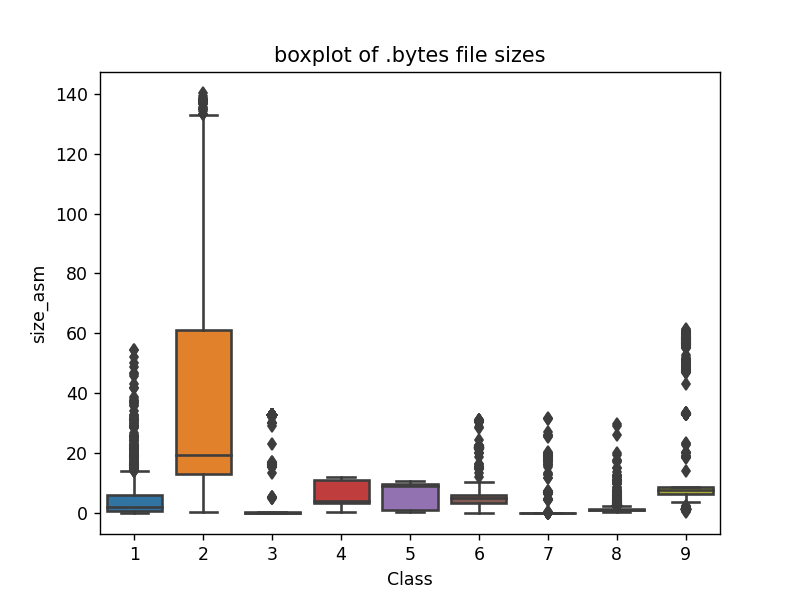

In [10]:
#boxplot of asm files
ax = sns.boxplot(x="Class", y="size_asm", data=asm_size_df)
plt.title("boxplot of .bytes file sizes")
plt.show()

In [11]:
# add the file size feature to previous extracted features
print(result_asm.shape)
print(asm_size_df.shape)
result_asm = pd.merge(result_asm, asm_size_df.drop(['Class'], axis=1),on='ID', how='inner')
result_asm.head()

(10868, 53)
(10868, 3)


ID  HEADER:  .text:  .Pav:  .idata:  .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju       19     744      0      127      57      0   
1  1E93CpP60RHFNiT5Qfvn       17     838      0      103      49      0   
2  3ekVow2ajZHbTnBcsDfX       17     427      0       50      43      0   
3  3X2nY7iQaPBIWDrAZqJe       17     227      0       43      19      0   
4  46OZzdsSKDCFV8h7XWxf       17     402      0       59     170      0   

   .rdata:  .edata:  .rsrc:  ...  esi  eax  ebx  ecx  edi  ebp  esp  eip  \
0      323        0       3  ...   66   15   43   83    0   17   48   29   
1        0        0       3  ...   29   48   82   12    0   14    0   20   
2      145        0       3  ...   42   10   67   14    0   11    0    9   
3        0        0       3  ...    8   14    7    2    0    8    0    6   
4        0        0       3  ...    9   18   29    5    0   11    0   11   

   Class  size_asm  
0      1  0.078190  
1      1  0.063400  
2      1  0.041695  
3      1  0.018757  
4      1  0.037567  

[5 rows x 54 columns]

In [12]:
# https://stackoverflow.com/a/29651514
def normalize_asm(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result_asm = normalize_asm(result_asm)

In [52]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class  size_asm  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

<h3> 4.3.2 Univariate analysis on  asm file features</h3>

<IPython.core.display.Javascript object>


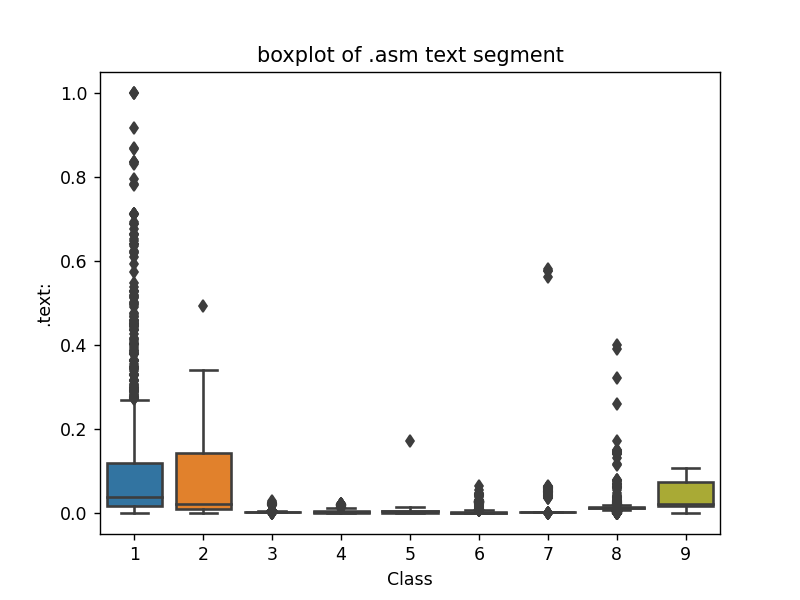

In [13]:
ax = sns.boxplot(x="Class", y=".text:", data=result_asm)
plt.title("boxplot of .asm text segment")
plt.show()

<pre>
The plot is between Text and class 
Class 1,2 and 9 can be easly separated
</pre>

<IPython.core.display.Javascript object>


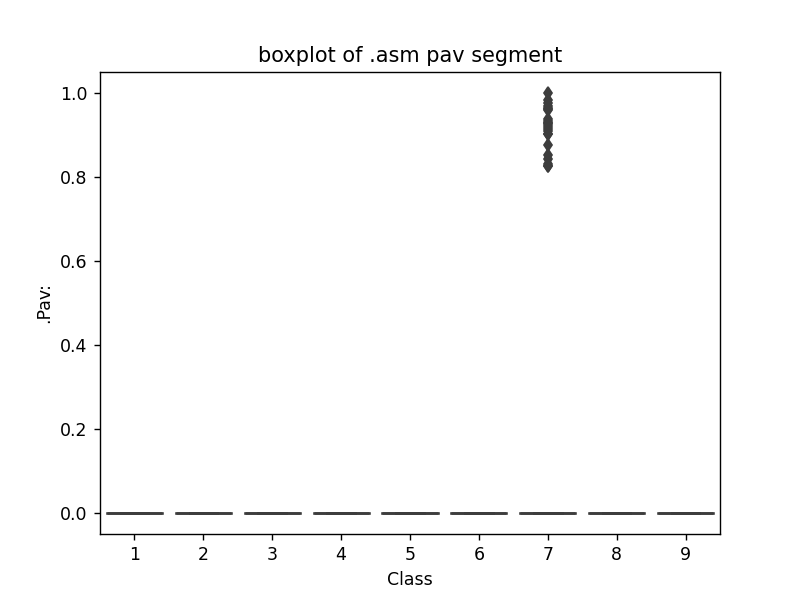

In [14]:
ax = sns.boxplot(x="Class", y=".Pav:", data=result_asm)
plt.title("boxplot of .asm pav segment")
plt.show()

<IPython.core.display.Javascript object>


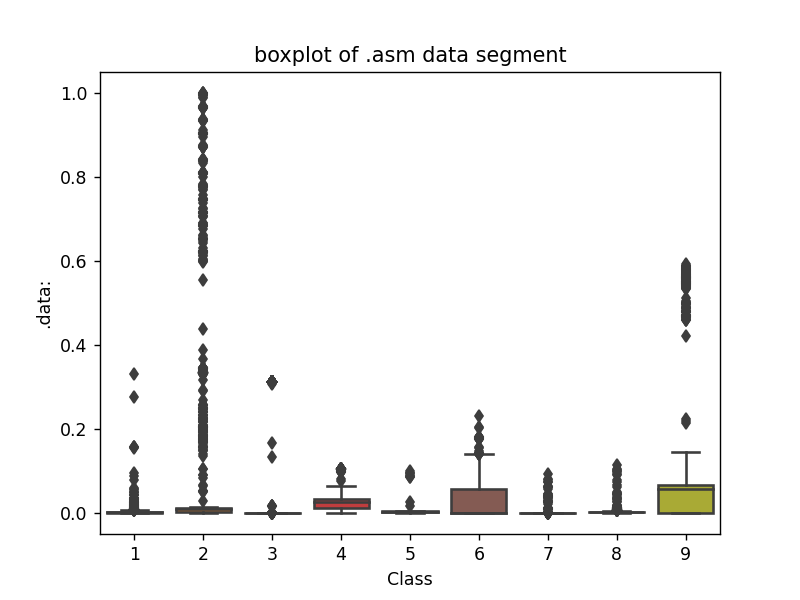

In [55]:
ax = sns.boxplot(x="Class", y=".data:", data=result_asm)
plt.title("boxplot of .asm data segment")
plt.show()

<pre>
The plot is between data segment and class label 
class 6 and class 9 can be easily separated from given points
</pre>

<IPython.core.display.Javascript object>


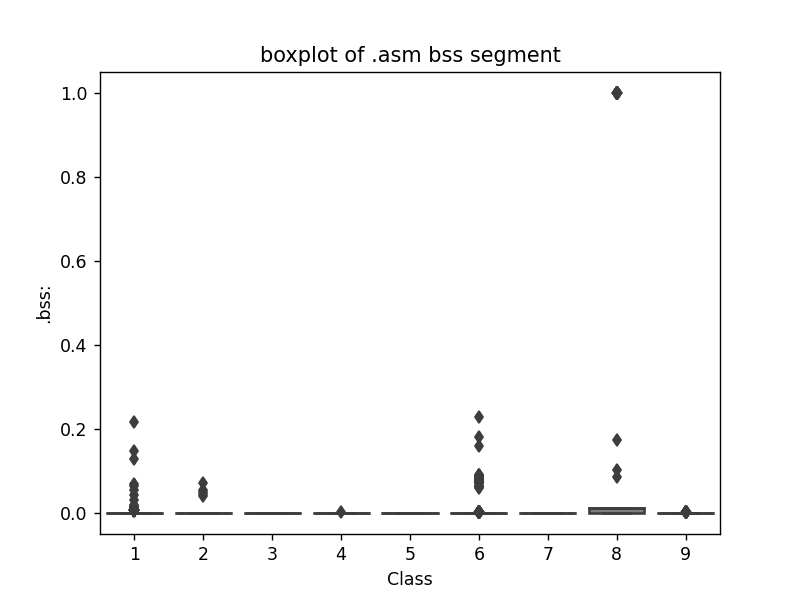

In [56]:
ax = sns.boxplot(x="Class", y=".bss:", data=result_asm)
plt.title("boxplot of .asm bss segment")
plt.show()

<pre>
plot between bss segment and class label
very less number of files are having bss segment
</pre>

<IPython.core.display.Javascript object>


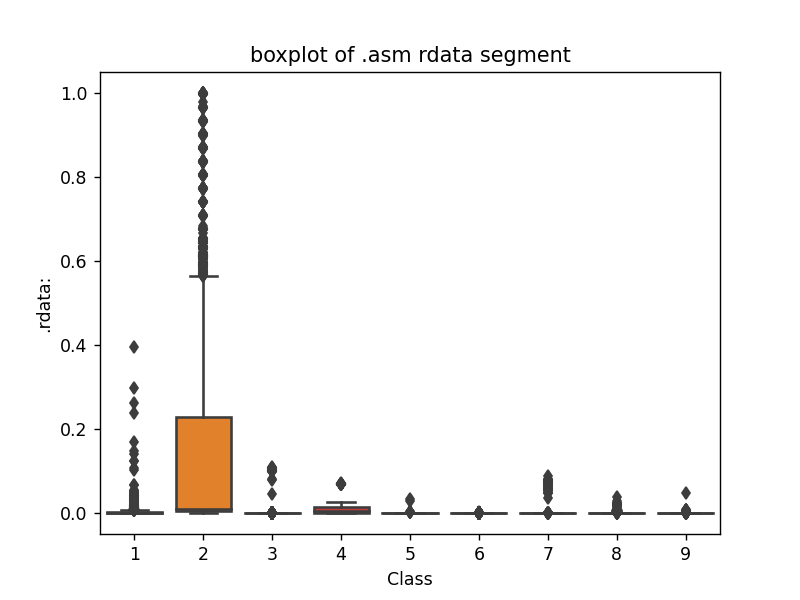

In [57]:
ax = sns.boxplot(x="Class", y=".rdata:", data=result_asm)
plt.title("boxplot of .asm rdata segment")
plt.show()

<pre>
Plot between rdata segment and Class segment
Class 2 can be easily separated 75 pecentile files are having 1M rdata lines
</pre>

<IPython.core.display.Javascript object>


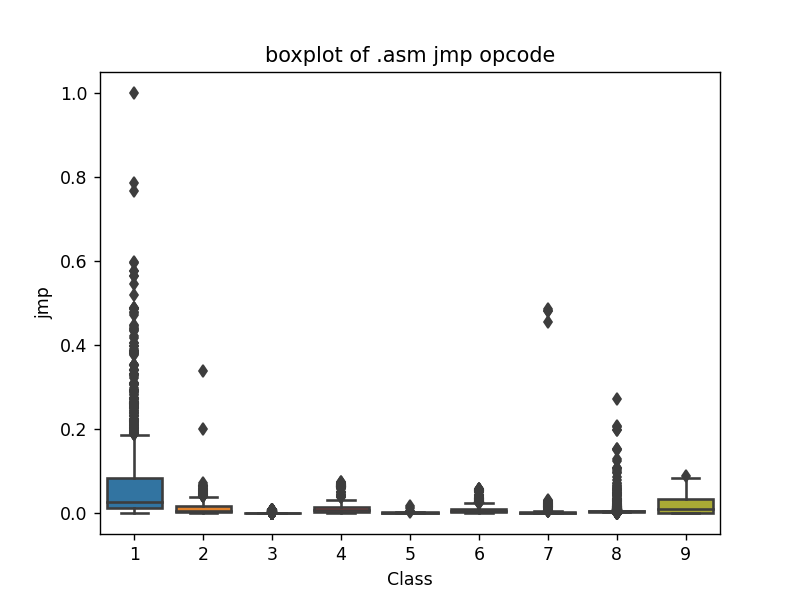

In [58]:
ax = sns.boxplot(x="Class", y="jmp", data=result_asm)
plt.title("boxplot of .asm jmp opcode")
plt.show()

<pre>
plot between jmp and Class label
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


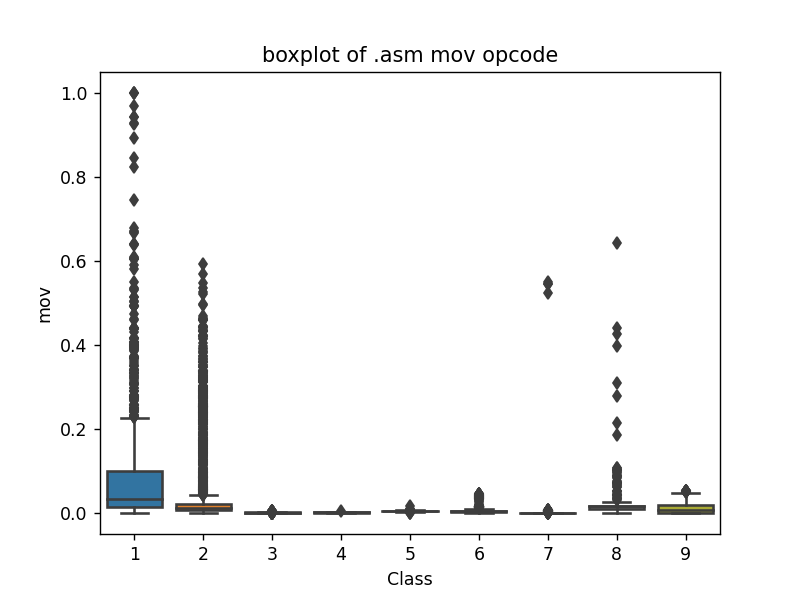

In [59]:
ax = sns.boxplot(x="Class", y="mov", data=result_asm)
plt.title("boxplot of .asm mov opcode")
plt.show()

<pre>
plot between Class label and mov opcode
Class 1 is having frequency of 2000 approx in 75 perentile of files
</pre>

<IPython.core.display.Javascript object>


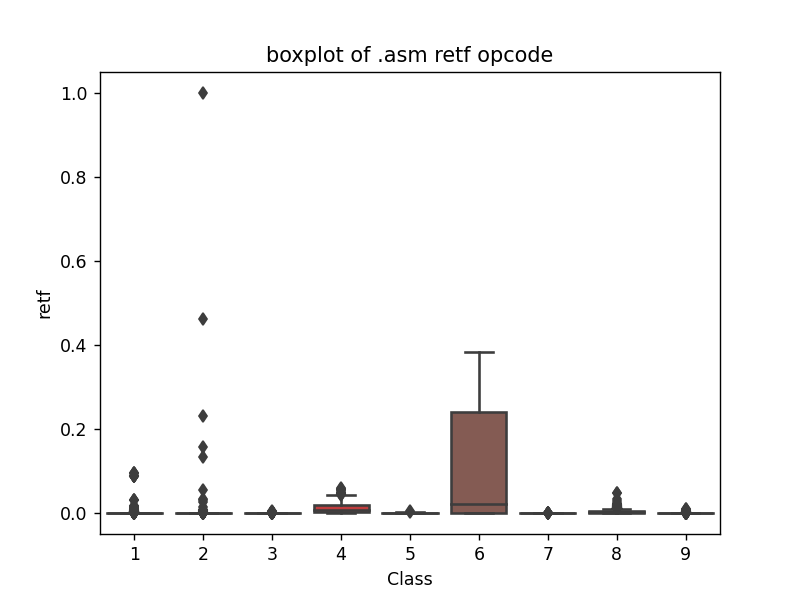

In [60]:
ax = sns.boxplot(x="Class", y="retf", data=result_asm)
plt.title("boxplot of .asm retf opcode")
plt.show()

<pre>
plot between Class label and retf
Class 6 can be easily separated with opcode retf
The frequency of retf is approx of 250.
</pre>

<IPython.core.display.Javascript object>


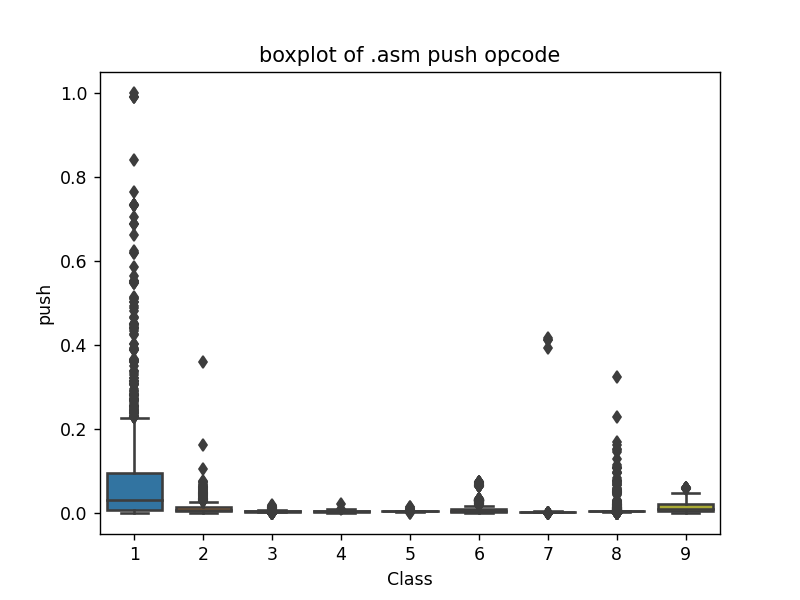

In [61]:
ax = sns.boxplot(x="Class", y="push", data=result_asm)
plt.title("boxplot of .asm push opcode")
plt.show()

<pre>
plot between push opcode and Class label
Class 1 is having 75 precentile files with push opcodes of frequency 1000
</pre>

<h3> 4.3.2 Multivariate Analysis on .asm file features </h3>

In [15]:
data_y = result_asm['Class']

<IPython.core.display.Javascript object>


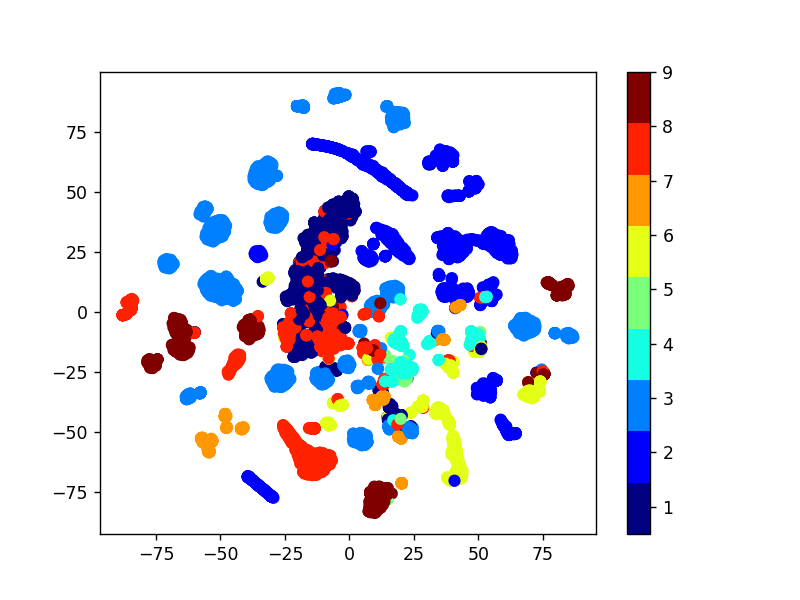

In [16]:
# check out the course content for more explantion on tsne algorithm
# https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/t-distributed-stochastic-neighbourhood-embeddingt-sne-part-1/

#multivariate analysis on byte files
#this is with perplexity 50
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_asm.drop(['ID','Class'], axis=1).fillna(0))
vis_x = results[:, 0]
vis_y = results[:, 1   ]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<IPython.core.display.Javascript object>


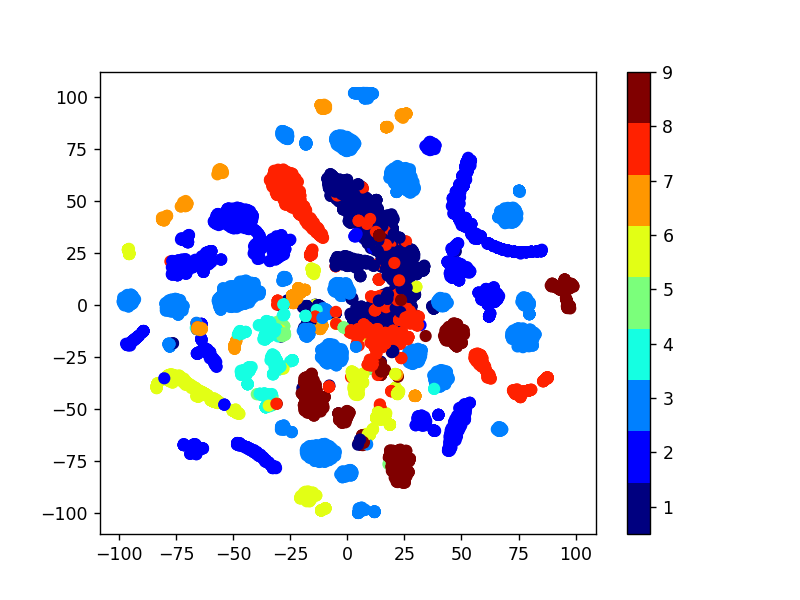

In [66]:
# by univariate analysis on the .asm file features we are getting very negligible information from 
# 'rtn', '.BSS:' '.CODE' features, so heare we are trying multivariate analysis after removing those features
# the plot looks very messy

xtsne=TSNE(perplexity=30)
results=xtsne.fit_transform(result_asm.drop(['ID','Class', 'rtn', '.BSS:', '.CODE','size_asm'], axis=1))
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=data_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(10))
plt.clim(0.5, 9)
plt.show()

<pre>
TSNE for asm data with perplexity 50
</pre>

In [68]:
result_asm.to_pickle('asm_unigrams_df')

<h3> 4.3.3 Conclusion on EDA</h3>

<p>
<li>We have taken only 52 features from asm files (after reading through many blogs and research papers) </li>
<li>The univariate analysis was done only on few important features.</li>
<li>Take-aways
<ul>
<li>1. Class 3 can be easily separated because of the frequency of segments,opcodes and keywords being less </li>
<li>2. Each feature has its unique importance in separating the Class labels.</li>
</ul>
</li>
</p>

<h2> 4.4 Train and test split</h2>

In [17]:
asm_y = result_asm['Class']
asm_x = result_asm.drop(['ID','Class','.BSS:','rtn','.CODE'], axis=1)

In [18]:
X_train_asm, X_test_asm, y_train_asm, y_test_asm = train_test_split(asm_x,asm_y ,stratify=asm_y,test_size=0.20)
X_train_asm, X_cv_asm, y_train_asm, y_cv_asm = train_test_split(X_train_asm, y_train_asm,stratify=y_train_asm,test_size=0.20)

In [19]:
print( X_cv_asm.isnull().all())

HEADER:     False
.text:      False
.Pav:       False
.idata:     False
.data:      False
.bss:       False
.rdata:     False
.edata:     False
.rsrc:      False
.tls:       False
.reloc:     False
jmp         False
mov         False
retf        False
push        False
pop         False
xor         False
retn        False
nop         False
sub         False
inc         False
dec         False
add         False
imul        False
xchg        False
or          False
shr         False
cmp         False
call        False
shl         False
ror         False
rol         False
jnb         False
jz          False
lea         False
movzx       False
.dll        False
std::       False
:dword      False
edx         False
esi         False
eax         False
ebx         False
ecx         False
edi         False
ebp         False
esp         False
eip         False
size_asm    False
dtype: bool


<h2> 4.5 Machine Learning models on features of .asm files</h2>

<h3> 4.5.1 K-Nearest Neigbors  - (Unigram of asm Files)</h3>

log_loss for k =  1 is 0.06462688502031491
log_loss for k =  3 is 0.06940020593265832
log_loss for k =  5 is 0.07912459725406995
log_loss for k =  7 is 0.08992174389072043
log_loss for k =  9 is 0.09695769950723669
log_loss for k =  11 is 0.10393129838517977
log_loss for k =  13 is 0.1109585584622613
log_loss for k =  15 is 0.1169523758784049
log_loss for k =  17 is 0.1241555796989923
log_loss for k =  19 is 0.13137290851270705


<IPython.core.display.Javascript object>


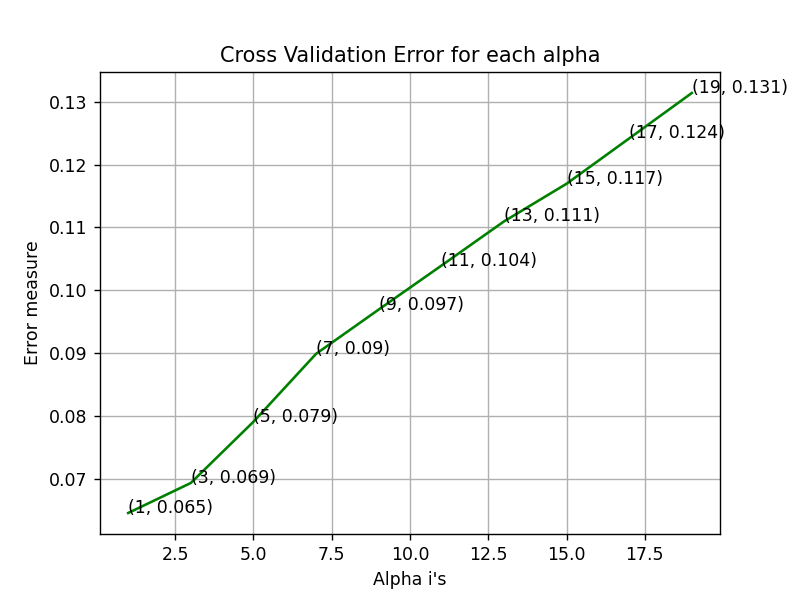

log loss for train data 0.025779571353477804
log loss for cv data 0.06462688502031491
log loss for test data 0.10387881159265869
Number of misclassified points  1.8859245630174795
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


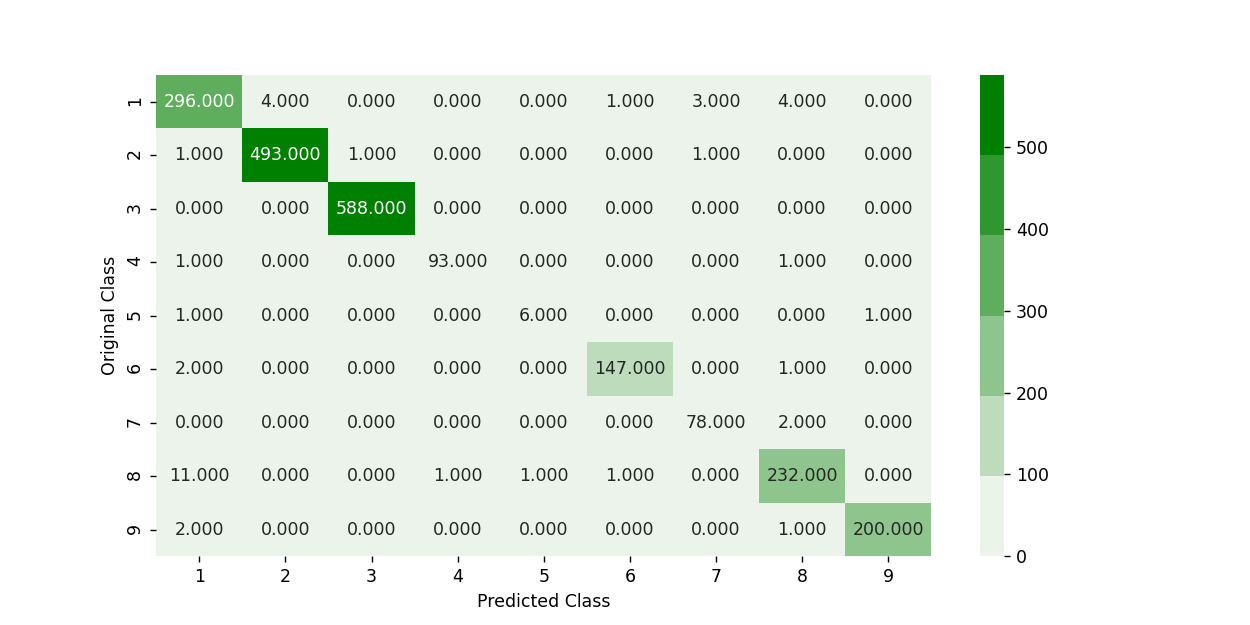

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


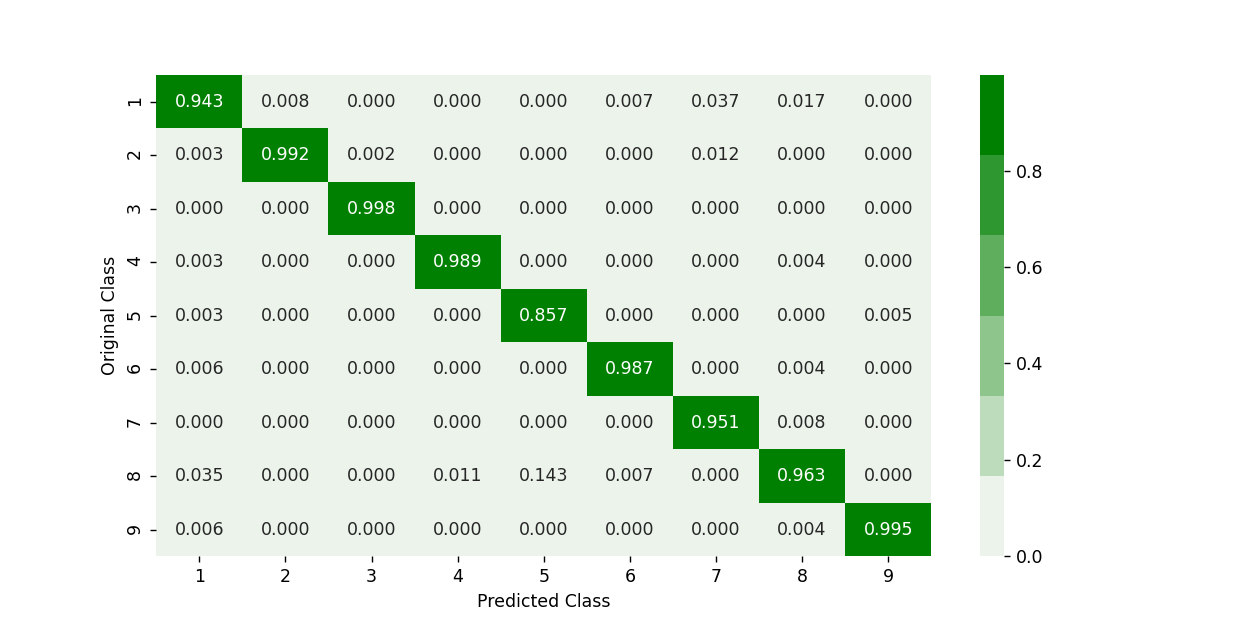

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


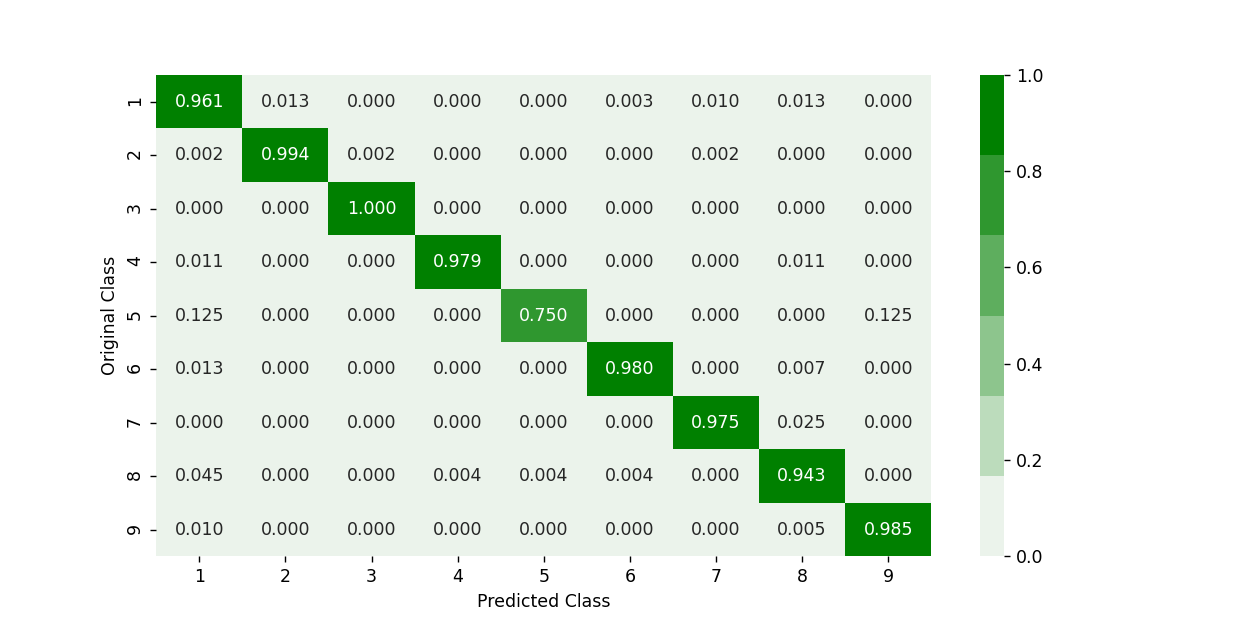

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [74]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------

alpha = [x for x in range(1, 21,2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
pred_y=sig_clf.predict(X_test_asm)


predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.5.2 Logistic Regression  - (Unigram of asm Files)</h3>

log_loss for c =  1e-05 is 1.5805598684420243
log_loss for c =  0.0001 is 1.5214273182381084
log_loss for c =  0.001 is 1.3022819341826952
log_loss for c =  0.01 is 1.3357379989369274
log_loss for c =  0.1 is 1.1409456442720436
log_loss for c =  1 is 0.7147510000349048
log_loss for c =  10 is 0.5044126188402832
log_loss for c =  100 is 0.397273496371831
log_loss for c =  1000 is 0.3245236835795592


<IPython.core.display.Javascript object>


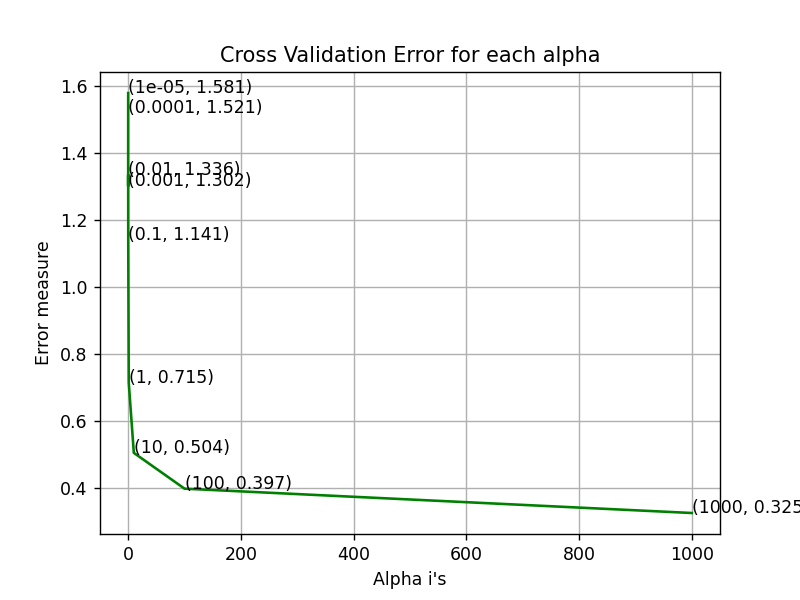

log loss for train data 0.3158510954103645
log loss for cv data 0.3245236835795592
log loss for test data 0.3277353713709539
Number of misclassified points  7.497700091996321
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


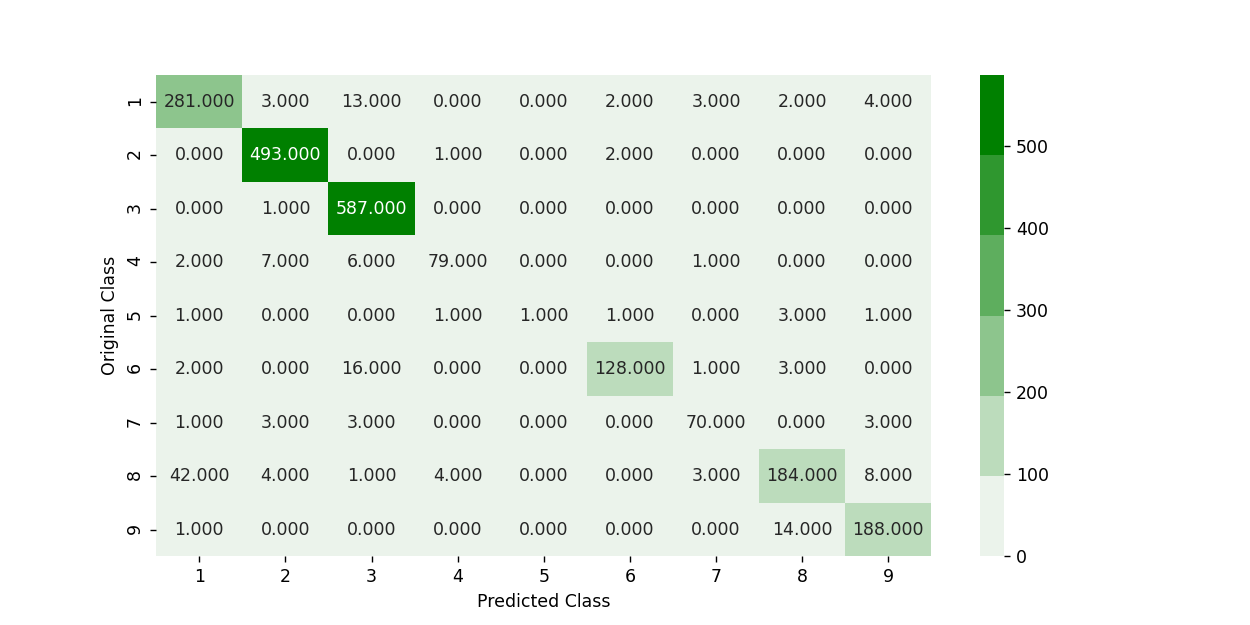

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


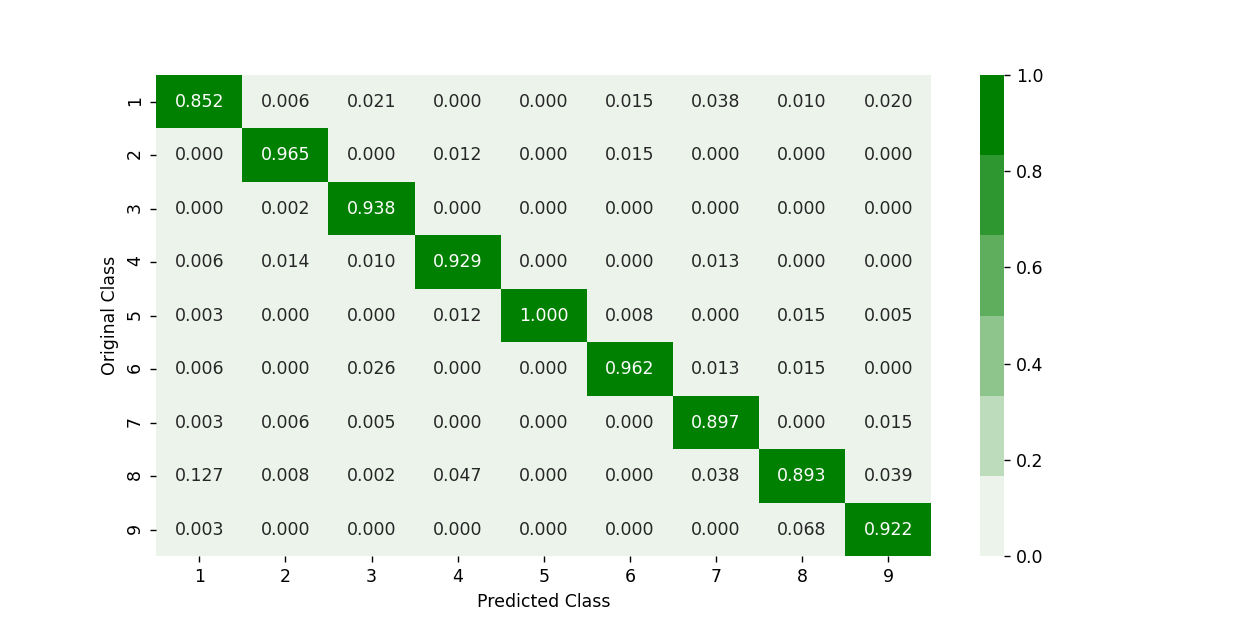

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


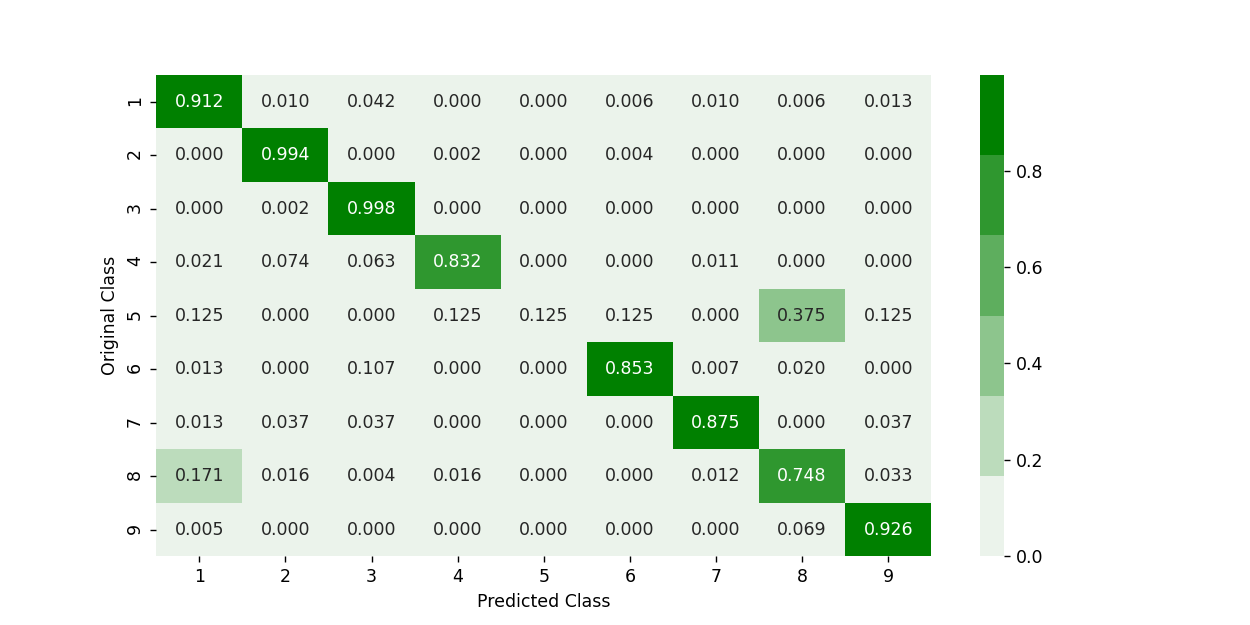

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [76]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------


alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced', solver='liblinear')
    logisticR.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced', solver='liblinear')
logisticR.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)

predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=logisticR.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.5.3 Random Forest Classifier - (Unigram of asm Files)</h3>

log_loss for c =  10 is 0.028191658233018252
log_loss for c =  50 is 0.02409399114873492
log_loss for c =  100 is 0.022768936170486052
log_loss for c =  500 is 0.022000319157498026
log_loss for c =  1000 is 0.021839760908555165
log_loss for c =  2000 is 0.021928664147576313
log_loss for c =  3000 is 0.021831037255290297


<IPython.core.display.Javascript object>


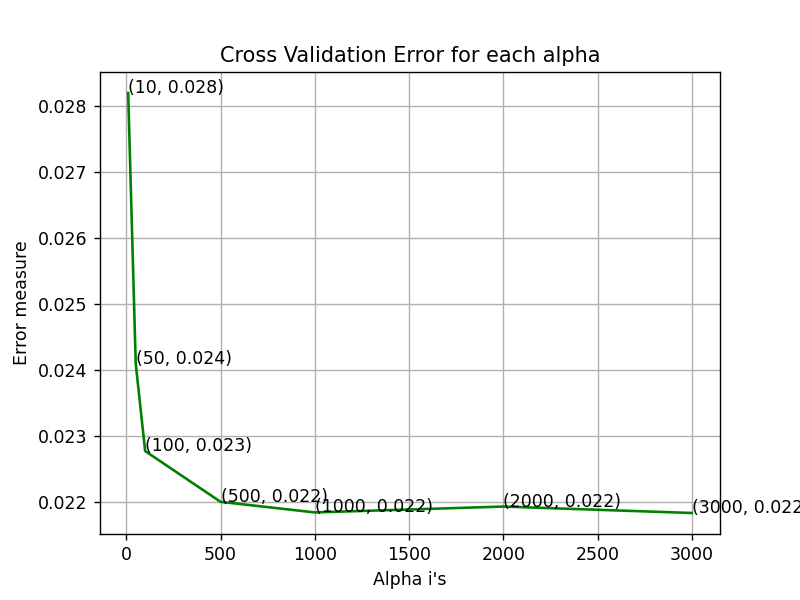

log loss for train data 0.015572506525247484
log loss for cv data 0.021831037255290297
log loss for test data 0.04206151683248411
Number of misclassified points  0.6899724011039559
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


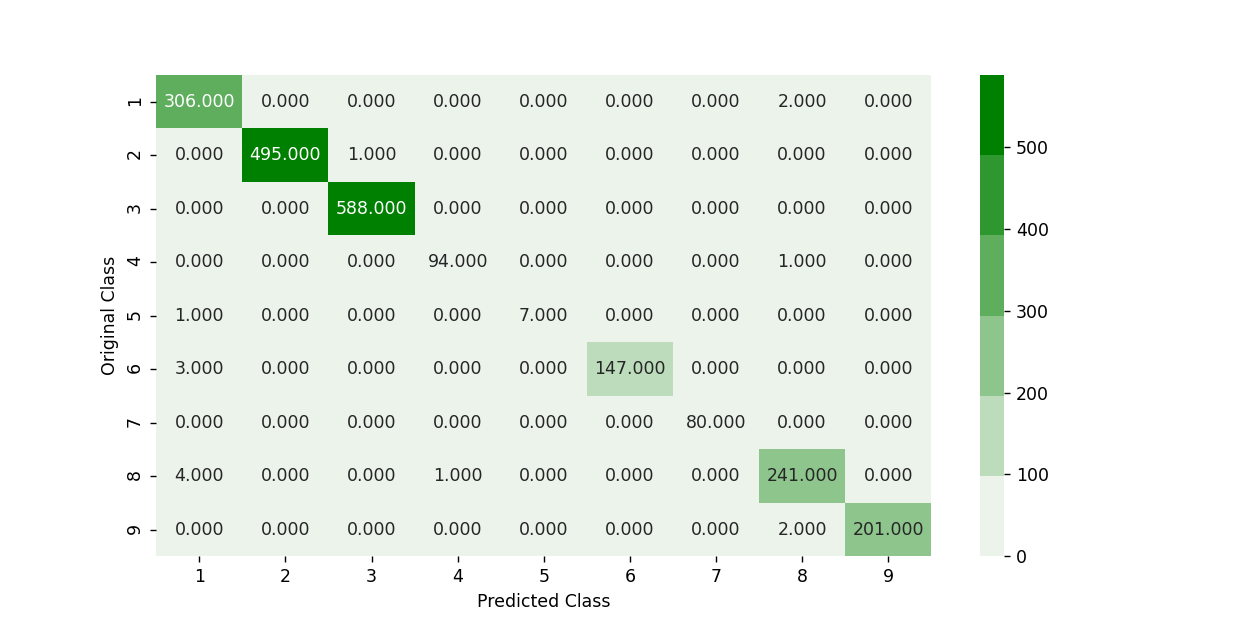

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


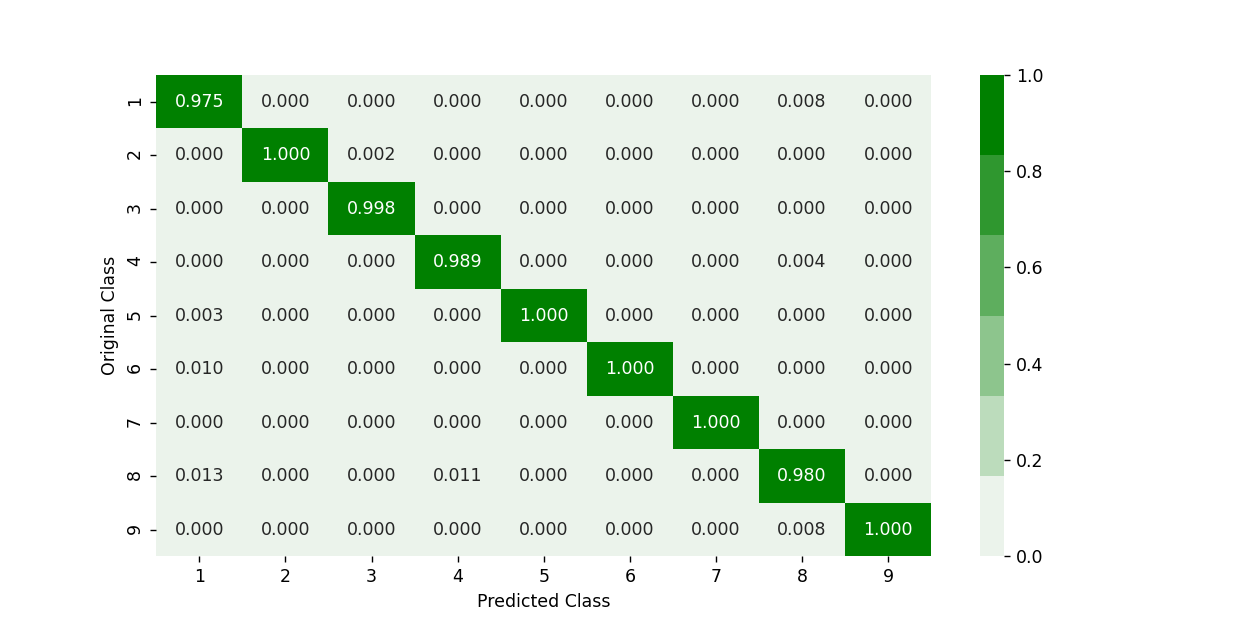

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


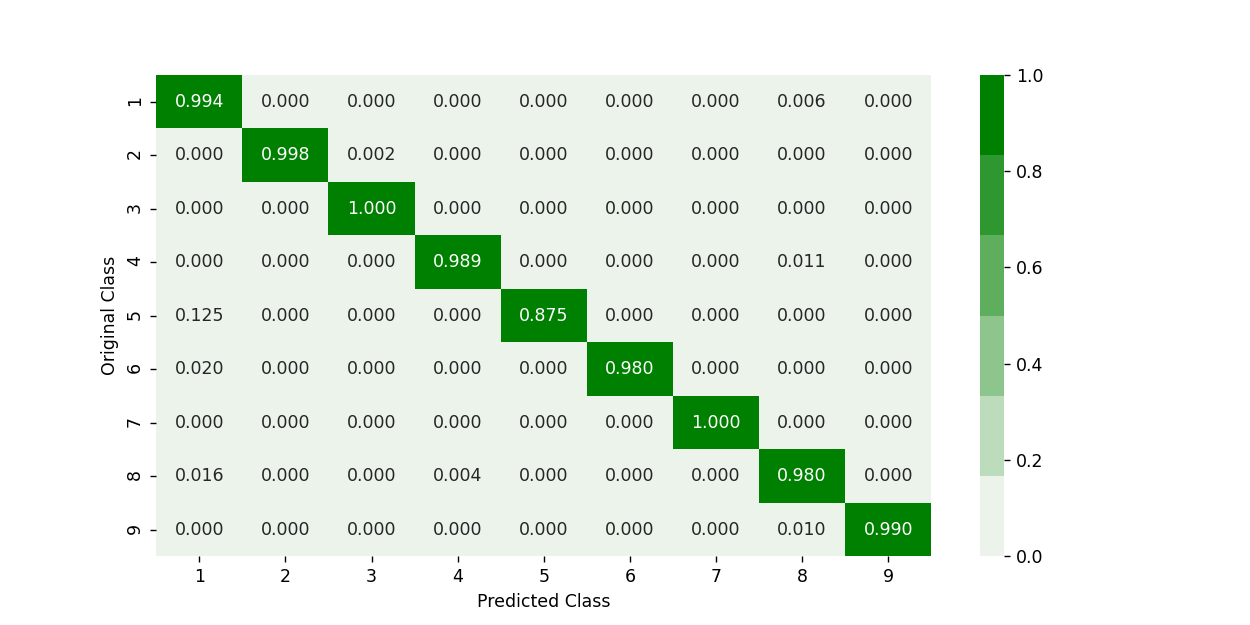

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [77]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
predict_y = sig_clf.predict_proba(X_train_asm)
print ('log loss for train data',(log_loss(y_train_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_cv_asm)
print ('log loss for cv data',(log_loss(y_cv_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
predict_y = sig_clf.predict_proba(X_test_asm)
print ('log loss for test data',(log_loss(y_test_asm, predict_y, labels=sig_clf.classes_, eps=1e-15)))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.5.4 XgBoost Classifier - (Unigrams of asm Files)</h3>

In [132]:
'''
In the byte files section- I used LightGBM as XGBoost was taking much time. 
While using Lightgbm in ASM section- I faced errors due to column headers are having '.' (appended to each column names).

Hence, I am using XGBoost Classifier here and I will use the same when I will merge both ASM and byte file features 

'''

log_loss for c =  10 is 0.030013141708386853
log_loss for c =  50 is 0.01843426557119691
log_loss for c =  100 is 0.018471184942406228
log_loss for c =  500 is 0.018362461361528866
log_loss for c =  1000 is 0.018259234432569105
log_loss for c =  2000 is 0.017936976143650904
log_loss for c =  3000 is 0.017788427857723662


<IPython.core.display.Javascript object>


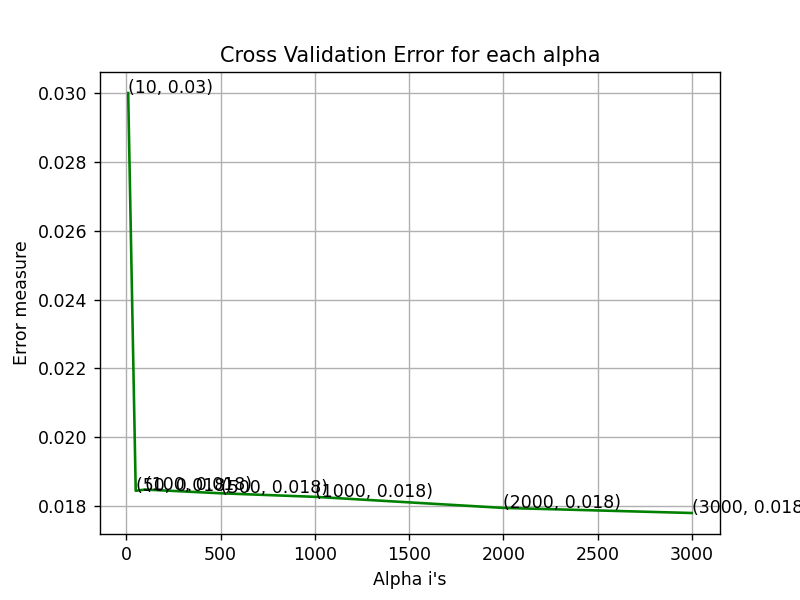

For values of best alpha =  3000 The train log loss is: 0.013473267405706337
For values of best alpha =  3000 The cross validation log loss is: 0.017788427857723662
For values of best alpha =  3000 The test log loss is: 0.039050352611246196
Number of misclassified points  0.5059797608095675
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


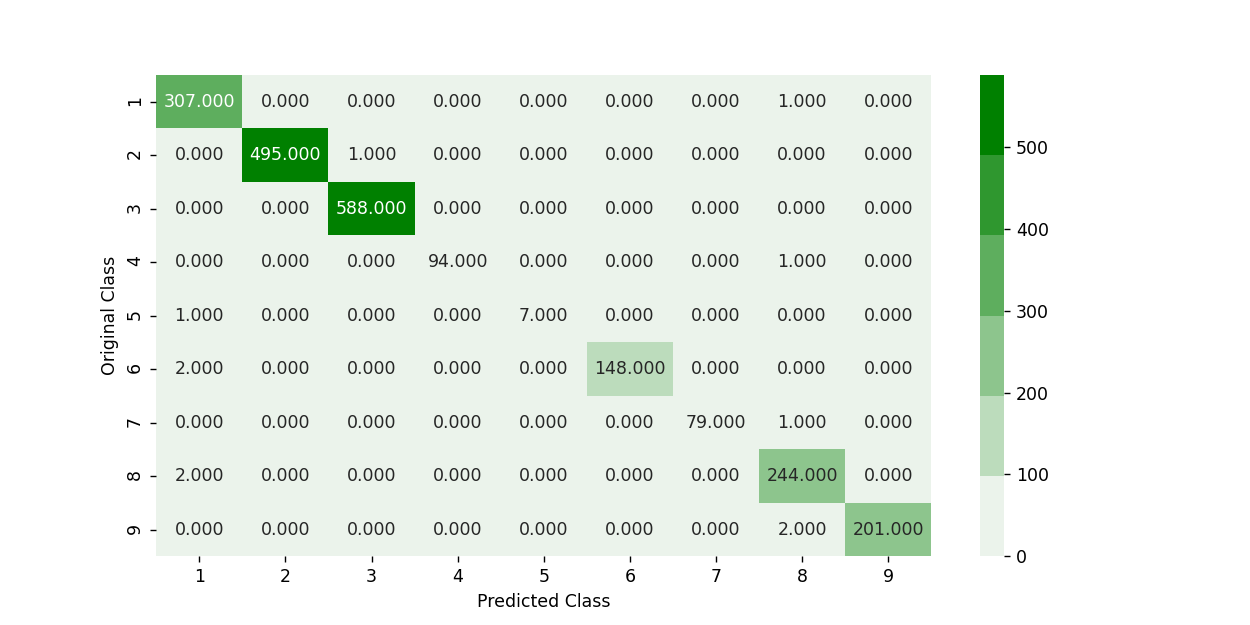

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


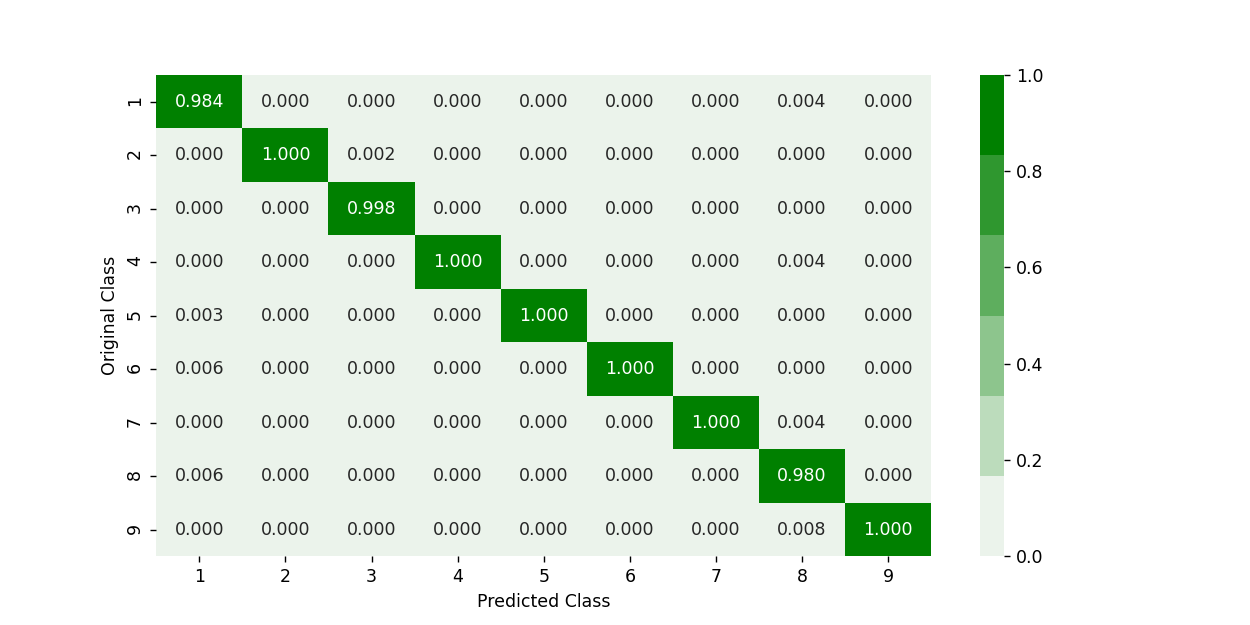

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


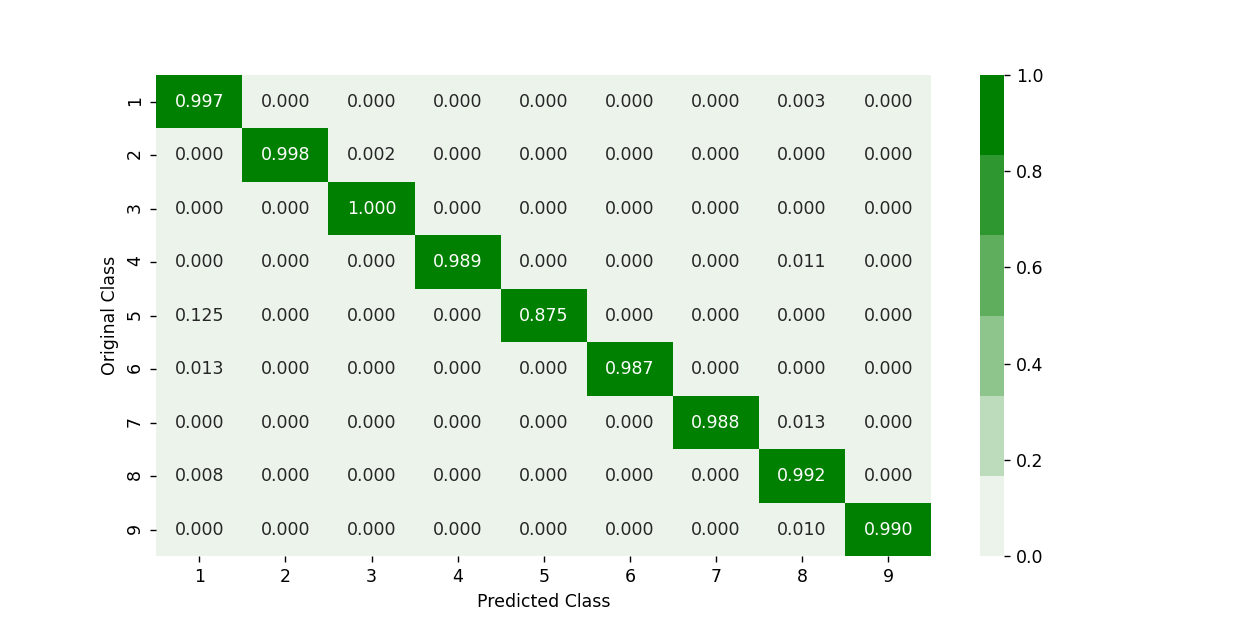

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [90]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,  eval_metric = 'logloss')
    x_cfl.fit(X_train_asm,y_train_asm)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_asm, y_train_asm)
    predict_y = sig_clf.predict_proba(X_cv_asm)
    cv_log_error_array.append(log_loss(y_cv_asm, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1,  eval_metric = 'logloss')
x_cfl.fit(X_train_asm,y_train_asm)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_asm, y_train_asm)
    
predict_y = sig_clf.predict_proba(X_train_asm)

print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_asm, predict_y))
predict_y = sig_clf.predict_proba(X_cv_asm)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_asm, predict_y))
predict_y = sig_clf.predict_proba(X_test_asm)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,sig_clf.predict(X_test_asm))

<h3> 4.5.5 Xgboost Classifier with best hyperparameters</h3>

In [20]:
x_cfl=XGBClassifier(eval_metric = 'logloss')

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=1, n_iter = 10, random_state = 42)
random_cfl.fit(X_train_asm,y_train_asm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.988, total=   8.9s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.989, total=   8.8s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   17.7s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.985, total=   8.9s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   26.6s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.991, total=   8.8s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   35.4s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.991, total=   9.7s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   45.1s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.985, total=   1.2s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   46.3s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.987, total=   1.2s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   47.5s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.983, total=   1.2s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   48.7s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.983, total=   1.2s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   49.9s remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.986, total=   1.2s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.997, total=  13.8s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.996, total=  13.7s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.991, total=  13.7s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.994, total=  13.5s
[CV] subsample=0.5, n_estimators=1000, 

[CV]  subsample=0.5, n_estimators=500, max_depth=5, learning_rate=0.2, colsample_bytree=0.1, score=0.992, total=   3.5s
[CV] subsample=0.5, n_estimators=500, max_depth=5, learning_rate=0.2, colsample_bytree=0.1 
[CV]  subsample=0.5, n_estimators=500, max_depth=5, learning_rate=0.2, colsample_bytree=0.1, score=0.992, total=   3.6s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  9.2min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [21]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


train loss 0.01292481384833615
cv loss 0.029068899865208563
test loss 0.02772475005692909
Number of misclassified points  0.36798528058877644
-------------------------------------------------- Confusion matrix --------------------------------------------------


<IPython.core.display.Javascript object>


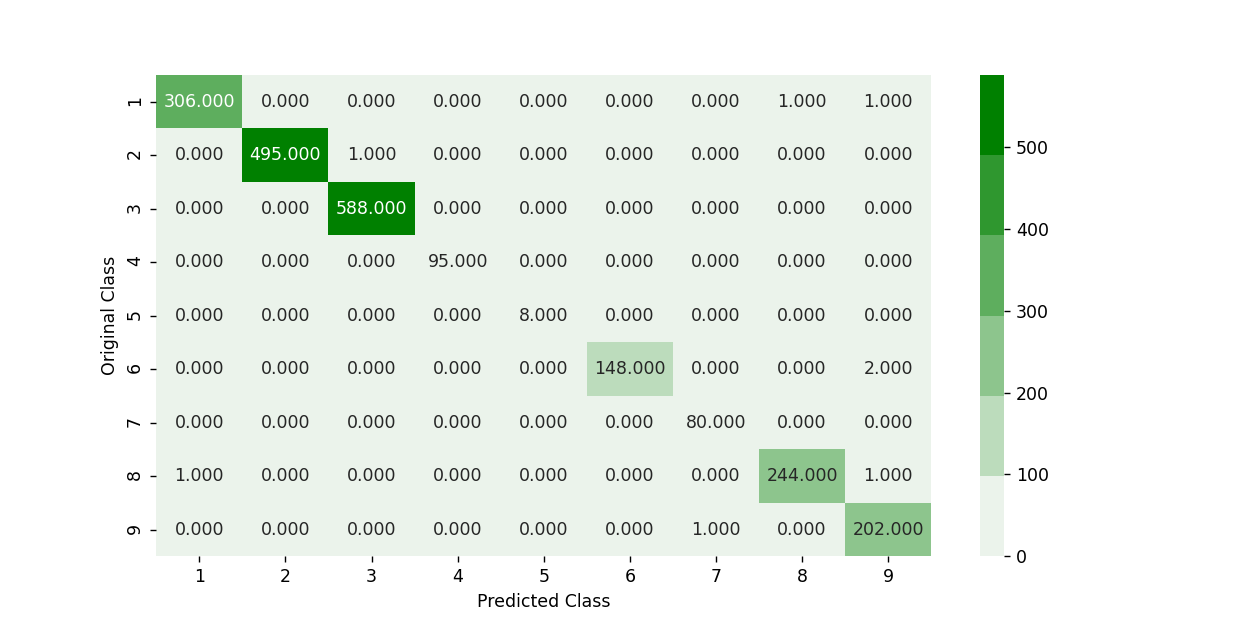

-------------------------------------------------- Precision matrix --------------------------------------------------


<IPython.core.display.Javascript object>


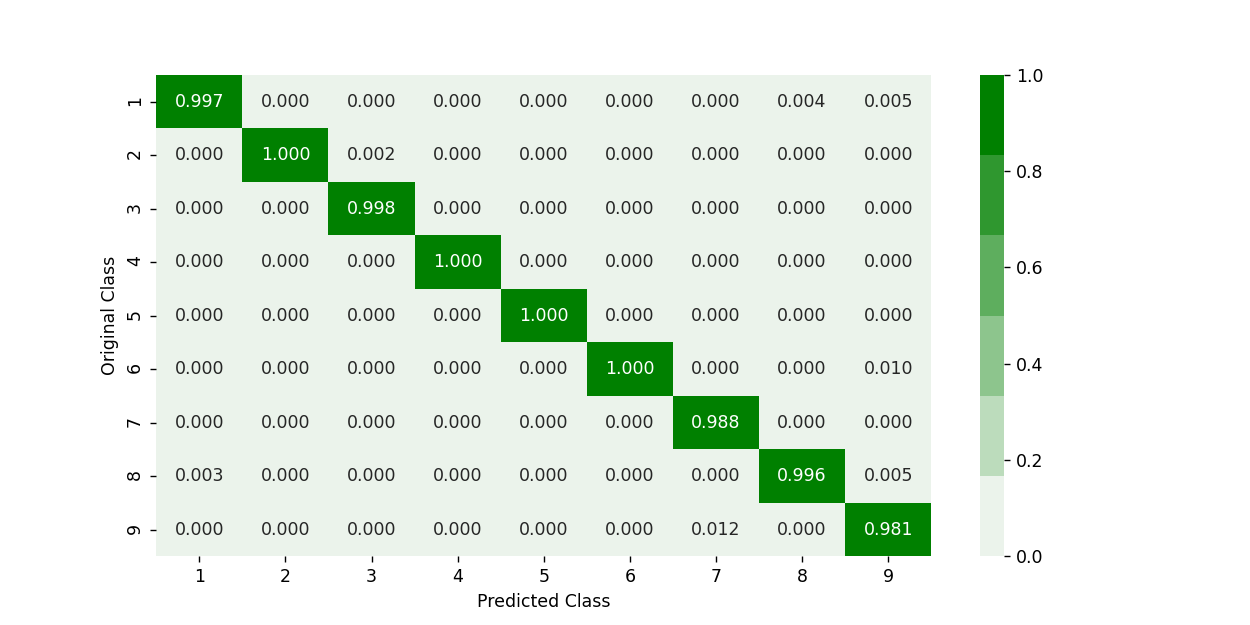

Sum of columns in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


<IPython.core.display.Javascript object>


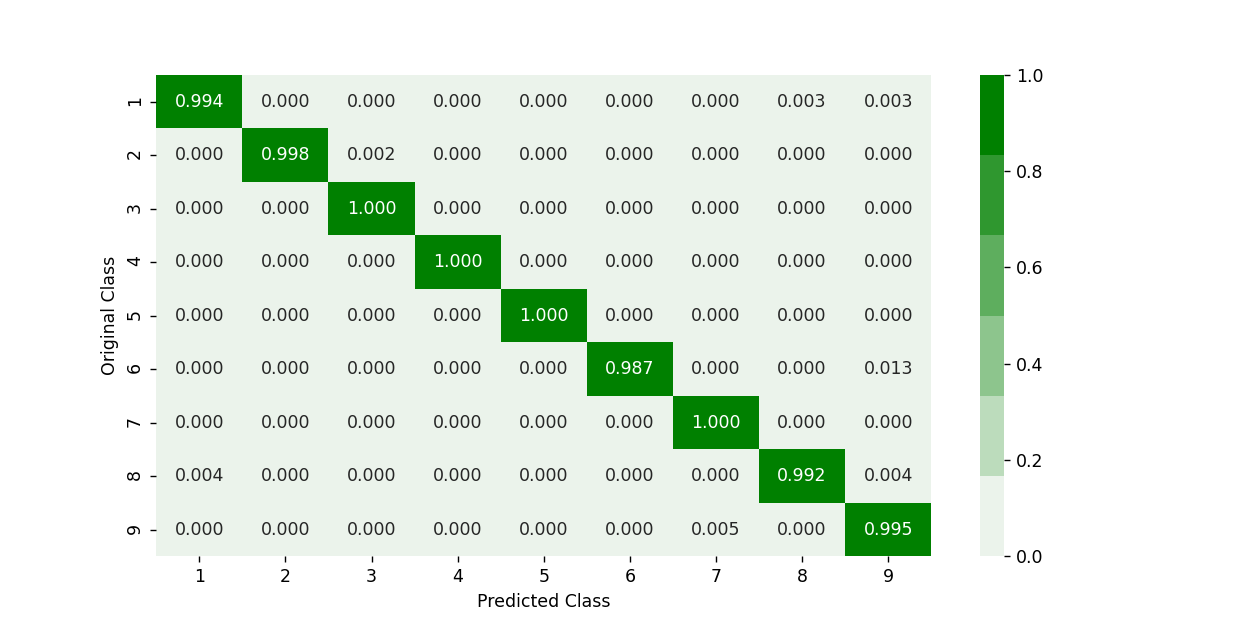

Sum of rows in precision matrix [1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [25]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,subsample=0.5,learning_rate=0.1,colsample_bytree=1,max_depth=5, eval_metric = 'logloss')
x_cfl.fit(X_train_asm,y_train_asm)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_asm,y_train_asm)

predict_y = c_cfl.predict_proba(X_train_asm)
print ('train loss',log_loss(y_train_asm, predict_y))
predict_y = c_cfl.predict_proba(X_cv_asm)
print ('cv loss',log_loss(y_cv_asm, predict_y))
predict_y = c_cfl.predict_proba(X_test_asm)
print ('test loss',log_loss(y_test_asm, predict_y))
plot_confusion_matrix(y_test_asm,c_cfl.predict(X_test_asm))

<h2> 4.6. Machine Learning models on features of both .asm and .bytes files</h2>

<h3> 4.6.1. Merging both asm and byte file features</h3>

In [26]:
result = pd.read_csv('result_with_size.csv')

In [27]:
result.head()

Unnamed: 0                    ID       0     1     2     3     4     5  \
0           0  01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242   
1           1  01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844   
2           2  01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330   
3           3  01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   
4           4  01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   

      6     7  ...    f9    fa    fb    fc    fd     fe     ff     ??  \
0  3650  3201  ...  3101  3211  3097  2758  3099   2759   5753   1824   
1  8420  7589  ...   439   281   302  7639   518  17001  54902   8588   
2  9007  2342  ...  2242  2885  2863  2471  2786   2680  49144    468   
3   550   523  ...   485   462   516  1133   471    761   7998  13940   
4   262   249  ...   350   209   239   653   221    242   2199   9008   

       size  Class  
0  5.012695      9  
1  6.556152      2  
2  4.602051      9  
3  0.679688      1  
4  0.438965      8  

[5 rows x 261 columns]

In [28]:
result = result.drop('Unnamed: 0', axis = 1)

In [29]:
# https://stackoverflow.com/a/29651514
def normalize_bytes(df):
    result1 = df.copy()
    for feature_name in df.columns:
        if (str(feature_name) != str('ID') and str(feature_name)!=str('Class')):
            max_value = df[feature_name].max()
            min_value = df[feature_name].min()
            result1[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result1
result = normalize_asm(result)

In [30]:
result.head()

ID         0         1         2         3         4  \
0  01azqd4InC7m9JpocGv5  0.262806  0.005498  0.001567  0.002067  0.002048   
1  01IsoiSMh5gxyDYTl4CB  0.017358  0.011737  0.004033  0.003876  0.005303   
2  01jsnpXSAlgw6aPeDxrU  0.040827  0.013434  0.001429  0.001315  0.005464   
3  01kcPWA9K2BOxQeS5Rju  0.009209  0.001708  0.000404  0.000441  0.000770   
4  01SuzwMJEIXsK7A8dQbl  0.008629  0.001000  0.000168  0.000234  0.000342   

          5         6         7         8  ...        f9        fa        fb  \
0  0.001835  0.002058  0.002946  0.002638  ...  0.013560  0.013107  0.013634   
1  0.003873  0.004747  0.006984  0.008267  ...  0.001920  0.001147  0.001329   
2  0.005280  0.005078  0.002155  0.008104  ...  0.009804  0.011777  0.012604   
3  0.000354  0.000310  0.000481  0.000959  ...  0.002121  0.001886  0.002272   
4  0.000232  0.000148  0.000229  0.000376  ...  0.001530  0.000853  0.001052   

         fc        fd        fe        ff        ??      size  Class  
0  0.031724  0.014549  0.014348  0.007843  0.000129  0.092219      9  
1  0.087867  0.002432  0.088411  0.074851  0.000606  0.121237      2  
2  0.028423  0.013080  0.013937  0.067001  0.000033  0.084499      9  
3  0.013032  0.002211  0.003957  0.010904  0.000984  0.010759      1  
4  0.007511  0.001038  0.001258  0.002998  0.000636  0.006233      8  

[5 rows x 260 columns]

In [31]:
result.to_pickle('result_bytes_unigrams.pkl')

In [32]:
result_asm.head()

ID   HEADER:    .text:  .Pav:   .idata:    .data:  .bss:  \
0  01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023    0.0   
1  1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019    0.0   
2  3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017    0.0   
3  3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008    0.0   
4  46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068    0.0   

    .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx       ecx  \
0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360  0.001057   
1  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686  0.000153   
2  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560  0.000178   
3  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059  0.000025   
4  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243  0.000064   

   edi       ebp       esp       eip  Class  size_asm  
0  0.0  0.030797  0.001468  0.003173      1  0.000432  
1  0.0  0.025362  0.000000  0.002188      1  0.000327  
2  0.0  0.019928  0.000000  0.000985      1  0.000172  
3  0.0  0.014493  0.000000  0.000657      1  0.000009  
4  0.0  0.019928  0.000000  0.001204      1  0.000143  

[5 rows x 54 columns]

In [33]:
print(result.shape)
print(result_asm.shape)

(10868, 260)
(10868, 54)


In [34]:
result_x = pd.merge(result,result_asm.drop(['Class'], axis=1),on='ID', how='left')
result_y = result_x['Class']
result_x = result_x.drop(['ID','rtn','.BSS:','.CODE','Class'], axis=1)
result_x.head()

0         1         2         3         4         5         6  \
0  0.262806  0.005498  0.001567  0.002067  0.002048  0.001835  0.002058   
1  0.017358  0.011737  0.004033  0.003876  0.005303  0.003873  0.004747   
2  0.040827  0.013434  0.001429  0.001315  0.005464  0.005280  0.005078   
3  0.009209  0.001708  0.000404  0.000441  0.000770  0.000354  0.000310   
4  0.008629  0.001000  0.000168  0.000234  0.000342  0.000232  0.000148   

          7         8         9  ...       edx       esi       eax       ebx  \
0  0.002946  0.002638  0.003531  ...  0.015418  0.025875  0.025744  0.004910   
1  0.006984  0.008267  0.000394  ...  0.004961  0.012316  0.007858  0.007570   
2  0.002155  0.008104  0.002707  ...  0.000095  0.006181  0.000100  0.003773   
3  0.000481  0.000959  0.000521  ...  0.000343  0.000746  0.000301  0.000360   
4  0.000229  0.000376  0.000246  ...  0.000343  0.013875  0.000482  0.012932   

        ecx  edi       ebp       esp       eip  size_asm  
0  0.008930  0.0  0.027174  0.000428  0.049896  0.400910  
1  0.005350  0.0  0.043478  0.000673  0.024839  0.099719  
2  0.000713  0.0  0.048913  0.000000  0.012802  0.060553  
3  0.001057  0.0  0.030797  0.001468  0.003173  0.000432  
4  0.001363  0.0  0.027174  0.000000  0.008316  0.006983  

[5 rows x 307 columns]

<h3> 4.6.2. Multivariate Analysis on final fearures</h3>

<IPython.core.display.Javascript object>


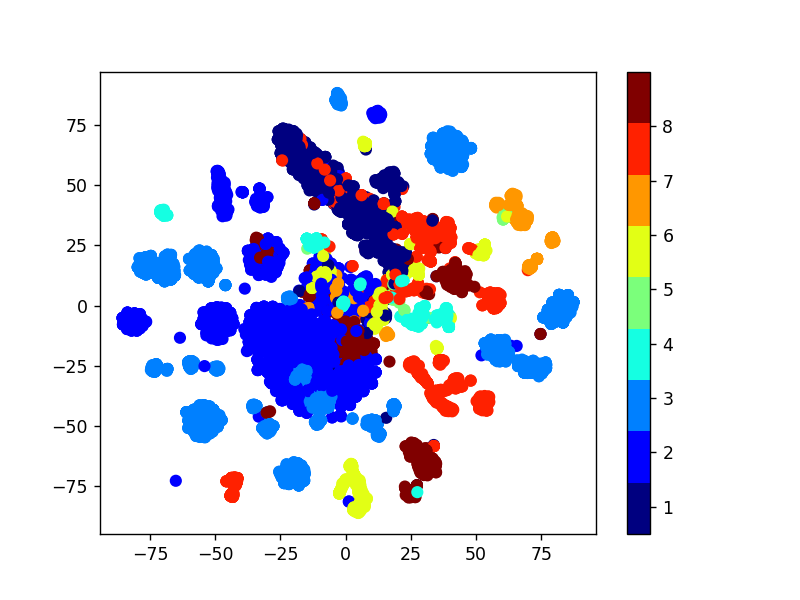

In [35]:
xtsne=TSNE(perplexity=50)
results=xtsne.fit_transform(result_x)
vis_x = results[:, 0]
vis_y = results[:, 1]
plt.scatter(vis_x, vis_y, c=result_y, cmap=plt.cm.get_cmap("jet", 9))
plt.colorbar(ticks=range(9))
plt.clim(0.5, 9)
plt.show()

<h3> 4.6.3. Train and Test split</h3>

In [36]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(result_x, result_y,stratify=result_y,test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

<h3> 4.6.4. Random Forest Classifier (on Byte Unigrams + ASM Unigrams)</h3>

log_loss for c =  10 is 0.059718494551038934
log_loss for c =  50 is 0.05336854279076858
log_loss for c =  100 is 0.05180563522750847
log_loss for c =  500 is 0.051393640531874556
log_loss for c =  1000 is 0.05117004683340274
log_loss for c =  2000 is 0.051211757385691885
log_loss for c =  3000 is 0.05118873156622769


<IPython.core.display.Javascript object>


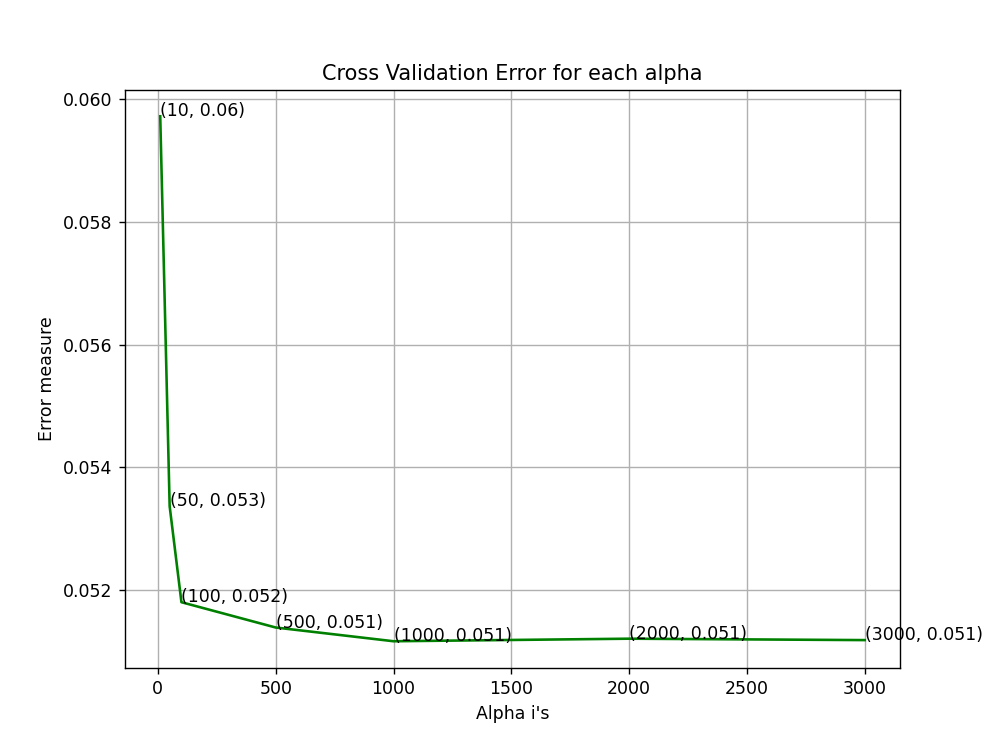

For values of best alpha =  1000 The train log loss is: 0.016245599099254653
For values of best alpha =  1000 The cross validation log loss is: 0.05117004683340274
For values of best alpha =  1000 The test log loss is: 0.03932154737097179


In [117]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

<h3> 4.6.5. XgBoost Classifier  (on Byte Unigrams + ASM Unigrams)</h3>

log_loss for c =  10 is 0.05261064828652093
log_loss for c =  50 is 0.04229538490469049
log_loss for c =  100 is 0.04249395984752525
log_loss for c =  500 is 0.04220116520877978
log_loss for c =  1000 is 0.04222329331857377
log_loss for c =  2000 is 0.042222799093224614
log_loss for c =  3000 is 0.042222326218551175


<IPython.core.display.Javascript object>


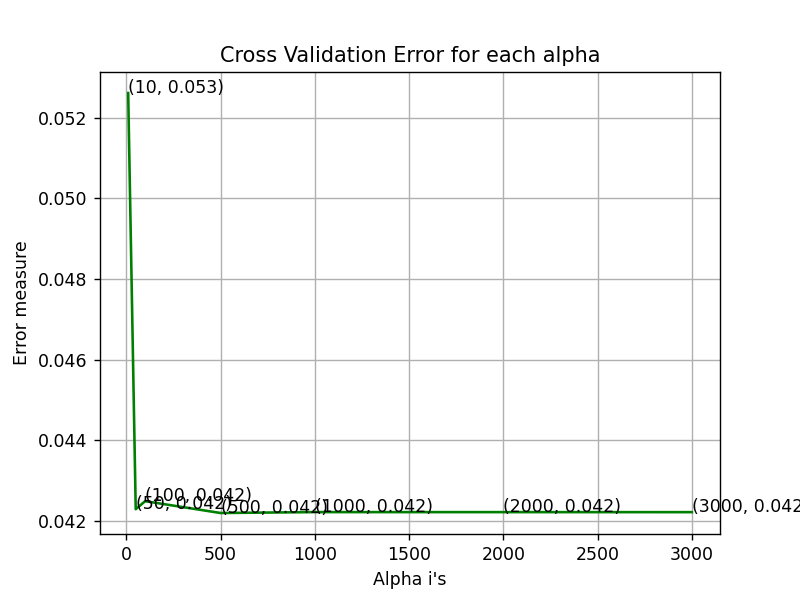

For values of best alpha =  500 The train log loss is: 0.01301747871934609
For values of best alpha =  500 The cross validation log loss is: 0.042222326218551175
For values of best alpha =  500 The test log loss is: 0.02871708368965056


In [121]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i, eval_metric = 'logloss')
    x_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge, y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1, eval_metric = 'logloss')
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))


<h3> 4.6.5. XgBoost Classifier  (on Byte Unigrams + ASM Unigrams) with best hyper parameters using Random search</h3>

In [37]:
x_cfl=XGBClassifier(eval_metric = 'logloss')

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=1, n_iter = 6, random_state = 42)
random_cfl.fit(X_train_merge, y_train_merge)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.987, total=  57.5s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   57.5s remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.989, total=  57.7s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.988, total=  56.8s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  2.9min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.994, total=  59.2s
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  3.9min remaining:    0.0s


[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.992, total=  57.5s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.8min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.983, total=   3.9s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  4.9min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.990, total=   3.9s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.9min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.986, total=   3.9s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.0min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.987, total=   3.9s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.1min remaining:    0.0s


[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.990, total=   3.9s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.994, total= 1.0min
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.994, total= 1.0min
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.994, total=  59.8s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.996, total= 1.0min
[CV] subsample=0.5, n_estimators=1000, 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 37.2min finished


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           eval_metric='logloss', gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=Non

In [38]:
print (random_cfl.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [45]:

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=1000,max_depth=5,learning_rate=0.1,colsample_bytree=1,subsample=0.5,nthread=-1, eval_metric = 'logloss')
x_cfl.fit(X_train_merge,y_train_merge,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)
    

predict_y = sig_clf.predict_proba(X_train_merge)
print ("The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print ("The cv log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print ("The test log loss is:",log_loss(y_test_merge, predict_y))


The train log loss is: 0.0126683779537371
The cv log loss is: 0.03600888469399762
The test log loss is: 0.03333796289824254


### 5.1 Creating ASM Image Features

In [4]:
root_path = str(os.getcwd())+'/'

In [5]:
root_path

'/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/'

In [11]:
def extract_images_from_text(arr_of_filenames, folder_to_save_generated_images):  
    for file_name in tqdm(arr_of_filenames):
        
        if(file_name.endswith("asm")):
            this_file = codecs.open(root_path + "asmFiles/" + file_name, 'rb')
            size_of_current_asm_file = os.path.getsize(root_path + "asmFiles/"+file_name)        
        
        width_of_file = int(size_of_current_asm_file**0.5)
        
        remainder = size_of_current_asm_file % width_of_file
        
        # To create array of single bytes, passing type code 'B'
        # "B" is for unsigned characters
        array_of_image = array.array('B')
        
        array_of_image.fromfile(this_file, size_of_current_asm_file-remainder)
        
        this_file.close()
        
        arr_of_generated_image = np.reshape(array_of_image[:width_of_file * width_of_file], (width_of_file, width_of_file))
        
        arr_of_generated_image = np.uint8(arr_of_generated_image)
        
        imageio.imwrite(folder_to_save_generated_images+'/' + file_name.split(".")[0] + '.png', arr_of_generated_image)
        
        
# Now invoke the above function

directory_to_save_generated_image = root_path + 'image_asm_files'

extract_images_from_text(asmfile_list, directory_to_save_generated_image)

  0%|          | 0/10868 [00:00<?, ?it/s]

In [15]:
file_list_asm_files=os.listdir('image_asm_files')

with open(root_path + "asm_image_top_800_df.csv", mode='w') as top_800_image_asm_df:
    #file_list_asm_files = 10868, top_800_image_asm_df=800
    top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(800)])))
    #top_800_image_asm_df.write(','.join(map(str, ["ID"]+["pixel_asm{}".format(i) for i in range(10)])))
    top_800_image_asm_df.write('\n')
    
    for image in tqdm(file_list_asm_files):
        file_id_asm_files=image.split(".")[0]
        
         # Create a 2 Matrix to contain the image matrix in 2D format
        asm_image_array=imageio.imread(root_path + "image_asm_files/"+image)
        
        # Extracting from flattened array the first 800 pixels 
        asm_image_array=asm_image_array.flatten()[:800]
#         asm_image_array=asm_image_array.flatten()[:10]
        top_800_image_asm_df.write(','.join(map(str, [file_id_asm_files]+list(asm_image_array))))
        top_800_image_asm_df.write('\n')

  0%|          | 0/10868 [00:00<?, ?it/s]

In [406]:
root_path = str(os.getcwd())
image_directory = root_path +'/'+'image_asm_files/'

In [407]:
image_directory

'/home/sibanisankar_p2015_gmail_com/Microsoft_Malware_Detection/image_asm_files/'

In [11]:
asm_image_top_800_df_sorted = pd.read_csv('asm_image_top_800_df.csv').sort_values(by=['ID'])

In [12]:
class_y = pd.read_csv('trainLabels.csv')

In [13]:
class_y

Id  Class
0      01kcPWA9K2BOxQeS5Rju      1
1      04EjIdbPV5e1XroFOpiN      1
2      05EeG39MTRrI6VY21DPd      1
3      05rJTUWYAKNegBk2wE8X      1
4      0AnoOZDNbPXIr2MRBSCJ      1
...                     ...    ...
10863  KFrZ0Lop1WDGwUtkusCi      9
10864  kg24YRJTB8DNdKMXpwOH      9
10865  kG29BLiFYPgWtpb350sO      9
10866  kGITL4OJxYMWEQ1bKBiP      9
10867  KGorN9J6XAC4bOEkmyup      9

[10868 rows x 2 columns]

In [14]:
class_y.columns = ['ID', 'Class']

In [15]:
class_y = class_y.sort_values(by = ['ID'])

In [16]:
class_y

ID  Class
1541  01IsoiSMh5gxyDYTl4CB      2
8627  01SuzwMJEIXsK7A8dQbl      8
9855  01azqd4InC7m9JpocGv5      9
9856  01jsnpXSAlgw6aPeDxrU      9
0     01kcPWA9K2BOxQeS5Rju      1
...                    ...    ...
7413  ldNfaCpceLnGUE0rPzqF      4
7425  ljFT1KeZmEiHxhuRbrcd      4
7426  ljuryB4bfagHqV5FM9Ae      4
7428  lkqEXK4NrYSseRTt0Gb3      4
7431  loIP1tiwELF9YNZQjSUO      4

[10868 rows x 2 columns]

In [55]:
asm_image_top_800_df_sorted

ID  pixel_asm0  pixel_asm1  pixel_asm2  pixel_asm3  \
853   01IsoiSMh5gxyDYTl4CB          46         116         101         120   
5278  01SuzwMJEIXsK7A8dQbl          72          69          65          68   
182   01azqd4InC7m9JpocGv5          72          69          65          68   
6120  01jsnpXSAlgw6aPeDxrU          72          69          65          68   
8239  01kcPWA9K2BOxQeS5Rju          72          69          65          68   
...                    ...         ...         ...         ...         ...   
158   ldNfaCpceLnGUE0rPzqF          72          69          65          68   
1086  ljFT1KeZmEiHxhuRbrcd          72          69          65          68   
6761  ljuryB4bfagHqV5FM9Ae          72          69          65          68   
5092  lkqEXK4NrYSseRTt0Gb3          72          69          65          68   
1152  loIP1tiwELF9YNZQjSUO          72          69          65          68   

      pixel_asm4  pixel_asm5  pixel_asm6  pixel_asm7  pixel_asm8  ...  \
853          116          58          48          48          52  ...   
5278          69          82          58          48          48  ...   
182           69          82          58          48          48  ...   
6120          69          82          58          48          48  ...   
8239          69          82          58          49          48  ...   
...          ...         ...         ...         ...         ...  ...   
158           69          82          58          49          48  ...   
1086          69          82          58          49          48  ...   
6761          69          82          58          49          48  ...   
5092          69          82          58          49          48  ...   
1152          69          82          58          49          48  ...   

      pixel_asm790  pixel_asm791  pixel_asm792  pixel_asm793  pixel_asm794  \
853             56            54            32            40            80   
5278            61            61            61            61            61   
182             61            61            61            61            61   
6120            61            61            61            61            61   
8239           109           111           100           101           108   
...            ...           ...           ...           ...           ...   
158             61            61            61            61            61   
1086            61            61            61            61            61   
6761            61            61            61            61            61   
5092            61            61            61            61            61   
1152            61            61            61            61            61   

      pixel_asm795  pixel_asm796  pixel_asm797  pixel_asm798  pixel_asm799  
853             69            41            13            10            46  
5278            61            61            61            61            61  
182             61            61            61            61            61  
6120            61            61            61            61            61  
8239            32           102           108            97           116  
...            ...           ...           ...           ...           ...  
158             61            61            61            61            61  
1086            61            61            61            61            61  
6761            61            61            61            61            61  
5092            61            61            61            61            61  
1152            61            61            61            61            61  

[10868 rows x 801 columns]

In [44]:
asm_image_top_800_df_sorted.to_csv('asm_image_top_800_df_sorted.csv')

In [10]:
asm_image_top_800_df_sorted = pd.read_csv('asm_image_top_800_df_sorted.csv')

In [ ]:
class_y.to_csv('class_y.csv')

In [78]:
class_y = pd.read_csv('class_y.csv')

### 5.2 Selecting top 2000 byte bigrams features among 66308 using Chi-Square Test

In [33]:
from scipy import sparse

sparse_file = sparse.load_npz('sparse_bytefile_bigrams.npz')

In [14]:
byteclass_file_1 = np.load('dict_fileclasses_1943.npy', allow_pickle = True) 
dict_file_1 = dict(byteclass_file_1.item())
array_file_1 = np.array(list(dict_file_1.items()))
class_labels_1 = pd.DataFrame(array_file_1)
class_labels_1.columns = ['ID', 'Class']

byteclass_file_2 = np.load('dict_fileclasses_1944.npy', allow_pickle = True)
dict_file_2 = dict(byteclass_file_2.item())
array_file_2 = np.array(list(dict_file_2.items()))
class_labels_2 = pd.DataFrame(array_file_2)
class_labels_2.columns = ['ID', 'Class']

byteclass_file_3 = np.load('dict_fileclasses_1945.npy', allow_pickle = True)
dict_file_3 = dict(byteclass_file_3.item())
array_file_3 = np.array(list(dict_file_3.items()))
class_labels_3 = pd.DataFrame(array_file_3)
class_labels_3.columns = ['ID', 'Class']

byteclass_file_4 = np.load('dict_fileclasses_1946.npy', allow_pickle = True) 
dict_file_4 = dict(byteclass_file_4.item())
array_file_4 = np.array(list(dict_file_4.items()))
class_labels_4 = pd.DataFrame(array_file_4)
class_labels_4.columns = ['ID', 'Class']

In [15]:
id_classes = pd.concat([class_labels_1, class_labels_2,class_labels_3, class_labels_4], axis = 0)

In [16]:
id_classes

ID Class
0     blv3hf75R6kcUoQtIC1Y     2
1     DcIoXf51F3Jk7TNsjbqz     3
2     31KjQiNWATfPaozHtYOl     1
3     426c9FYfeVQbJnygpdKH     8
4     4jAPkMmCzW9r8QK6SVnB     3
...                    ...   ...
2712  jmw9eDNhFgEXaOubnpxC     1
2713  ECiA7GPQj6MNZtSJvRqL     8
2714  4Rbo7BA6vqyfMcIJhdzk     3
2715  dtcBSuoU8MZ0wilHFe7n     3
2716  gPA06qVDSM1XILOKoG8R     3

[10868 rows x 2 columns]

In [17]:
sparse_file_df = pd.DataFrame.sparse.from_spmatrix(sparse_file, columns = features).drop('ID', axis = 1)

In [23]:
sparse_file_df

0d 2b  7a b6  71 b6  00 ad  35 30  ?? fe  49 88  38 21  fb e7  03 47  \
0        0.0    0.0    0.0    1.0    0.0    6.0   25.0    0.0    1.0    0.0   
1       13.0   19.0    6.0   20.0   15.0   10.0   32.0   11.0   16.0   10.0   
2        0.0    3.0    2.0    1.0   20.0    1.0    0.0    4.0    4.0    1.0   
3        1.0    1.0    3.0    1.0    9.0    0.0    0.0    1.0    2.0    2.0   
4        8.0    9.0   16.0   12.0   13.0   21.0   17.0   17.0    9.0   13.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10863    2.0    2.0    1.0    3.0    8.0    0.0    2.0    7.0    3.0    0.0   
10864    2.0    0.0    1.0    1.0    0.0    2.0    1.0    0.0    1.0    2.0   
10865    9.0   16.0   10.0   14.0    8.0   15.0   20.0   12.0   21.0   12.0   
10866   18.0   24.0   26.0   26.0   36.0   22.0   40.0   14.0   24.0   14.0   
10867   16.0    8.0   10.0   12.0    6.0   10.0   16.0   10.0   12.0   14.0   

       ...  6f cd  41 d8  f7 e6  86 f7  94 14  4a 44  d1 28  83 da  64 38  \
0      ...    0.0    6.0    0.0    0.0    0.0    1.0    0.0    0.0  378.0   
1      ...    9.0   11.0   10.0    8.0   16.0   15.0   12.0   13.0   17.0   
2      ...    2.0    3.0    5.0    3.0    0.0    2.0    4.0   14.0    6.0   
3      ...    2.0    3.0    0.0    3.0    0.0    2.0    1.0    1.0    3.0   
4      ...   13.0   13.0   13.0   16.0   10.0   11.0   14.0   12.0   12.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10863  ...    1.0    1.0    3.0    2.0    0.0    0.0    2.0    6.0    2.0   
10864  ...    0.0    0.0    0.0    1.0    2.0    0.0    0.0    0.0    0.0   
10865  ...    7.0    6.0   12.0   16.0    7.0    5.0    7.0    8.0    6.0   
10866  ...   24.0   20.0   18.0   10.0   32.0   16.0   30.0   18.0   10.0   
10867  ...   12.0   17.0   14.0   11.0   16.0    9.0   12.0    9.0    8.0   

       b5 29  
0       21.0  
1        8.0  
2       32.0  
3        4.0  
4        6.0  
...      ...  
10863   85.0  
10864   43.0  
10865   11.0  
10866   19.0  
10867   15.0  

[10868 rows x 66307 columns]

In [18]:
del(sparse_file)

In [19]:
id_classes = id_classes.reset_index()
sparse_file_df = sparse_file_df.reset_index()

In [20]:
byte_bigrams_new = pd.concat((id_classes['ID'], sparse_file_df), axis = 1).drop('index', axis =1)

In [21]:
del(sparse_file_df)

In [22]:
byte_bigrams_new

ID  0d 58  1e cd  25 49  07 6b  5f 8d  27 87  7b 09  \
0      blv3hf75R6kcUoQtIC1Y    0.0    0.0    0.0    1.0    0.0    6.0   25.0   
1      DcIoXf51F3Jk7TNsjbqz   13.0   19.0    6.0   20.0   15.0   10.0   32.0   
2      31KjQiNWATfPaozHtYOl    0.0    3.0    2.0    1.0   20.0    1.0    0.0   
3      426c9FYfeVQbJnygpdKH    1.0    1.0    3.0    1.0    9.0    0.0    0.0   
4      4jAPkMmCzW9r8QK6SVnB    8.0    9.0   16.0   12.0   13.0   21.0   17.0   
...                     ...    ...    ...    ...    ...    ...    ...    ...   
10863  jmw9eDNhFgEXaOubnpxC    2.0    2.0    1.0    3.0    8.0    0.0    2.0   
10864  ECiA7GPQj6MNZtSJvRqL    2.0    0.0    1.0    1.0    0.0    2.0    1.0   
10865  4Rbo7BA6vqyfMcIJhdzk    9.0   16.0   10.0   14.0    8.0   15.0   20.0   
10866  dtcBSuoU8MZ0wilHFe7n   18.0   24.0   26.0   26.0   36.0   22.0   40.0   
10867  gPA06qVDSM1XILOKoG8R   16.0    8.0   10.0   12.0    6.0   10.0   16.0   

       bb b9  7f 33  ...  4e 9d  ff ae  95 7b  a1 b2  aa eb  e8 93  87 bd  \
0        0.0    1.0  ...    0.0    6.0    0.0    0.0    0.0    1.0    0.0   
1       11.0   16.0  ...    9.0   11.0   10.0    8.0   16.0   15.0   12.0   
2        4.0    4.0  ...    2.0    3.0    5.0    3.0    0.0    2.0    4.0   
3        1.0    2.0  ...    2.0    3.0    0.0    3.0    0.0    2.0    1.0   
4       17.0    9.0  ...   13.0   13.0   13.0   16.0   10.0   11.0   14.0   
...      ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
10863    7.0    3.0  ...    1.0    1.0    3.0    2.0    0.0    0.0    2.0   
10864    0.0    1.0  ...    0.0    0.0    0.0    1.0    2.0    0.0    0.0   
10865   12.0   21.0  ...    7.0    6.0   12.0   16.0    7.0    5.0    7.0   
10866   14.0   24.0  ...   24.0   20.0   18.0   10.0   32.0   16.0   30.0   
10867   10.0   12.0  ...   12.0   17.0   14.0   11.0   16.0    9.0   12.0   

       59 73  c7 e3  ef a1  
0        0.0  378.0   21.0  
1       13.0   17.0    8.0  
2       14.0    6.0   32.0  
3        1.0    3.0    4.0  
4       12.0   12.0    6.0  
...      ...    ...    ...  
10863    6.0    2.0   85.0  
10864    0.0    0.0   43.0  
10865    8.0    6.0   11.0  
10866   18.0   10.0   19.0  
10867    9.0    8.0   15.0  

[10868 rows x 66308 columns]

In [23]:
byte_bigrams_new_sorted = byte_bigrams_new.sort_values(by = 'ID')

In [24]:
del(byte_bigrams_new)

In [25]:
byte_bigrams_new_sorted

ID  0d 58  1e cd  25 49  07 6b  5f 8d  27 87  7b 09  \
1719  01IsoiSMh5gxyDYTl4CB    1.0    0.0    0.0    0.0    0.0    1.0  115.0   
7021  01SuzwMJEIXsK7A8dQbl    1.0    2.0    1.0    1.0    1.0    3.0    0.0   
9366  01azqd4InC7m9JpocGv5    2.0    9.0    4.0    8.0    2.0    9.0   16.0   
2890  01jsnpXSAlgw6aPeDxrU    2.0    7.0    4.0    5.0    4.0   16.0   92.0   
1016  01kcPWA9K2BOxQeS5Rju    2.0    2.0    2.0    2.0    1.0    1.0    4.0   
...                    ...    ...    ...    ...    ...    ...    ...    ...   
3915  ldNfaCpceLnGUE0rPzqF    0.0    1.0    1.0    0.0    2.0    1.0    1.0   
3133  ljFT1KeZmEiHxhuRbrcd    1.0    1.0    0.0    0.0    1.0    1.0    1.0   
8324  ljuryB4bfagHqV5FM9Ae    4.0    4.0    6.0    2.0    9.0    5.0    2.0   
7583  lkqEXK4NrYSseRTt0Gb3    1.0    0.0    2.0    1.0    3.0    0.0    1.0   
7894  loIP1tiwELF9YNZQjSUO    4.0    1.0    2.0    4.0    0.0    5.0    5.0   

      bb b9  7f 33  ...  4e 9d  ff ae  95 7b  a1 b2  aa eb  e8 93  87 bd  \
1719    0.0    0.0  ...    1.0    7.0    1.0    1.0    0.0    0.0    0.0   
7021    2.0    2.0  ...    1.0    0.0    1.0    0.0    2.0    1.0    0.0   
9366    6.0   10.0  ...   11.0    3.0    3.0    7.0    3.0    5.0    6.0   
2890    7.0    3.0  ...    5.0   46.0    3.0    3.0    5.0    9.0    4.0   
1016    2.0    0.0  ...    1.0    2.0    5.0    7.0    2.0    3.0    0.0   
...     ...    ...  ...    ...    ...    ...    ...    ...    ...    ...   
3915    0.0    0.0  ...    2.0    1.0    0.0    1.0    0.0    0.0    0.0   
3133    1.0    2.0  ...    0.0    0.0    1.0    0.0    1.0    2.0    0.0   
8324    7.0    5.0  ...    3.0    1.0    1.0    7.0    6.0    2.0    8.0   
7583    0.0    3.0  ...    2.0    2.0    4.0    2.0    2.0    1.0    1.0   
7894    2.0    5.0  ...    3.0    4.0    2.0    2.0    8.0    1.0    1.0   

      59 73  c7 e3  ef a1  
1719    1.0    0.0    6.0  
7021    1.0    0.0   42.0  
9366    7.0    2.0    7.0  
2890   13.0   26.0   27.0  
1016    3.0   10.0   16.0  
...     ...    ...    ...  
3915    1.0    1.0    2.0  
3133    2.0    2.0    4.0  
8324    2.0    2.0    3.0  
7583    2.0    1.0    5.0  
7894    6.0    0.0    3.0  

[10868 rows x 66308 columns]

In [26]:
byte_bigrams_wo_id = byte_bigrams_new_sorted.drop('ID', axis = 1)

In [27]:
y = class_y['Class']

In [28]:
#Using Chi-Square Test to get best 2000 features among 66307

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest

clf = SelectKBest(chi2, k=2000)
bytefile_bigrams_df_new = clf.fit_transform(byte_bigrams_wo_id,y)
bytefile_bigrams_df_new.shape

(10868, 2000)

In [29]:
bigrams_2000_indices = clf.get_support(indices = True)

In [30]:
bigrams_2000_indices

array([   12,    50,   152, ..., 66246, 66281, 66305])

In [34]:
from numpy import hstack

selected_columns_matrix = np.zeros((10868, 0))
for i in tqdm(bigrams_2000_indices):
    kept = sparse_file[:, i].todense()
    selected_columns_matrix = hstack([selected_columns_matrix, kept])



  0%|          | 0/2000 [00:00<?, ?it/s]

In [36]:
byte_bigrams_df = pd.DataFrame(selected_columns_matrix, columns = np.take(features, bigrams_2000_indices))

In [39]:
byte_bigrams_df

7a f7  3f 3f  30 87  33 c3  d1 32  88 20  b5 50  8c 89  f9 68  f5 1c  \
0      409.0  401.0    3.0   59.0  183.0  199.0    9.0    0.0  820.0  548.0   
1        6.0  109.0   13.0    7.0   15.0    7.0   26.0   11.0   12.0   15.0   
2       12.0   24.0   34.0   67.0    1.0   48.0   11.0    2.0   31.0    2.0   
3        1.0    7.0    4.0    4.0    1.0    3.0   16.0    1.0    1.0    2.0   
4        9.0  105.0   12.0    9.0    8.0   14.0   24.0    6.0   14.0   15.0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10863    4.0  142.0   27.0  437.0    3.0   94.0   22.0    1.0   28.0    3.0   
10864    0.0    5.0    2.0   10.0    2.0    8.0    2.0    2.0    2.0    1.0   
10865   13.0  109.0    9.0   11.0   16.0   11.0   21.0   10.0   15.0   13.0   
10866   24.0  126.0   22.0   32.0   12.0   37.0   52.0   30.0   18.0   16.0   
10867    9.0  111.0   11.0    8.0   16.0    8.0   33.0    9.0   15.0   10.0   

       ...  16 8c  14 52  d5 b6  a8 37  15 de  2e 41  65 dd  92 62  23 02  \
0      ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      ...   12.0   10.0   15.0    9.0    0.0   14.0   12.0   11.0   16.0   
2      ...    3.0    0.0    0.0   11.0    0.0    2.0    0.0    3.0    3.0   
3      ...    0.0    0.0    2.0    1.0    0.0    2.0    1.0    1.0    2.0   
4      ...    6.0   16.0   14.0    5.0    0.0    9.0   15.0    5.0   11.0   
...    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
10863  ...    0.0    2.0    1.0    1.0    0.0    0.0   17.0    2.0    3.0   
10864  ...    2.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0    2.0   
10865  ...   15.0   15.0   14.0    7.0    0.0   12.0    8.0   13.0   13.0   
10866  ...   22.0   20.0   22.0   24.0    0.0   20.0   24.0   20.0   32.0   
10867  ...   13.0   12.0   20.0    8.0    0.0   15.0    8.0   12.0   10.0   

       59 73  
0        0.0  
1       13.0  
2       14.0  
3        1.0  
4       12.0  
...      ...  
10863    6.0  
10864    0.0  
10865    8.0  
10866   18.0  
10867    9.0  

[10868 rows x 2000 columns]

In [41]:
# id_classes = id_classes.reset_index()
byte_bigrams_df = byte_bigrams_df.reset_index()

In [42]:
byte_bigrams_new_2000 = pd.concat((id_classes['ID'], byte_bigrams_df), axis = 1).drop('index', axis =1)

In [44]:
byte_bigrams_new_2000 = byte_bigrams_new_2000.sort_values(by = 'ID')

In [46]:
byte_bigrams_new_2000.to_csv('byte_bigrams_new_2000.csv')

### 5.3 Extracting ASM Unigrams

In [39]:
asm_unigrams_df = pd.read_pickle('asm_unigrams_df')

In [40]:
asm_unigrams_df

ID   HEADER:    .text:  .Pav:   .idata:    .data:  \
0      01kcPWA9K2BOxQeS5Rju  0.107345  0.001092    0.0  0.000761  0.000023   
1      1E93CpP60RHFNiT5Qfvn  0.096045  0.001230    0.0  0.000617  0.000019   
2      3ekVow2ajZHbTnBcsDfX  0.096045  0.000627    0.0  0.000300  0.000017   
3      3X2nY7iQaPBIWDrAZqJe  0.096045  0.000333    0.0  0.000258  0.000008   
4      46OZzdsSKDCFV8h7XWxf  0.096045  0.000590    0.0  0.000353  0.000068   
...                     ...       ...       ...    ...       ...       ...   
10863  kqvJp5E0wbWgu9mnzSQB  0.000000  0.007431    0.0  0.001815  0.001498   
10864  KQwj9O6dlPxNyf8zW0gp  0.000000  0.005167    0.0  0.002744  0.184147   
10865  KRNHAm094TC7OJfEPp8h  0.000000  0.121757    0.0  0.002378  0.014319   
10866  ksKnqcBVTC0a3zSGoveR  0.000000  0.020085    0.0  0.002720  0.334671   
10867  kSNnYl3ZLvB2WI7V4iEt  0.000000  0.008812    0.0  0.002792  0.652570   

       .bss:   .rdata:  .edata:    .rsrc:  ...       esi       eax       ebx  \
0        0.0  0.000084      0.0  0.000072  ...  0.000746  0.000301  0.000360   
1        0.0  0.000000      0.0  0.000072  ...  0.000328  0.000965  0.000686   
2        0.0  0.000038      0.0  0.000072  ...  0.000475  0.000201  0.000560   
3        0.0  0.000000      0.0  0.000072  ...  0.000090  0.000281  0.000059   
4        0.0  0.000000      0.0  0.000072  ...  0.000102  0.000362  0.000243   
...      ...       ...      ...       ...  ...       ...       ...       ...   
10863    0.0  0.505305      0.0  0.000000  ...  0.007966  0.005567  0.002827   
10864    0.0  0.000000      0.0  0.000000  ...  0.007085  0.003175  0.001748   
10865    0.0  0.333759      0.0  0.000000  ...  0.121115  0.104443  0.040502   
10866    0.0  0.010305      0.0  0.000000  ...  0.015751  0.014912  0.011309   
10867    0.0  0.007149      0.0  0.000000  ...  0.008825  0.007034  0.005822   

            ecx  edi       ebp       esp       eip  Class  size_asm  
0      0.001057  0.0  0.030797  0.001468  0.003173      1  0.000432  
1      0.000153  0.0  0.025362  0.000000  0.002188      1  0.000327  
2      0.000178  0.0  0.019928  0.000000  0.000985      1  0.000172  
3      0.000025  0.0  0.014493  0.000000  0.000657      1  0.000009  
4      0.000064  0.0  0.019928  0.000000  0.001204      1  0.000143  
...         ...  ...       ...       ...       ...    ...       ...  
10863  0.003019  0.0  0.012681  0.000673  0.008863      2  0.499398  
10864  0.001134  0.0  0.023551  0.000000  0.018273      2  0.137140  
10865  0.093543  0.0  0.005435  0.001101  0.016851      2  0.378897  
10866  0.004357  0.0  0.007246  0.000917  0.012693      2  0.264301  
10867  0.003478  0.0  0.032609  0.000673  0.016960      2  0.490603  

[10868 rows x 54 columns]

### 5.4 Extracting ASM Opcode Bigrams

In [26]:
opcodes = ['jmp', 'mov', 'retf', 'push', 'pop', 'xor', 'retn', 'nop', 'sub', 'inc', 'dec', 'add','imul', 'xchg', 'or', 'shr', 'cmp', 'call', 'shl', 'ror', 'rol', 'jnb','jz','rtn','lea','movzx']

In [14]:
def asm_bigram(opcodes):
    asm_bigrams = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            asm_bigrams.append(v + ' ' + opcodes[j])
    return asm_bigrams

In [15]:
asm_bigrams = asm_bigram(opcodes)

In [63]:
asm_bigrams[:10]

['jmp jmp',
 'jmp mov',
 'jmp retf',
 'jmp push',
 'jmp pop',
 'jmp xor',
 'jmp retn',
 'jmp nop',
 'jmp sub',
 'jmp inc',
 'jmp dec',
 'jmp add',
 'jmp imul',
 'jmp xchg',
 'jmp or',
 'jmp shr',
 'jmp cmp',
 'jmp call',
 'jmp shl',
 'jmp ror']

In [65]:
def opcode_collect():
    files = os.listdir('asmFiles')
    op_file = open("opcode_file.txt", "w+")
    for file in tqdm(files):
        opcode_str = ""
        with codecs.open('asmFiles/' + file, encoding='cp1252', errors ='replace') as fli:
            for lines in fli:
                line = lines.rstrip().split()            
                for li in line:
                    if li in opcodes:
                        opcode_str += li + ' '
        op_file.write(opcode_str + "\n")
    op_file.close()
opcode_collect()

  0%|          | 0/10868 [00:00<?, ?it/s]

In [68]:
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2), vocabulary = asm_bigrams)
opcodebigrams_sparse = csr_matrix((10868, len(asm_bigrams)))
op = open('opcode_file.txt').read().split('\n')

for i in tqdm(range(10868)):
    opcodebigrams_sparse[i, :] += csr_matrix(vectorizer.transform([op[i]]))

  0%|          | 0/10868 [00:00<?, ?it/s]

In [69]:
opcodebigrams_sparse

<10868x676 sparse matrix of type '<class 'numpy.float64'>'
	with 1877309 stored elements in Compressed Sparse Row format>

In [71]:
from scipy import sparse

sparse.save_npz('opcodebigrams_sparse.npz',opcodebigrams_sparse)

In [72]:
opcodebigrams_sparse = sparse.load_npz('opcodebigrams_sparse.npz')

In [32]:
asm_y = []
files = os.listdir('asmFiles')
for f in files:
    asm_y.append(f)
asm_y[:5]

['h7eLbvRPOmF8GWnSV0td.asm',
 'gO0h7udtqs4yaXNQAUPM.asm',
 'hWxgEPKIclqL97uVA2m4.asm',
 'jrAH5I14hpeni2TbcPOR.asm',
 '9OPGQgfxI4ZcybTsJo5E.asm']

In [33]:
result_id_classes = pd.read_csv('result_id_classes.csv')

In [34]:
result_id_classes = result_id_classes.drop('Unnamed: 0', axis = 1)
result_id_classes.columns = ['ID', 'Class']

In [35]:
result_id_classes

ID  Class
0      blv3hf75R6kcUoQtIC1Y      2
1      DcIoXf51F3Jk7TNsjbqz      3
2      31KjQiNWATfPaozHtYOl      1
3      426c9FYfeVQbJnygpdKH      8
4      4jAPkMmCzW9r8QK6SVnB      3
...                     ...    ...
10863  jmw9eDNhFgEXaOubnpxC      1
10864  ECiA7GPQj6MNZtSJvRqL      8
10865  4Rbo7BA6vqyfMcIJhdzk      3
10866  dtcBSuoU8MZ0wilHFe7n      3
10867  gPA06qVDSM1XILOKoG8R      3

[10868 rows x 2 columns]

In [37]:
asm = {}

for j in tqdm(asm_y):
    for i, rows in result_id_classes.iterrows():
        #print(i, j.split('.')[0], rows['ID'], rows['Class'])
            if j.split('.')[0] == rows['ID']:
                asm[j] = rows['Class']


In [118]:
asm_class_labels = np.array(list(asm.items()))

In [119]:
asm_class_labels[:10]

array([['h7eLbvRPOmF8GWnSV0td.asm', '8'],
       ['gO0h7udtqs4yaXNQAUPM.asm', '1'],
       ['hWxgEPKIclqL97uVA2m4.asm', '9'],
       ['jrAH5I14hpeni2TbcPOR.asm', '2'],
       ['9OPGQgfxI4ZcybTsJo5E.asm', '3'],
       ['DMjq5z4vmgwOaE1Q2XoG.asm', '9'],
       ['jcWrJ2ePHw0LxBQYmaDh.asm', '1'],
       ['G0N2VlfcXS9qC3an7FDE.asm', '2'],
       ['hRKfPJTs2kzBviCADwuo.asm', '3'],
       ['2dqWPx6MhJZoY37vL1gT.asm', '8']], dtype='<U24')

In [120]:
asm_df = pd.DataFrame(asm_class_labels)

In [121]:
asm_df.shape

(10868, 2)

In [122]:
asm_df.to_csv('asm_class_labels.csv')

In [123]:
class_labels_y = asm_class_labels[:,1]

In [124]:
class_labels_y = pd.DataFrame(class_labels_y)

In [127]:
class_labels_y.columns = ['Class']

In [128]:
class_labels_y.head()

Class
0     8
1     1
2     9
3     2
4     3

In [131]:
from sklearn.preprocessing import normalize

selected_count = 300

opcode_bigrams_selected, names, values = feature_importance(normalize(opcodebigrams_sparse, axis = 0),\
                                                            class_labels_y, asm_bigrams, selected_count)

In [132]:
opcode_bigrams_selected

array([ 27, 573,  37, 588, 159, 108, 287,  26,  50, 437, 458, 290, 136,
       547, 453, 492, 373, 432, 446, 252,  16, 302, 130, 468, 232,  42,
       224,   5,  34, 625,  43, 115, 448, 382, 464,  30, 417,  48, 110,
       575, 274, 268, 292, 447,  41,  51,  25, 441, 303, 419,  32, 586,
       466, 146,  81,  29, 580, 234, 666,  96, 421, 112, 596,   3, 157,
       248, 380, 139, 133, 438, 477, 632,  36, 218, 211, 209, 443, 445,
       440, 635, 235,  35, 261, 416, 105, 250, 134,   0, 442, 107,   1,
       126, 638, 658, 405,  38, 420, 284,  92, 627, 581, 456,  86,  10,
       589, 341, 226,  95, 121, 102, 664, 289, 451, 583, 471,  79, 391,
         8, 233, 430, 641, 141, 675, 649, 219, 577, 367, 162, 217, 375,
       313, 427,  89,  11, 648, 297, 624, 222, 653, 424, 144,  44, 650,
        87, 342, 365, 154, 467, 208,  82, 242, 131, 597, 213, 655,  53,
       264, 469,  22, 291, 225,  83, 143, 238, 651,   4,  24, 172, 315,
       394, 582, 344, 594,  80, 161, 236,  40, 120, 164, 240, 15

In [133]:
names

array(['mov mov', 'jz mov', 'mov add', 'jz cmp', 'retn push', 'pop pop',
       'add mov', 'mov jmp', 'mov lea', 'cmp jnb', 'call cmp', 'add pop',
       'xor retn', 'jnb mov', 'call add', 'shl lea', 'or inc', 'cmp cmp',
       'call pop', 'inc shl'], dtype='<U11')

In [134]:
values

array([0.02397553, 0.01604479, 0.01520826, 0.01497668, 0.0149605 ,
       0.01388479, 0.01258422, 0.01206204, 0.01141711, 0.01108674,
       0.01097351, 0.01096555, 0.01082334, 0.01002104, 0.00999355,
       0.00989986, 0.00963864, 0.00961836, 0.0096081 , 0.00953023])

In [137]:
op_bi_df = pd.DataFrame.sparse.from_spmatrix(normalize(opcodebigrams_sparse, axis = 0), columns = asm_bigrams)
for col in op_bi_df.columns:
    if col not in np.take(asm_bigrams, opcode_bigrams_selected):
        op_bi_df.drop(col, axis = 1, inplace = True)

In [138]:
op_bi_df

jmp jmp   jmp mov  jmp retf  jmp push   jmp pop   jmp xor  jmp retn  \
0      0.000434  0.001176       0.0  0.000210  0.000749  0.000000  0.000000   
1      0.002458  0.044521       0.0  0.070886  0.010480  0.069693  0.058324   
2      0.000000  0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
3      0.002241  0.004462       0.0  0.003502  0.000374  0.001536  0.002108   
4      0.000000  0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
10863  0.000000  0.000832       0.0  0.000490  0.000000  0.000559  0.000000   
10864  0.000000  0.000000       0.0  0.000000  0.000000  0.000000  0.000000   
10865  0.001663  0.000487       0.0  0.001961  0.000000  0.000140  0.000000   
10866  0.008749  0.003103       0.0  0.005954  0.000000  0.000978  0.000000   
10867  0.000000  0.001278       0.0  0.002732  0.000000  0.002654  0.000000   

        jmp sub   jmp inc   jmp dec  ...  movzx push  movzx xor  movzx sub  \
0      0.000000  0.000000  0.000000  ...    0.000000   0.000487   0.000235   
1      0.046615  0.055176  0.044378  ...    0.065744   0.001623   0.041682   
2      0.000000  0.000000  0.000000  ...    0.003442   0.001461   0.000471   
3      0.000373  0.000000  0.010144  ...    0.002754   0.003246   0.000706   
4      0.000000  0.000000  0.000000  ...    0.000000   0.000000   0.000000   
...         ...       ...       ...  ...         ...        ...        ...   
10863  0.000000  0.000000  0.010144  ...    0.000688   0.000000   0.000471   
10864  0.000000  0.000000  0.000000  ...    0.000000   0.000000   0.000000   
10865  0.000373  0.000000  0.000000  ...    0.000000   0.000000   0.000000   
10866  0.000000  0.000905  0.001268  ...    0.012736   0.000162   0.000000   
10867  0.000373  0.002714  0.012680  ...    0.005163   0.001136   0.001177   

       movzx add  movzx imul  movzx or  movzx cmp  movzx jz  movzx lea  \
0       0.000000    0.000000  0.001514   0.005177  0.000000   0.000000   
1       0.017724    0.002351  0.003784   0.032945  0.030383   0.013368   
2       0.002859    0.000000  0.006055   0.004706  0.001599   0.001114   
3       0.011435    0.000470  0.031788   0.012707  0.006396   0.000000   
4       0.000000    0.000000  0.000000   0.000000  0.000000   0.000000   
...          ...         ...       ...        ...       ...        ...   
10863   0.000000    0.000000  0.000000   0.000000  0.000000   0.000557   
10864   0.000000    0.000000  0.000000   0.000000  0.000000   0.000000   
10865   0.000000    0.000000  0.000000   0.000000  0.000000   0.000000   
10866   0.000000    0.000000  0.000000   0.000000  0.000000   0.000000   
10867   0.009720    0.000470  0.000000   0.001883  0.002399   0.003899   

       movzx movzx  
0         0.000623  
1         0.036142  
2         0.000156  
3         0.001558  
4         0.000000  
...            ...  
10863     0.000000  
10864     0.000000  
10865     0.000000  
10866     0.000156  
10867     0.001246  

[10868 rows x 300 columns]

In [140]:
asm_df.columns = ['ID', 'Class']

In [141]:
asm_df

ID Class
0      h7eLbvRPOmF8GWnSV0td.asm     8
1      gO0h7udtqs4yaXNQAUPM.asm     1
2      hWxgEPKIclqL97uVA2m4.asm     9
3      jrAH5I14hpeni2TbcPOR.asm     2
4      9OPGQgfxI4ZcybTsJo5E.asm     3
...                         ...   ...
10863  buRJ9zQWwTilSgYckpCK.asm     2
10864  6eoOM2zX5NnhtDlvQT0i.asm     3
10865  aMWhp8tIQvBY4TLsPoJS.asm     8
10866  c9ItfW3Qe8yHxVEJjUbR.asm     1
10867  Jryaub7PNRt1h6nDzfvW.asm     2

[10868 rows x 2 columns]

In [180]:
opcode_bigrams_300 = pd.concat((asm_df['ID'], op_bi_df, asm_df['Class']), axis =1)

In [181]:
opcode_bigrams_300

ID   jmp jmp   jmp mov  jmp retf  jmp push  \
0      h7eLbvRPOmF8GWnSV0td.asm  0.000434  0.001176       0.0  0.000210   
1      gO0h7udtqs4yaXNQAUPM.asm  0.002458  0.044521       0.0  0.070886   
2      hWxgEPKIclqL97uVA2m4.asm  0.000000  0.000000       0.0  0.000000   
3      jrAH5I14hpeni2TbcPOR.asm  0.002241  0.004462       0.0  0.003502   
4      9OPGQgfxI4ZcybTsJo5E.asm  0.000000  0.000000       0.0  0.000000   
...                         ...       ...       ...       ...       ...   
10863  buRJ9zQWwTilSgYckpCK.asm  0.000000  0.000832       0.0  0.000490   
10864  6eoOM2zX5NnhtDlvQT0i.asm  0.000000  0.000000       0.0  0.000000   
10865  aMWhp8tIQvBY4TLsPoJS.asm  0.001663  0.000487       0.0  0.001961   
10866  c9ItfW3Qe8yHxVEJjUbR.asm  0.008749  0.003103       0.0  0.005954   
10867  Jryaub7PNRt1h6nDzfvW.asm  0.000000  0.001278       0.0  0.002732   

        jmp pop   jmp xor  jmp retn   jmp sub   jmp inc  ...  movzx xor  \
0      0.000749  0.000000  0.000000  0.000000  0.000000  ...   0.000487   
1      0.010480  0.069693  0.058324  0.046615  0.055176  ...   0.001623   
2      0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.001461   
3      0.000374  0.001536  0.002108  0.000373  0.000000  ...   0.003246   
4      0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.000000   
...         ...       ...       ...       ...       ...  ...        ...   
10863  0.000000  0.000559  0.000000  0.000000  0.000000  ...   0.000000   
10864  0.000000  0.000000  0.000000  0.000000  0.000000  ...   0.000000   
10865  0.000000  0.000140  0.000000  0.000373  0.000000  ...   0.000000   
10866  0.000000  0.000978  0.000000  0.000000  0.000905  ...   0.000162   
10867  0.000000  0.002654  0.000000  0.000373  0.002714  ...   0.001136   

       movzx sub  movzx add  movzx imul  movzx or  movzx cmp  movzx jz  \
0       0.000235   0.000000    0.000000  0.001514   0.005177  0.000000   
1       0.041682   0.017724    0.002351  0.003784   0.032945  0.030383   
2       0.000471   0.002859    0.000000  0.006055   0.004706  0.001599   
3       0.000706   0.011435    0.000470  0.031788   0.012707  0.006396   
4       0.000000   0.000000    0.000000  0.000000   0.000000  0.000000   
...          ...        ...         ...       ...        ...       ...   
10863   0.000471   0.000000    0.000000  0.000000   0.000000  0.000000   
10864   0.000000   0.000000    0.000000  0.000000   0.000000  0.000000   
10865   0.000000   0.000000    0.000000  0.000000   0.000000  0.000000   
10866   0.000000   0.000000    0.000000  0.000000   0.000000  0.000000   
10867   0.001177   0.009720    0.000470  0.000000   0.001883  0.002399   

       movzx lea  movzx movzx  Class  
0       0.000000     0.000623      8  
1       0.013368     0.036142      1  
2       0.001114     0.000156      9  
3       0.000000     0.001558      2  
4       0.000000     0.000000      3  
...          ...          ...    ...  
10863   0.000557     0.000000      2  
10864   0.000000     0.000000      3  
10865   0.000000     0.000000      8  
10866   0.000000     0.000156      1  
10867   0.003899     0.001246      2  

[10868 rows x 302 columns]

In [182]:
opcode_bigrams_300.to_csv('opcode_bigrams_300.csv')

### 5.5 ASM Opcode Trigrams

In [27]:
def asm_trigram():
    asmopcodetrigram = []
    for i, v in enumerate(opcodes):
        for j in range(0, len(opcodes)):
            for k in range(0, len(opcodes)):
                asmopcodetrigram.append(v + ' ' + opcodes[j] + ' ' + opcodes[k])
    return asmopcodetrigram

In [28]:
asmopcodetrigram = asm_trigram()

In [29]:
len(asmopcodetrigram)

17576

In [30]:
asmopcodetrigram[:10]

['jmp jmp jmp',
 'jmp jmp mov',
 'jmp jmp retf',
 'jmp jmp push',
 'jmp jmp pop',
 'jmp jmp xor',
 'jmp jmp retn',
 'jmp jmp nop',
 'jmp jmp sub',
 'jmp jmp inc']

In [74]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy import sparse
from tqdm import tqdm

vect = CountVectorizer(ngram_range=(3, 3), vocabulary = asmopcodetrigram)
opcodetrivect = sparse.csr_matrix((10868, len(asmopcodetrigram)))
raw_opcode = open('opcode_file.txt').read().split('\n')

for indx in tqdm(range(10868)):
    opcodetrivect[indx, :] += sparse.csr_matrix(vect.transform([raw_opcode[indx]]))

100%|██████████| 10868/10868 [11:51<00:00, 15.27it/s]


In [76]:
sparse.save_npz('opcodetrigram.npz', opcodetrivect)

In [ ]:
opcode_trigram_sparse = sparse.load_npz('opcodetrigram.npz')

## 5.6 Concatenating top ones from all types of features

### 5.6.1 Unigram of bytefiles with size (Selecting all 258 features) 

In [10]:
result_with_size = pd.read_csv('result_with_size.csv', index_col = 0)

In [11]:
result_with_size = result_with_size.sort_values(by = 'ID')

In [12]:
result_with_size = result_with_size.rename(columns = {'size':'size_byte'})

In [19]:
result_with_size.to_csv('byte_unigrams_with_size.csv')

In [13]:
result_with_size

ID       0     1     2     3     4     5     6     7  \
1      01IsoiSMh5gxyDYTl4CB   39755  8337  7249  7186  8663  6844  8420  7589   
4      01SuzwMJEIXsK7A8dQbl   19764   710   302   433   559   410   262   249   
0      01azqd4InC7m9JpocGv5  601905  3905  2816  3832  3345  3242  3650  3201   
2      01jsnpXSAlgw6aPeDxrU   93506  9542  2568  2438  8925  9330  9007  2342   
3      01kcPWA9K2BOxQeS5Rju   21091  1213   726   817  1257   625   550   523   
...                     ...     ...   ...   ...   ...   ...   ...   ...   ...   
10845  ldNfaCpceLnGUE0rPzqF    5535   443   435   486   522   324   451   321   
10857  ljFT1KeZmEiHxhuRbrcd    4545   423   363   436   520   408   402   383   
10858  ljuryB4bfagHqV5FM9Ae    5165  1159  1111  1198  1248  1107  1129  1047   
10860  lkqEXK4NrYSseRTt0Gb3    5701   637   460   771   538   557   460   566   
10863  loIP1tiwELF9YNZQjSUO    5268  1177  1072  1222  1238  1159  1143  1126   

          8  ...    f9    fa    fb    fc    fd     fe     ff      ??  \
1      9291  ...   439   281   302  7639   518  17001  54902    8588   
4       422  ...   350   209   239   653   221    242   2199    9008   
0      2965  ...  3101  3211  3097  2758  3099   2759   5753    1824   
2      9107  ...  2242  2885  2863  2471  2786   2680  49144     468   
3      1078  ...   485   462   516  1133   471    761   7998   13940   
...     ...  ...   ...   ...   ...   ...   ...    ...    ...     ...   
10845   464  ...   322   456   332   443   330    413    369   26680   
10857   422  ...   390   365   390   412   369    377    469   64164   
10858  1111  ...  1173  1106  1107  1108  1099   1104   1266  347348   
10860   477  ...   543   461   559   475   552    485    643   98872   
10863  1149  ...  1094  1154  1088  1113  1114   1107   1178  347816   

       size_byte  Class  
1       6.556152      2  
4       0.438965      8  
0       5.012695      9  
2       4.602051      9  
3       0.679688      1  
...          ...    ...  
10845   0.467285      4  
10857   0.594727      4  
10858   2.223145      4  
10860   0.835449      4  
10863   2.223145      4  

[10868 rows x 260 columns]

In [2]:
result_with_size = pd.read_csv('byte_unigrams_with_size.csv').drop('Unnamed: 0', axis = 1)

### 5.6.2 Unigram of ASM files with size (all 52 features)

In [14]:
asm_with_size = pd.read_csv('asm_with_size.csv').drop('Unnamed: 0', axis = 1)

In [15]:
asm_with_size = asm_with_size.sort_values(by = 'ID')

In [16]:
asm_with_size.to_csv('asm_with_size_sorted.csv')

In [17]:
asm_unigrams_df = pd.read_csv('asmoutputfile.csv')

In [18]:
asm_unigrams_df = asm_unigrams_df.sort_values(by = 'ID')

In [19]:
asm_unigrams_df

ID  HEADER:  .text:  .Pav:  .idata:   .data:  .bss:  \
3935  01IsoiSMh5gxyDYTl4CB        0  109939      0      616    24568      0   
30    01SuzwMJEIXsK7A8dQbl       18   10368      0      206     4595     92   
8448  01azqd4InC7m9JpocGv5       18   22430      0     1158  1366754      0   
3936  01jsnpXSAlgw6aPeDxrU       18   68883      0      304      662      0   
0     01kcPWA9K2BOxQeS5Rju       19     744      0      127       57      0   
...                    ...      ...     ...    ...      ...      ...    ...   
8382  ldNfaCpceLnGUE0rPzqF       17    4334      0        3    31652      0   
8393  ljFT1KeZmEiHxhuRbrcd       17     320      0      106    75792      0   
8394  ljuryB4bfagHqV5FM9Ae       17     425      0      130   263650      0   
3934  lkqEXK4NrYSseRTt0Gb3       17    2692      0        0    10919      0   
8398  loIP1tiwELF9YNZQjSUO       17     631      0      109   264208      0   

      .rdata:  .edata:  .rsrc:  ...  :dword  edx   esi   eax   ebx  ecx  edi  \
3935    26405        0       0  ...    1446  260  1090   391   905  420    0   
30          0        0       3  ...    1220   18  1228    24  1546  107    0   
8448     1794        0       0  ...    4371  808  2290  1281   587  701    0   
3936     1093        0       0  ...     903    5   547     5   451   56    0   
0         323        0       3  ...     137   18    66    15    43   83    0   
...       ...      ...     ...  ...     ...  ...   ...   ...   ...  ...  ...   
8382    55313        3       3  ...     321  171   418   205   173  160    0   
8393    24591        0       3  ...       6    2     1     0     0    0    0   
8394      380        0       3  ...      27   15     8     4     6    7    0   
3934        0        0       0  ...     182   96    69    72    33  134    0   
8398      317        0       3  ...      43   29    16     8    15   17    0   

      ebp  esp  eip  
3935   24   22  227  
30     15    0   76  
8448   15   14  456  
3936   27    0  117  
0      17   48   29  
...   ...  ...  ...  
8382    0    0    0  
8393    2    0   41  
8394    4    0   53  
3934    0    0    0  
8398    4    0   42  

[10868 rows x 52 columns]

In [20]:
asm_unigrams_sorted = pd.concat([asm_unigrams_df, asm_with_size['size_asm']], axis = 1)

In [21]:
asm_unigrams_sorted

ID  HEADER:  .text:  .Pav:  .idata:   .data:  .bss:  \
0      01kcPWA9K2BOxQeS5Rju       19     744      0      127       57      0   
1      1E93CpP60RHFNiT5Qfvn       17     838      0      103       49      0   
2      3ekVow2ajZHbTnBcsDfX       17     427      0       50       43      0   
3      3X2nY7iQaPBIWDrAZqJe       17     227      0       43       19      0   
4      46OZzdsSKDCFV8h7XWxf       17     402      0       59      170      0   
...                     ...      ...     ...    ...      ...      ...    ...   
10863  kqvJp5E0wbWgu9mnzSQB        0    5062      0      303     3772      0   
10864  KQwj9O6dlPxNyf8zW0gp        0    3520      0      458   463638      0   
10865  KRNHAm094TC7OJfEPp8h        0   82940      0      397    36052      0   
10866  ksKnqcBVTC0a3zSGoveR        0   13682      0      454   842620      0   
10867  kSNnYl3ZLvB2WI7V4iEt        0    6003      0      466  1643010      0   

       .rdata:  .edata:  .rsrc:  ...   edx    esi   eax   ebx   ecx  edi  ebp  \
0          323        0       3  ...    18     66    15    43    83    0   17   
1            0        0       3  ...    18     29    48    82    12    0   14   
2          145        0       3  ...    13     42    10    67    14    0   11   
3            0        0       3  ...     6      8    14     7     2    0    8   
4            0        0       3  ...    12      9    18    29     5    0   11   
...        ...      ...     ...  ...   ...    ...   ...   ...   ...  ...  ...   
10863  1940232        0       0  ...   224    705   277   338   237    0    7   
10864        0        0       0  ...   177    627   158   209    89    0   13   
10865  1281543        0       0  ...  4337  10719  5197  4842  7343    0    3   
10866    39570        0       0  ...   447   1394   742  1352   342    0    4   
10867    27450        0       0  ...   210    781   350   696   273    0   18   

       esp  eip   size_asm  
0       48   29  56.229886  
1        0   20  13.999378  
2        0    9   8.507785  
3        0    6   0.078190  
4        0   11   0.996723  
...    ...  ...        ...  
10863   22   81  11.269457  
10864    0  167   2.045257  
10865   36  154   1.957262  
10866   30  116   3.936188  
10867   22  155   3.546772  

[10868 rows x 53 columns]

In [22]:
asm_unigrams_sorted.to_csv('asm_unigrams_sorted.csv')

In [3]:
asm_unigrams_sorted = pd.read_csv('asm_unigrams_sorted.csv').drop('Unnamed: 0', axis = 1)

### 5.6.3 byte bigrams (selecting top 2000 features)

In [4]:
byte_bigrams_new_2000 = pd.read_csv('byte_bigrams_new_2000.csv').drop('Unnamed: 0', axis = 1)

In [5]:
byte_bigrams_new_2000

ID  7a f7   3f 3f  30 87  33 c3  d1 32   88 20  \
0      01IsoiSMh5gxyDYTl4CB    0.0    15.0    2.0   59.0    1.0    11.0   
1      01SuzwMJEIXsK7A8dQbl    0.0     4.0    1.0   10.0    0.0     7.0   
2      01azqd4InC7m9JpocGv5    8.0  1119.0   15.0    4.0   10.0  1411.0   
3      01jsnpXSAlgw6aPeDxrU    8.0   157.0   41.0   26.0   11.0   130.0   
4      01kcPWA9K2BOxQeS5Rju    1.0    65.0    9.0    4.0    7.0    67.0   
...                     ...    ...     ...    ...    ...    ...     ...   
10863  ldNfaCpceLnGUE0rPzqF    0.0     0.0    1.0    0.0    1.0     1.0   
10864  ljFT1KeZmEiHxhuRbrcd    1.0     5.0    0.0    2.0    4.0     2.0   
10865  ljuryB4bfagHqV5FM9Ae    4.0     3.0    4.0    5.0    7.0     4.0   
10866  lkqEXK4NrYSseRTt0Gb3    3.0     3.0    1.0    2.0    3.0     5.0   
10867  loIP1tiwELF9YNZQjSUO    4.0     6.0    3.0    4.0    8.0     3.0   

       b5 50  8c 89  f9 68  ...  16 8c  14 52  d5 b6  a8 37  15 de  2e 41  \
0        2.0    0.0    3.0  ...    6.0    0.0    0.0    2.0    0.0    3.0   
1        2.0    1.0    3.0  ...    3.0    0.0    0.0    1.0    0.0    0.0   
2      960.0   12.0    8.0  ...    5.0    4.0    6.0    5.0    0.0    9.0   
3      185.0   19.0    3.0  ...    6.0    2.0    5.0    3.0    0.0    6.0   
4        7.0    0.0    3.0  ...    3.0    2.0    2.0    2.0    0.0    3.0   
...      ...    ...    ...  ...    ...    ...    ...    ...    ...    ...   
10863    0.0    0.0    1.0  ...    1.0    0.0    0.0    1.0    0.0    1.0   
10864    1.0    2.0    1.0  ...    2.0    0.0    0.0    2.0    0.0    4.0   
10865    5.0    5.0    4.0  ...    5.0    4.0    5.0    8.0    0.0    5.0   
10866    2.0    1.0    0.0  ...    1.0    1.0    0.0    2.0    0.0    1.0   
10867    4.0    5.0    1.0  ...    2.0    5.0    7.0    3.0    0.0    5.0   

       65 dd  92 62  23 02  59 73  
0        0.0    1.0    1.0    1.0  
1        2.0    1.0    1.0    1.0  
2        4.0    7.0    9.0    7.0  
3       15.0    5.0    7.0   13.0  
4        5.0    0.0    1.0    3.0  
...      ...    ...    ...    ...  
10863    0.0    2.0    1.0    1.0  
10864    0.0    1.0    0.0    2.0  
10865    2.0    3.0    6.0    2.0  
10866    1.0    3.0    1.0    2.0  
10867    3.0    2.0    4.0    6.0  

[10868 rows x 2001 columns]

In [6]:
byte_uniques_cols = byte_bigrams_new_2000.nunique()

In [7]:
to_del = [i for i,v in enumerate(byte_uniques_cols) if v == 1]
cols = byte_bigrams_new_2000.columns[to_del]

In [8]:
len(cols)

1

In [9]:
#drop useless columns
byte_bigrams_new_2000 = byte_bigrams_new_2000.drop(cols, axis=1)
print(byte_bigrams_new_2000.shape)

(10868, 2000)


### 5.6.4 ASM Opcode Bigrams (selecting top 500 features)

In [10]:
from scipy import sparse

opcodebigramse = sparse.load_npz('opcodebigrams_sparse.npz')

In [11]:
asm_class_labels = pd.read_csv('asm_class_labels.csv').drop('Unnamed: 0', axis = 1)

In [12]:
asm_class_labels.columns = ['ID', 'Class']

In [14]:
opcodebigrams_df = pd.DataFrame.sparse.from_spmatrix(opcodebigramse, columns = asm_bigrams)

In [49]:
opcodebigrams_df = pd.concat([asm_class_labels['ID'], opcodebigrams_df], axis = 1)

In [51]:
opcodebigrams_df = opcodebigrams_df.sort_values(by = 'ID')

In [53]:
opcodebigrams_df.to_csv('opcodebigrams_df.csv')

In [15]:
opcodebigrams_df = pd.read_csv('opcodebigrams_df.csv').drop('Unnamed: 0', axis = 1)

In [16]:
asm_cols = opcodebigrams_df.nunique()

In [17]:
to_del = [i for i,v in enumerate(asm_cols) if v == 1]
cols = opcodebigrams_df.columns[to_del]

In [18]:
len(cols)

51

In [19]:
#drop useless columns
opcodebigrams_df = opcodebigrams_df.drop(cols, axis=1)
print(opcodebigrams_df.shape)

(10868, 626)


In [105]:
X = opcodebigrams_df.drop('ID', axis = 1)
y = class_y['Class']

In [106]:
#Select top 5 best bigram features
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest

clf = SelectKBest(chi2, k=500)
opcode_bigrams_500 = clf.fit_transform(X,y)
opcode_bigrams_500.shape

(10868, 500)

In [107]:
opcode_bigrams_500

array([[  0.,  32.,   0., ...,   0.,   0.,   0.],
       [  5.,  57.,   1., ...,   0.,   0.,   4.],
       [440., 192.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   1.,   0., ...,   0.,   0.,   0.],
       [ 63.,   8.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [108]:
bigram_500_indices = clf.get_support(indices = True)

In [109]:
bigram_500_indices

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  58,  59,  60,  61,  62,  63,  64,  66,  73,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 119, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158,
       159, 160, 161, 162, 163, 164, 166, 167, 168, 172, 173, 174, 175,
       176, 177, 178, 180, 182, 184, 186, 187, 188, 189, 190, 191, 192,
       193, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 20

In [110]:
cols = X.columns[bigram_500_indices]

In [111]:
X_modified = X.loc[:,cols]

In [112]:
asm_opcode_bigrams_df_500 = pd.concat([opcodebigrams_df['ID'], X_modified], axis = 1)

In [113]:
asm_opcode_bigrams_df_500

ID  jmp jmp  jmp mov  jmp retf  jmp push  \
0      01IsoiSMh5gxyDYTl4CB.asm      0.0     32.0       0.0       3.0   
1      01SuzwMJEIXsK7A8dQbl.asm      5.0     57.0       1.0       4.0   
2      01azqd4InC7m9JpocGv5.asm    440.0    192.0       0.0       6.0   
3      01jsnpXSAlgw6aPeDxrU.asm      0.0      0.0       0.0       0.0   
4      01kcPWA9K2BOxQeS5Rju.asm      0.0      5.0       0.0       1.0   
...                         ...      ...      ...       ...       ...   
10863  ldNfaCpceLnGUE0rPzqF.asm    226.0     28.0       4.0      36.0   
10864  ljFT1KeZmEiHxhuRbrcd.asm      0.0      0.0       0.0       0.0   
10865  ljuryB4bfagHqV5FM9Ae.asm      0.0      1.0       0.0       4.0   
10866  lkqEXK4NrYSseRTt0Gb3.asm     63.0      8.0       0.0      17.0   
10867  loIP1tiwELF9YNZQjSUO.asm      0.0      0.0       0.0       0.0   

       jmp pop  jmp xor  jmp retn  jmp nop  jmp sub  ...  movzx add  \
0          1.0      3.0       1.0      0.0      0.0  ...        5.0   
1          1.0      1.0       0.0      0.0      0.0  ...        0.0   
2          0.0     17.0       0.0      0.0     24.0  ...        0.0   
3          0.0      0.0       0.0      0.0      0.0  ...        4.0   
4          0.0      2.0       1.0      0.0      0.0  ...        0.0   
...        ...      ...       ...      ...      ...  ...        ...   
10863     16.0      5.0       3.0      3.0      1.0  ...        0.0   
10864      0.0      0.0       0.0      0.0      0.0  ...        0.0   
10865      0.0      0.0       0.0      0.0      0.0  ...        0.0   
10866      8.0      6.0       1.0      4.0      3.0  ...        0.0   
10867      0.0      0.0       0.0      0.0      0.0  ...        0.0   

       movzx imul  movzx or  movzx shr  movzx cmp  movzx call  movzx shl  \
0             0.0       6.0        0.0        1.0         0.0        0.0   
1             0.0       2.0        0.0       11.0         0.0        0.0   
2             0.0       0.0        0.0        0.0         0.0        0.0   
3             0.0      13.0        0.0       12.0         0.0        0.0   
4             0.0       0.0        0.0        0.0         0.0        0.0   
...           ...       ...        ...        ...         ...        ...   
10863         0.0       0.0        0.0        0.0         0.0        0.0   
10864         0.0       0.0        0.0        0.0         0.0        0.0   
10865         0.0       0.0        0.0        0.0         0.0        0.0   
10866         0.0       0.0        0.0        0.0         0.0        0.0   
10867         0.0       0.0        0.0        0.0         0.0        0.0   

       movzx jz  movzx lea  movzx movzx  
0           0.0        0.0          0.0  
1           0.0        0.0          4.0  
2           0.0        0.0          0.0  
3           3.0       17.0         12.0  
4           0.0        0.0          0.0  
...         ...        ...          ...  
10863       0.0        0.0          0.0  
10864       0.0        0.0          0.0  
10865       0.0        0.0          0.0  
10866       0.0        0.0          0.0  
10867       0.0        0.0          0.0  

[10868 rows x 501 columns]

### 5.6.5 ASM Opcode Trigrams (Selecting top 800 features)

In [20]:
opcode_trigram_sparse = sparse.load_npz('opcodetrigram.npz')

In [21]:
asm_class_labels = pd.read_csv('asm_class_labels.csv').drop('Unnamed: 0', axis = 1)

In [22]:
asm_class_labels.columns = ['ID', 'Class']

In [83]:
opcodetrigrams_df = pd.DataFrame.sparse.from_spmatrix(opcode_trigram_sparse, columns = asmopcodetrigram)

In [84]:
opcodetrigrams_df

jmp jmp jmp  jmp jmp mov  jmp jmp retf  jmp jmp push  jmp jmp pop  \
0              3.0          1.0           0.0           1.0          1.0   
1              2.0         20.0           0.0           2.0          0.0   
2              0.0          0.0           0.0           0.0          0.0   
3              0.0         23.0           0.0           5.0          0.0   
4              0.0          0.0           0.0           0.0          0.0   
...            ...          ...           ...           ...          ...   
10863          0.0          0.0           0.0           0.0          0.0   
10864          0.0          0.0           0.0           0.0          0.0   
10865         21.0          0.0           0.0           2.0          0.0   
10866        113.0          6.0           0.0           1.0          0.0   
10867          0.0          0.0           0.0           0.0          0.0   

       jmp jmp xor  jmp jmp retn  jmp jmp nop  jmp jmp sub  jmp jmp inc  ...  \
0              0.0           0.0          0.0          0.0          0.0  ...   
1              0.0           1.0          0.0          0.0          0.0  ...   
2              0.0           0.0          0.0          0.0          0.0  ...   
3              1.0           1.0          0.0          0.0          0.0  ...   
4              0.0           0.0          0.0          0.0          0.0  ...   
...            ...           ...          ...          ...          ...  ...   
10863          0.0           0.0          0.0          0.0          0.0  ...   
10864          0.0           0.0          0.0          0.0          0.0  ...   
10865          0.0           0.0          0.0          0.0          0.0  ...   
10866          1.0           0.0          0.0          0.0          0.0  ...   
10867          0.0           0.0          0.0          0.0          0.0  ...   

       movzx movzx cmp  movzx movzx call  movzx movzx shl  movzx movzx ror  \
0                  1.0               0.0              0.0              0.0   
1                  8.0               0.0              3.0              0.0   
2                  0.0               0.0              0.0              0.0   
3                  2.0               0.0              0.0              0.0   
4                  0.0               0.0              0.0              0.0   
...                ...               ...              ...              ...   
10863              0.0               0.0              0.0              0.0   
10864              0.0               0.0              0.0              0.0   
10865              0.0               0.0              0.0              0.0   
10866              0.0               0.0              0.0              0.0   
10867              2.0               0.0              0.0              0.0   

       movzx movzx rol  movzx movzx jnb  movzx movzx jz  movzx movzx rtn  \
0                  0.0              0.0             0.0              0.0   
1                  0.0              0.0             3.0              0.0   
2                  0.0              0.0             0.0              0.0   
3                  0.0              0.0             0.0              0.0   
4                  0.0              0.0             0.0              0.0   
...                ...              ...             ...              ...   
10863              0.0              0.0             0.0              0.0   
10864              0.0              0.0             0.0              0.0   
10865              0.0              0.0             0.0              0.0   
10866              0.0              0.0             0.0              0.0   
10867              0.0              0.0             0.0              0.0   

       movzx movzx lea  movzx movzx movzx  
0                  0.0                0.0  
1                  1.0                1.0  
2                  0.0                0.0  
3                  0.0                0.0  
4                  0.0                0.0  
...                

In [85]:
opcodetrigrams_df = pd.concat([asm_class_labels['ID'], opcodetrigrams_df], axis = 1)

In [86]:
opcodetrigrams_df

ID  jmp jmp jmp  jmp jmp mov  jmp jmp retf  \
0      h7eLbvRPOmF8GWnSV0td.asm          3.0          1.0           0.0   
1      gO0h7udtqs4yaXNQAUPM.asm          2.0         20.0           0.0   
2      hWxgEPKIclqL97uVA2m4.asm          0.0          0.0           0.0   
3      jrAH5I14hpeni2TbcPOR.asm          0.0         23.0           0.0   
4      9OPGQgfxI4ZcybTsJo5E.asm          0.0          0.0           0.0   
...                         ...          ...          ...           ...   
10863  buRJ9zQWwTilSgYckpCK.asm          0.0          0.0           0.0   
10864  6eoOM2zX5NnhtDlvQT0i.asm          0.0          0.0           0.0   
10865  aMWhp8tIQvBY4TLsPoJS.asm         21.0          0.0           0.0   
10866  c9ItfW3Qe8yHxVEJjUbR.asm        113.0          6.0           0.0   
10867  Jryaub7PNRt1h6nDzfvW.asm          0.0          0.0           0.0   

       jmp jmp push  jmp jmp pop  jmp jmp xor  jmp jmp retn  jmp jmp nop  \
0               1.0          1.0          0.0           0.0          0.0   
1               2.0          0.0          0.0           1.0          0.0   
2               0.0          0.0          0.0           0.0          0.0   
3               5.0          0.0          1.0           1.0          0.0   
4               0.0          0.0          0.0           0.0          0.0   
...             ...          ...          ...           ...          ...   
10863           0.0          0.0          0.0           0.0          0.0   
10864           0.0          0.0          0.0           0.0          0.0   
10865           2.0          0.0          0.0           0.0          0.0   
10866           1.0          0.0          1.0           0.0          0.0   
10867           0.0          0.0          0.0           0.0          0.0   

       jmp jmp sub  ...  movzx movzx cmp  movzx movzx call  movzx movzx shl  \
0              0.0  ...              1.0               0.0              0.0   
1              0.0  ...              8.0               0.0              3.0   
2              0.0  ...              0.0               0.0              0.0   
3              0.0  ...              2.0               0.0              0.0   
4              0.0  ...              0.0               0.0              0.0   
...            ...  ...              ...               ...              ...   
10863          0.0  ...              0.0               0.0              0.0   
10864          0.0  ...              0.0               0.0              0.0   
10865          0.0  ...              0.0               0.0              0.0   
10866          0.0  ...              0.0               0.0              0.0   
10867          0.0  ...              2.0               0.0              0.0   

       movzx movzx ror  movzx movzx rol  movzx movzx jnb  movzx movzx jz  \
0                  0.0              0.0              0.0             0.0   
1                  0.0              0.0              0.0             3.0   
2                  0.0              0.0              0.0             0.0   
3                  0.0              0.0              0.0             0.0   
4                  0.0              0.0              0.0             0.0   
...                ...              ...              ...             ...   
10863              0.0              0.0              0.0             0.0   
10864              0.0              0.0              0.0             0.0   
10865              0.0              0.0              0.0             0.0   
10866              0.0              0.0              0.0             0.0   
10867              0.0              0.0              0.0             0.0   

       movzx movzx rtn  movzx movzx lea  movzx movzx movzx  
0                  0.0              0.0                0.0  
1                  0.0              1.0                1.0  
2                  0.0              0.0                0.0  
3                  0.0              0.0                0.0  
4                  0.0              0.0         

In [87]:
opcodetrigrams_df = opcodetrigrams_df.sort_values(by = 'ID')

In [88]:
opcodetrigrams_df

ID  jmp jmp jmp  jmp jmp mov  jmp jmp retf  \
8776   01IsoiSMh5gxyDYTl4CB.asm          0.0          0.0           0.0   
10713  01SuzwMJEIXsK7A8dQbl.asm          2.0          1.0           1.0   
6609   01azqd4InC7m9JpocGv5.asm        437.0          0.0           0.0   
2524   01jsnpXSAlgw6aPeDxrU.asm          0.0          0.0           0.0   
9173   01kcPWA9K2BOxQeS5Rju.asm          0.0          0.0           0.0   
...                         ...          ...          ...           ...   
3437   ldNfaCpceLnGUE0rPzqF.asm        153.0         17.0           4.0   
3975   ljFT1KeZmEiHxhuRbrcd.asm          0.0          0.0           0.0   
8821   ljuryB4bfagHqV5FM9Ae.asm          0.0          0.0           0.0   
2954   lkqEXK4NrYSseRTt0Gb3.asm         39.0          3.0           0.0   
6990   loIP1tiwELF9YNZQjSUO.asm          0.0          0.0           0.0   

       jmp jmp push  jmp jmp pop  jmp jmp xor  jmp jmp retn  jmp jmp nop  \
8776            0.0          0.0          0.0           0.0          0.0   
10713           1.0          0.0          0.0           0.0          0.0   
6609            0.0          0.0          1.0           0.0          0.0   
2524            0.0          0.0          0.0           0.0          0.0   
9173            0.0          0.0          0.0           0.0          0.0   
...             ...          ...          ...           ...          ...   
3437            9.0          8.0          4.0           2.0          2.0   
3975            0.0          0.0          0.0           0.0          0.0   
8821            0.0          0.0          0.0           0.0          0.0   
2954            2.0          5.0          3.0           1.0          4.0   
6990            0.0          0.0          0.0           0.0          0.0   

       jmp jmp sub  ...  movzx movzx cmp  movzx movzx call  movzx movzx shl  \
8776           0.0  ...              0.0               0.0              0.0   
10713          0.0  ...              1.0               0.0              0.0   
6609           0.0  ...              0.0               0.0              0.0   
2524           0.0  ...              1.0               0.0              0.0   
9173           0.0  ...              0.0               0.0              0.0   
...            ...  ...              ...               ...              ...   
3437           1.0  ...              0.0               0.0              0.0   
3975           0.0  ...              0.0               0.0              0.0   
8821           0.0  ...              0.0               0.0              0.0   
2954           2.0  ...              0.0               0.0              0.0   
6990           0.0  ...              0.0               0.0              0.0   

       movzx movzx ror  movzx movzx rol  movzx movzx jnb  movzx movzx jz  \
8776               0.0              0.0              0.0             0.0   
10713              0.0              0.0              0.0             0.0   
6609               0.0              0.0              0.0             0.0   
2524               0.0              0.0              0.0             1.0   
9173               0.0              0.0              0.0             0.0   
...                ...              ...              ...             ...   
3437               0.0              0.0              0.0             0.0   
3975               0.0              0.0              0.0             0.0   
8821               0.0              0.0              0.0             0.0   
2954               0.0              0.0              0.0             0.0   
6990               0.0              0.0              0.0             0.0   

       movzx movzx rtn  movzx movzx lea  movzx movzx movzx  
8776               0.0              0.0                0.0  
10713              0.0              0.0                0.0  
6609               0.0              0.0                0.0  
2524               0.0              1.0                1.0  
9173               0.0              0.0         

In [89]:
unique_cols = opcodetrigrams_df.nunique()

In [90]:
to_del = [i for i,v in enumerate(unique_cols) if v == 1]
cols = opcodetrigrams_df.columns[to_del]

In [91]:
cols

Index(['jmp jmp rtn', 'jmp mov rtn', 'jmp retf rtn', 'jmp push rtn',
       'jmp pop rtn', 'jmp xor rtn', 'jmp retn rtn', 'jmp nop shl',
       'jmp nop jnb', 'jmp nop rtn',
       ...
       'movzx rtn jnb', 'movzx rtn jz', 'movzx rtn rtn', 'movzx rtn lea',
       'movzx rtn movzx', 'movzx lea retf', 'movzx lea rtn',
       'movzx movzx retf', 'movzx movzx xchg', 'movzx movzx rtn'],
      dtype='object', length=3115)

In [92]:
# drop useless columns
opcodetrigrams_df = opcodetrigrams_df.drop(cols, axis=1)
print(opcodetrigrams_df.shape)

(10868, 14462)


In [93]:
X = opcodetrigrams_df.drop('ID', axis = 1)
y = class_y['Class']

In [94]:
#Select top 800 best trigram features
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectPercentile, SelectKBest

clf = SelectKBest(chi2, k=800)
opcode_trigrams_800 = clf.fit_transform(X,y)
opcode_trigrams_800.shape

(10868, 800)

In [72]:
opcode_trigrams_800

<10868x800 sparse matrix of type '<class 'numpy.float64'>'
	with 2928345 stored elements in Compressed Sparse Row format>

In [95]:
trigram_800_indices = clf.get_support(indices = True)

In [96]:
trigram_800_indices

array([    0,     1,    25,    26,    28,    29,    30,    31,    33,
          36,    39,    41,    42,    47,    48,    75,    76,    78,
          79,    92,    98,   100,   103,   104,   125,   126,   128,
         129,   134,   141,   198,   255,   272,   273,   396,   398,
         411,   417,   418,   421,   534,   557,   558,   560,   574,
         606,   607,   609,   611,   614,   616,   617,   622,   623,
         628,   629,   631,   632,   634,   635,   636,   637,   638,
         639,   640,   641,   642,   643,   644,   645,   646,   647,
         648,   649,   653,   654,   655,   657,   682,   684,   685,
         686,   689,   692,   698,   699,   703,   704,   706,   707,
         710,   711,   712,   717,   728,   731,   732,   734,   735,
         736,   737,   738,   740,   742,   743,   747,   748,   753,
         754,   757,   759,   782,   786,   788,   793,   807,   809,
         814,   817,   822,   828,   829,   831,   832,   840,   842,
         847,   857,

In [97]:
cols = X.columns[trigram_800_indices]

In [98]:
X_modified = X.loc[:,cols]

In [99]:
asm_opcode_trigrams_df_800 = pd.concat([opcodetrigrams_df['ID'], X_modified], axis = 1)

In [100]:
asm_opcode_trigrams_df_800

ID  jmp jmp jmp  jmp jmp mov  jmp mov jmp  \
8776   01IsoiSMh5gxyDYTl4CB.asm          0.0          0.0          1.0   
10713  01SuzwMJEIXsK7A8dQbl.asm          2.0          1.0          1.0   
6609   01azqd4InC7m9JpocGv5.asm        437.0          0.0         14.0   
2524   01jsnpXSAlgw6aPeDxrU.asm          0.0          0.0          0.0   
9173   01kcPWA9K2BOxQeS5Rju.asm          0.0          0.0          0.0   
...                         ...          ...          ...          ...   
3437   ldNfaCpceLnGUE0rPzqF.asm        153.0         17.0          2.0   
3975   ljFT1KeZmEiHxhuRbrcd.asm          0.0          0.0          0.0   
8821   ljuryB4bfagHqV5FM9Ae.asm          0.0          0.0          0.0   
2954   lkqEXK4NrYSseRTt0Gb3.asm         39.0          3.0          1.0   
6990   loIP1tiwELF9YNZQjSUO.asm          0.0          0.0          0.0   

       jmp mov mov  jmp mov push  jmp mov pop  jmp mov xor  jmp mov retn  \
8776          10.0           6.0          0.0          0.0           0.0   
10713         14.0           5.0          2.0          0.0           0.0   
6609          73.0          29.0          1.0          7.0           2.0   
2524           0.0           0.0          0.0          0.0           0.0   
9173           3.0           0.0          0.0          0.0           0.0   
...            ...           ...          ...          ...           ...   
3437           5.0           7.0          6.0          0.0           0.0   
3975           0.0           0.0          0.0          0.0           0.0   
8821           0.0           1.0          0.0          0.0           0.0   
2954           1.0           2.0          1.0          1.0           0.0   
6990           0.0           0.0          0.0          0.0           0.0   

       jmp mov sub  ...  movzx push push  movzx push pop  movzx push call  \
8776           2.0  ...              0.0             0.0              0.0   
10713          9.0  ...              0.0             0.0              0.0   
6609          15.0  ...              0.0             0.0              0.0   
2524           0.0  ...              6.0             8.0              1.0   
9173           0.0  ...              0.0             0.0              0.0   
...            ...  ...              ...             ...              ...   
3437           0.0  ...              0.0             0.0              0.0   
3975           0.0  ...              0.0             0.0              0.0   
8821           0.0  ...              0.0             0.0              0.0   
2954           0.0  ...              0.0             0.0              0.0   
6990           0.0  ...              0.0             0.0              0.0   

       movzx push movzx  movzx xor movzx  movzx sub jz  movzx shl or  \
8776                0.0              0.0           0.0           0.0   
10713               0.0              0.0           0.0           0.0   
6609                0.0              0.0           0.0           0.0   
2524                0.0              5.0           0.0           0.0   
9173                0.0              0.0           0.0           0.0   
...                 ...              ...           ...           ...   
3437                0.0              0.0           0.0           0.0   
3975                0.0              0.0           0.0           0.0   
8821                0.0              0.0           0.0           0.0   
2954                0.0              0.0           0.0           0.0   
6990                0.0              0.0           0.0           0.0   

       movzx movzx mov  movzx movzx sub  movzx movzx movzx  
8776               0.0              0.0                0.0  
10713              0.0              0.0                0.0  
6609               0.0              0.0                0.0  
2524               0.0              1.0                1.0  
9173               0.0              0.0                0.0  
...                ...              ...                ...  
3437      

### 5.6.6 ASM Image Features (selecting top 800 features)

In [40]:
asm_image_top_800_df_sorted = pd.read_csv('asm_image_top_800_df_sorted.csv')

In [41]:
col_asm_image = asm_image_top_800_df_sorted.nunique()

In [42]:
to_del = [i for i,v in enumerate(col_asm_image) if v == 1]
cols = asm_image_top_800_df_sorted.columns[to_del]

In [43]:
cols

Index(['pixel_asm18', 'pixel_asm19'], dtype='object')

In [44]:
# drop useless columns
asm_image_top_800_df_sorted = asm_image_top_800_df_sorted.drop(cols, axis=1)
print(asm_image_top_800_df_sorted.shape)

(10868, 800)


### 5.7 Merge Features selected

<h4>Merged Features:</h4>
<ol>
   <li>Byte Unigrams with Size </li>
   <li>ASM Unigrams with Size </li>
   <li>Byte bigrams (2000) </li>
   <li>ASM Opcode bigrams (500) </li>
   <li>ASM Opcode Trigrams (800) </li>
   <li>ASM Image Features (800) </li>
 </ol>

In [114]:
final_merged = pd.concat([asm_image_top_800_df_sorted, asm_opcode_bigrams_df_500.drop('ID', axis = 1),\
                         byte_bigrams_new_2000.drop('ID', axis =1), asm_unigrams_sorted.drop('ID', axis = 1),\
                         result_with_size.drop(['ID', 'Class'], axis = 1), asm_opcode_trigrams_df_800.drop('ID', axis = 1)], axis = 1)

In [115]:
final_merged = final_merged.drop('Unnamed: 0', axis = 1)

In [116]:
final_merged

ID  pixel_asm0  pixel_asm1  pixel_asm2  pixel_asm3  \
0      01IsoiSMh5gxyDYTl4CB          46         116         101         120   
1      01SuzwMJEIXsK7A8dQbl          72          69          65          68   
2      01azqd4InC7m9JpocGv5          72          69          65          68   
3      01jsnpXSAlgw6aPeDxrU          72          69          65          68   
4      01kcPWA9K2BOxQeS5Rju          72          69          65          68   
...                     ...         ...         ...         ...         ...   
10863  ldNfaCpceLnGUE0rPzqF          72          69          65          68   
10864  ljFT1KeZmEiHxhuRbrcd          72          69          65          68   
10865  ljuryB4bfagHqV5FM9Ae          72          69          65          68   
10866  lkqEXK4NrYSseRTt0Gb3          72          69          65          68   
10867  loIP1tiwELF9YNZQjSUO          72          69          65          68   

       pixel_asm4  pixel_asm5  pixel_asm6  pixel_asm7  pixel_asm8  ...  \
0             116          58          48          48          52  ...   
1              69          82          58          48          48  ...   
2              69          82          58          48          48  ...   
3              69          82          58          48          48  ...   
4              69          82          58          49          48  ...   
...           ...         ...         ...         ...         ...  ...   
10863          69          82          58          49          48  ...   
10864          69          82          58          49          48  ...   
10865          69          82          58          49          48  ...   
10866          69          82          58          49          48  ...   
10867          69          82          58          49          48  ...   

       movzx push push  movzx push pop  movzx push call  movzx push movzx  \
0                  0.0             0.0              0.0               0.0   
1                 93.0             1.0             33.0               8.0   
2                  3.0             7.0              0.0               0.0   
3                  6.0             0.0              0.0               0.0   
4                  0.0             0.0              0.0               0.0   
...                ...             ...              ...               ...   
10863              0.0             0.0              0.0               0.0   
10864              0.0             0.0              0.0               0.0   
10865              0.0             0.0              0.0               0.0   
10866              4.0             0.0              0.0              30.0   
10867              2.0             1.0              1.0               2.0   

       movzx xor movzx  movzx sub jz  movzx shl or  movzx movzx mov  \
0                  0.0           0.0           0.0              0.0   
1                  0.0         159.0           4.0              2.0   
2                  0.0           0.0           0.0              0.0   
3                  0.0           0.0           0.0              8.0   
4                  0.0           0.0           0.0              0.0   
...                ...           ...           ...              ...   
10863              0.0           0.0           0.0              0.0   
10864              0.0           0.0           0.0              0.0   
10865              0.0           0.0           0.0              0.0   
10866              0.0           0.0           0.0              0.0   
10867              0.0           0.0           0.0              1.0   

       movzx movzx sub  movzx movzx movzx  
0                  0.0                0.0  
1                161.0                1.0  
2                  0.0                0.0  
3                  0.0                0.0  
4                  0.0                0.0  
...                ...                ...  
10863              0.0                0.0  
10864              0.0                0.0  
10865        

In [117]:
class_y = pd.read_csv('class_y.csv')

In [118]:
X = final_merged.drop('ID', axis = 1)
y = class_y['Class']

In [119]:
y

0        2
1        8
2        9
3        9
4        1
        ..
10863    4
10864    4
10865    4
10866    4
10867    4
Name: Class, Length: 10868, dtype: int64

### 5.8 Train Test Split

In [120]:
X_train, X_test_merge, y_train, y_test_merge = train_test_split(X, y, stratify = y, test_size=0.20)
X_train_merge, X_cv_merge, y_train_merge, y_cv_merge = train_test_split(X_train, y_train,stratify=y_train,test_size=0.20)

In [121]:
X_train_merge.shape, X_cv_merge.shape, X_test_merge.shape, y_test_merge.shape

((6955, 4407), (1739, 4407), (2174, 4407), (2174,))

In [122]:
X_train_merge = X_train_merge.loc[:,~X_train_merge.columns.duplicated()]

In [123]:
X_cv_merge = X_cv_merge.loc[:,~X_cv_merge.columns.duplicated()]

In [124]:
X_test_merge = X_test_merge.loc[:,~X_test_merge.columns.duplicated()]

In [125]:
X_train_merge.shape, X_cv_merge.shape, X_test_merge.shape, y_test_merge.shape

((6955, 4399), (1739, 4399), (2174, 4399), (2174,))

### 5.9 Random Forest Classifier - (Merged Features)

In [126]:
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i, n_jobs=-1)
    r_cfl.fit(X_train_merge,y_train_merge)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_merge,y_train_merge)
    predict_y = sig_clf.predict_proba(X_cv_merge)
    cv_log_error_array.append(log_loss(y_cv_merge, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

log_loss for c =  10 is 0.02165633694634289
log_loss for c =  50 is 0.019028760533970176
log_loss for c =  100 is 0.01976975240643719
log_loss for c =  500 is 0.01997266738317117
log_loss for c =  1000 is 0.020291988712792593
log_loss for c =  2000 is 0.02018344827907609


<IPython.core.display.Javascript object>


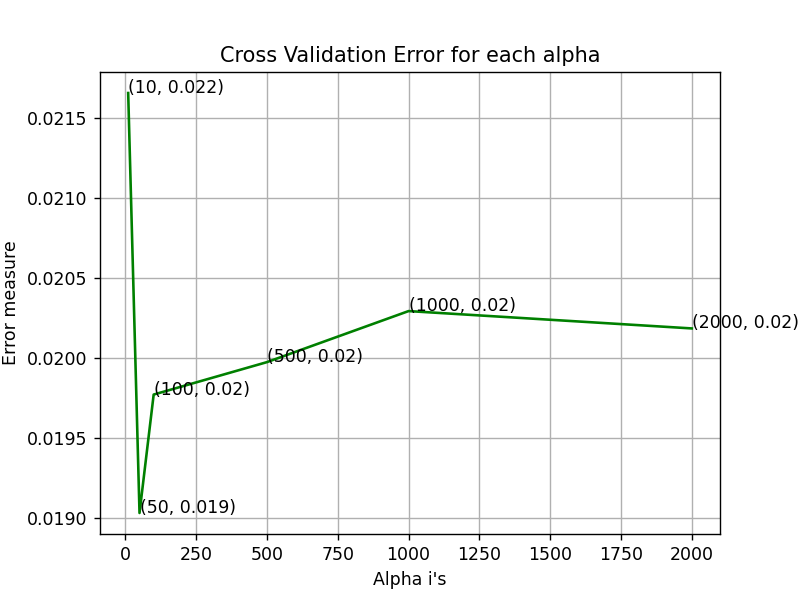

For values of best alpha =  50 The train log loss is: 0.011777316197737923
For values of best alpha =  50 The cross validation log loss is: 0.02079674641657687
For values of best alpha =  50 The test log loss is: 0.020168288966947598


In [127]:
best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],n_jobs=-1)
r_cfl.fit(X_train_merge,y_train_merge)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_merge, y_train_merge)

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test_merge, predict_y))

### 5.10 XGBoost Classifier - (Merged Features) (Hyper Parameter Tuning)

In [128]:
xgb_clf=XGBClassifier()

prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1],

}

random_clf=RandomizedSearchCV(xgb_clf, param_distributions=prams, verbose=10, n_jobs=1, random_state = 42, n_iter = 6)

random_clf.fit(X_train_merge, y_train_merge)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[17:49:13] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.994, total= 5.1min
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  5.1min remaining:    0.0s


[17:54:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.994, total= 4.9min
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 10.0min remaining:    0.0s


[17:59:12] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.996, total= 4.9min
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 14.9min remaining:    0.0s


[18:04:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.993, total= 4.9min
[CV] subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 19.8min remaining:    0.0s


[18:09:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=200, max_depth=10, learning_rate=0.01, colsample_bytree=1, score=0.996, total= 4.9min
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 24.7min remaining:    0.0s


[18:13:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.991, total=  25.1s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 25.1min remaining:    0.0s


[18:14:20] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.991, total=  25.1s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 25.6min remaining:    0.0s


[18:14:45] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.990, total=  25.1s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 26.0min remaining:    0.0s


[18:15:10] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.991, total=  25.4s
[CV] subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 26.4min remaining:    0.0s


[18:15:36] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=100, max_depth=5, learning_rate=0.05, colsample_bytree=0.5, score=0.991, total=  25.0s
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[18:16:02] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1, score=0.998, total= 6.7min
[CV] subsample=0.5, n_estimators=1000, max_depth=5, learning_rate=0.1, colsample_bytree=1 
[18:22:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, t

[20:48:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=200, max_depth=5, learning_rate=0.2, colsample_bytree=0.5, score=0.994, total=  27.1s
[CV] subsample=0.1, n_estimators=200, max_depth=5, learning_rate=0.2, colsample_bytree=0.5 
[20:48:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  subsample=0.1, n_estimators=200, max_depth=5, learning_rate=0.2, colsample_bytree=0.5, score=0.994, total=  27.5s
[CV] subsample=0.1, n_estimators=200, max_depth=5, learning_rate=0.2, colsample_bytree=0.5 
[20:48:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 180.2min finished


[20:49:23] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_job...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           scale_pos_weight=No

In [129]:
print(random_clf.best_params_)

{'subsample': 0.5, 'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


### XGBoost Classifier - (Merged Features) with best hyper paramers

In [130]:
n_estimators = random_clf.best_params_['n_estimators']
subsample = random_clf.best_params_['subsample']
max_depth = random_clf.best_params_['max_depth']
learning_rate = random_clf.best_params_['learning_rate']
colsample_bytree = random_clf.best_params_['colsample_bytree']




x_clf_with_best_hyper_param=XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate= learning_rate,\
                                          colsample_bytree=colsample_bytree, subsample=subsample, nthread=-1)

x_clf_with_best_hyper_param.fit(X_train_merge, y_train_merge, verbose=True)

sig_clf = CalibratedClassifierCV(x_clf_with_best_hyper_param, method="sigmoid")

sig_clf.fit(X_train_merge, y_train_merge)

[20:57:44] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:06:06] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:12:38] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:19:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the ol

CalibratedClassifierCV(base_estimator=XGBClassifier(base_score=0.5,
                                                    booster='gbtree',
                                                    colsample_bylevel=1,
                                                    colsample_bynode=1,
                                                    colsample_bytree=1, gamma=0,
                                                    gpu_id=-1,
                                                    importance_type='gain',
                                                    interaction_constraints='',
                                                    learning_rate=0.1,
                                                    max_delta_step=0,
                                                    max_depth=5,
                                                    min_child_weight=1,
                                                    missing=nan,
                                                    monotone_constraints='

In [131]:
n_estimators = random_clf.best_params_['n_estimators']

predict_y = sig_clf.predict_proba(X_train_merge)
print ('For values of best alpha = ', n_estimators, "The train log loss is:",log_loss(y_train_merge, predict_y))
predict_y = sig_clf.predict_proba(X_cv_merge)
print('For values of best alpha = ', n_estimators, "The cross validation log loss is:",log_loss(y_cv_merge, predict_y))
predict_y = sig_clf.predict_proba(X_test_merge)
print('For values of best alpha = ', n_estimators, "The test log loss is:",log_loss(y_test_merge, predict_y))

For values of best alpha =  1000 The train log loss is: 0.00983079839287493
For values of best alpha =  1000 The cross validation log loss is: 0.017032461692943725
For values of best alpha =  1000 The test log loss is: 0.01991866656247267


### Results of the ML Models Applied

In [13]:
from prettytable import PrettyTable
from textwrap import wrap

x = PrettyTable()
x.field_names = ["Algorithm", "Features", "Train log-loss", "Test log-loss"]
x._max_width = {"Algorithm":40, "Features":40, "Train log-loss":20, "Test log-loss":20}

x.add_row(["k-NN Classification", "Unigram of Bytes", 0.1, 0.2])
x.add_row(["Logistic Regression", "Unigram of Bytes", 0.85, 0.87])
x.add_row(["Random Forest Classification", "Unigram of Bytes", 0.02, 0.08])
x.add_row(["LightGBM Classifier", "Unigram of Bytes", 0.02, 0.07])
x.add_row(["","","",""])

x.add_row(["k-NN Classification", "Unigram of ASM", 0.02, 0.1])
x.add_row(["Logistic Regression", "Unigram of ASM", 0.31, 0.32])
x.add_row(["Random Forest Classification", "Unigram of ASM", 0.01, 0.04])
x.add_row(["XGBoost Classifier", "Unigram of ASM", 0.01, 0.02])
x.add_row(["","","",""])

x.add_row(["Random Forest Classification",  "Merged unigrams of ASM and byte files", 0.01, 0.03])
x.add_row(["XGBoost Classifier", "Merged unigrams of ASM and byte files", 0.01, 0.03])
x.add_row(["","","",""])

x.add_row(["Random Forest Classifier", "Merged Features", 0.01, 0.02])
x.add_row(["XGBoost Classifier", "Merged Features",  0.009, 0.01])
print(x)

+------------------------------+---------------------------------------+----------------+---------------+
|          Algorithm           |                Features               | Train log-loss | Test log-loss |
+------------------------------+---------------------------------------+----------------+---------------+
|     k-NN Classification      |            Unigram of Bytes           |      0.1       |      0.2      |
|     Logistic Regression      |            Unigram of Bytes           |      0.85      |      0.87     |
| Random Forest Classification |            Unigram of Bytes           |      0.02      |      0.08     |
|     LightGBM Classifier      |            Unigram of Bytes           |      0.02      |      0.07     |
|                              |                                       |                |               |
|     k-NN Classification      |             Unigram of ASM            |      0.02      |      0.1      |
|     Logistic Regression      |             U

### Summary: 

1. As mentioned above, I have used GCP because of low latency system I have. I used port forwarding trick using Google Cloud SDK
   which leveraged me of not loosing storage assigned. Because using file operations in GCP SSH Shell will drastically consume
   google storage
2. First, I completed training byte file and ASM unigrams
3. I used multiprocessing while creating byte bigrams (66308 unique features) 
4. With multiprocessing, I created sparse matrices and its corresponding class labels (i.e. ID and Class). When completed, 
   I concatenated the same and prepared the byte bigram dataset. 
3. While preparing for bigrams and advanced features, I thought of data cleaning first.
4. Hence I removed the columns which has only 1 unique values and deduplicated the columns as well.
5. I tried different approaches which did not result in getting log loss 0.01. Hence to make the notebook concise and clean,        I removed unnecessary sections.
6. I used chi-square test to compute the best features. Before that I had applied steop-4.
7. Once selected, I merged all the advanced features and applied machine learning models such as RandomForest and XBGoost.
8. We achieved logloss 0.01 in XGBoost Classifier 
9. One thing, I experienced collecting y values can be easily ignored as we are more focused towards other features.
   Hence I sorted every datasets prepared in ascending order and saved in the GCP for future usage.In this way, we can avoid
   incorrect concatenation. (Merging sometimes throws errors,. Hence opted for concatenation)
